## Traditional supervised machine learning approach
### Notebook 5: supervised learning
- Author： Chen Lequn
- Experiment date: __June experiment samples__
- Traditional machine learning approaches
- GPU accelerated scikit-learn

In [1]:
from sklearnex import patch_sklearn, config_context
import dpctl
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
## Required python libraries
import pandas as pd
import numpy as np
import scipy as sp
import os
import math
import sys
import itertools
from pandas import DataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import gca
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline
import seaborn as sns

# For data standardization (transformation of the data onto unit scale (mean=0 and variance=1), required in most machine learning)
from sklearn.preprocessing import StandardScaler
# For K Nearest Neighbours:
from sklearn import neighbors
# For support vector machine:
from sklearn import svm
# For Gaussian process:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
# For neural network:
from sklearn.neural_network import MLPClassifier
# For decision tree:
from sklearn import tree
# For plotting the decision tree structure:
import graphviz
# For ensemble methods: random forest ad AdaBoost
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# For Naive Bayes method:
from sklearn.naive_bayes import GaussianNB
# For logistic regression:
from sklearn.linear_model import LogisticRegression
# For data standardization (transform the data so that they have a near-normally distribution with zero mean and unit variance)
from sklearn import preprocessing

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

from pprint import pprint
from scipy.interpolate import griddata
from pylab import * # For adjusting frame width only
from sklearn.preprocessing import OneHotEncoder
import sklearn.gaussian_process as gp 
import sklearn.model_selection as ms
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.utils import shuffle
from sklearn.linear_model import Ridge 
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn import svm
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle


# Use grid search with cross validation to select ML model hyper-parameters:
from sklearn.model_selection import train_test_split  # random split the data into "training data" and "testing data"
from sklearn.model_selection import GridSearchCV  # Exhaustive grid search with cross validation (CV)
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

In [4]:
# For plotting
import plotly.io as pio
import plotly.graph_objects as go

import numpy as np
import matplotlib.pyplot as plt

# For ML model saving
import pickle
# sns.set_theme(style="whitegrid")
# sns.set_theme(style="white", palette=None)

In [5]:
import sys
sys.path.insert(0, '../utils')
import glob
import os
import utils
import filter
import feature_extractions
from feature_extractions import amplitude_envelope
FRAME_SIZE = 2048
HOP_LENGTH = 512

In [25]:
# Where to save the figures, and dataset locations
PROJECT_ROOT_DIR = "../"

label_file = os.path.join(PROJECT_ROOT_DIR, "AM_audio_dataset", 'AMDataset_v4_June_Experiment', 'wave_file', 'label.csv')
Experiment_PATH = os.path.join(PROJECT_ROOT_DIR, "AM_audio_dataset", 'AMDataset_v4_June_Experiment')
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "result_images", 'AMDataset_v4_June_Experiment', "ML", "segment", "selected_1s") #ALL_feature_1s
os.makedirs(IMAGE_PATH, exist_ok=True)

## function for automatically save the diagram/graph into the folder 
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### change figure style

In [7]:
'''
Make frame thicker, make tick pointing inside, make tick thicker
default frame width is 2, default tick width is 1.5
'''
def frame_tick(frame_width = 2, tick_width = 1.5):
    # ax = gca()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(frame_width)
    plt.tick_params(direction = 'in', 
                    width = tick_width)

'''
legend:
default location : upper left
default fontsize: 8
Frame is always off
'''
def legend(location = 'upper left', fontsize = 8):
    plt.legend(loc = location, fontsize = fontsize, frameon = False)
    
'''
savefig:
bbox_inches is always tight
'''
def savefig(filename):
    plt.savefig(filename, bbox_inches = 'tight')
    
dpi = 300

## Import extracted features

In [8]:
# df_dataset_original = pd.read_csv('..\\outputs\\June_experiments\\layer_prediction\\df_dataset_original.csv')
# df_dataset_equalized = pd.read_csv('..\\outputs\\June_experiments\\layer_prediction\\df_dataset_equalized.csv')
# df_dataset_bandpassed = pd.read_csv('..\\outputs\\June_experiments\\layer_prediction\\df_dataset_bandpassed.csv')
# df_dataset_denoised = pd.read_csv('..\\outputs\\June_experiments\\layer_prediction\\df_dataset_denoised.csv')

In [8]:
df_dataset_original = pd.read_csv('..\\outputs\\June_experiments\\segment_1s\\selected_feature\\df_dataset_original_selected_feature.csv')
df_dataset_equalized = pd.read_csv('..\\outputs\\June_experiments\\segment_1s\\selected_feature\\df_dataset_equalized_selected_feature.csv')
df_dataset_bandpassed = pd.read_csv('..\\outputs\\June_experiments\\segment_1s\\selected_feature\\df_dataset_bandpassed_selected_feature.csv')
df_dataset_denoised = pd.read_csv('..\\outputs\\June_experiments\\segment_1s\\selected_feature\\df_dataset_denoised_selected_feature.csv')

In [8]:
df_dataset_original = pd.read_csv('..\\outputs\\June_experiments\\segment_1s\\complete\\df_dataset_original.csv')
df_dataset_equalized = pd.read_csv('..\\outputs\\June_experiments\\segment_1s\\complete\\df_dataset_equalized.csv')
df_dataset_bandpassed = pd.read_csv('..\\outputs\\June_experiments\\segment_1s\\complete\\df_dataset_bandpassed.csv')
df_dataset_denoised = pd.read_csv('..\\outputs\\June_experiments\\segment_1s\\complete\\df_dataset_denoised.csv')

In [9]:
df_dataset_original.columns

Index(['Label', 'label', 'S-bandwidth mean', 'S-entropy mean', 'BER mean',
       'BER var', 'S-centroid var', 'ZCR var', 'ZCR mean', 'S-flux var',
       'S-centroid mean', 'S-variance mean'],
      dtype='object')

In [10]:
df_dataset_original['Label'].unique()

array(['Defect-free', 'Cracks', 'Keyhole pores'], dtype=object)

## Constructing labels and input features for training the models

In [12]:
Label = df_dataset_original['Label'].to_list()
y = df_dataset_original['label'].to_list()


X_original_selected = df_dataset_original[['AE mean', 'AE var', 'RMSE mean',
                                         'RMSE var', 'ZCR mean', 'ZCR var', 'Rolloff mean', 'Rolloff var',
                                         'BER mean', 'BER var', 'S-centroid mean', 'S-centroid var', 'S-bandwidth mean', 'S-bandwidth var',
                                         'S-flatness mean', 'S-flatness var', 'S-kurtosis mean', 'S-kurtosis var',
                                         'S-variance mean', 'S-variance var', 'S-crest mean', 'S-crest var',
                                         'S-skewness mean', 'S-skewness var', 'S-entropy mean', 'S-entropy var',
                                         'S-flux mean', 'S-flux var']].to_numpy()

X_equalized_selected = df_dataset_equalized[['AE mean', 'AE var', 'RMSE mean',
                                             'RMSE var', 'ZCR mean', 'ZCR var', 'Rolloff mean', 'Rolloff var',
                                             'BER mean', 'BER var', 'S-centroid mean', 'S-centroid var', 'S-bandwidth mean', 'S-bandwidth var',
                                             'S-flatness mean', 'S-flatness var', 'S-kurtosis mean', 'S-kurtosis var',
                                             'S-variance mean', 'S-variance var', 'S-crest mean', 'S-crest var',
                                             'S-skewness mean', 'S-skewness var', 'S-entropy mean', 'S-entropy var',
                                             'S-flux mean', 'S-flux var']].to_numpy()

X_bandpassed_selected = df_dataset_bandpassed[['AE mean', 'AE var', 'RMSE mean',
                                             'RMSE var', 'ZCR mean', 'ZCR var', 'Rolloff mean', 'Rolloff var',
                                             'BER mean', 'BER var', 'S-centroid mean', 'S-centroid var', 'S-bandwidth mean', 'S-bandwidth var',
                                             'S-flatness mean', 'S-flatness var', 'S-kurtosis mean', 'S-kurtosis var',
                                             'S-variance mean', 'S-variance var', 'S-crest mean', 'S-crest var',
                                             'S-skewness mean', 'S-skewness var', 'S-entropy mean', 'S-entropy var',
                                             'S-flux mean', 'S-flux var']].to_numpy()

X_denoised_selected = df_dataset_denoised[['AE mean', 'AE var', 'RMSE mean',
                                         'RMSE var', 'ZCR mean', 'ZCR var', 'Rolloff mean', 'Rolloff var',
                                         'BER mean', 'BER var', 'S-centroid mean', 'S-centroid var', 'S-bandwidth mean', 'S-bandwidth var',
                                         'S-flatness mean', 'S-flatness var', 'S-kurtosis mean', 'S-kurtosis var',
                                         'S-variance mean', 'S-variance var', 'S-crest mean', 'S-crest var',
                                         'S-skewness mean', 'S-skewness var', 'S-entropy mean', 'S-entropy var',
                                         'S-flux mean', 'S-flux var']].to_numpy()

In [11]:
# Label = df_dataset_original['Label'].to_list()
y = df_dataset_original['label'].to_list()


X_original_selected = df_dataset_original[['S-bandwidth mean', 'S-entropy mean', 'BER mean',
                                           'BER var', 'S-centroid var', 'ZCR var', 'ZCR mean', 'S-flux var',
                                           'S-centroid mean', 'S-variance mean']].to_numpy()

X_equalized_selected = df_dataset_equalized[['S-bandwidth mean', 'S-entropy mean', 'BER mean',
                                           'BER var', 'S-centroid var', 'ZCR var', 'ZCR mean', 'S-flux var',
                                           'S-centroid mean', 'S-variance mean']].to_numpy()

X_bandpassed_selected = df_dataset_bandpassed[['S-bandwidth mean', 'S-entropy mean', 'BER mean',
                                           'BER var', 'S-centroid var', 'ZCR var', 'ZCR mean', 'S-flux var',
                                           'S-centroid mean', 'S-variance mean']].to_numpy()

X_denoised_selected = df_dataset_denoised[['S-bandwidth mean', 'S-entropy mean', 'BER mean',
                                           'BER var', 'S-centroid var', 'ZCR var', 'ZCR mean', 'S-flux var',
                                           'S-centroid mean', 'S-variance mean']].to_numpy()

### One-hot encoding

In [14]:
# from numpy import array
# from numpy import argmax
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
# # integer encode
# label_encoder = LabelEncoder()
# # binary encode
# onehot_encoder = OneHotEncoder(sparse=False)

# values = df_dataset_original_selected["Label"].to_numpy()
# integer_encoded = label_encoder.fit_transform(values)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# Y = onehot_encoder.fit_transform(integer_encoded)
# print(integer_encoded)

## Training ML models to predict defects (layer-wise)

In [27]:
original_accuracy_mean_list = []
original_accuracy_std_list = []
equalized_accuracy_mean_list = []
equalized_accuracy_std_list = []
bandpassed_accuracy_mean_list = []
bandpassed_accuracy_std_list = []
denoised_accuracy_mean_list = []
denoised_accuracy_std_list = []

original_auc_mean = []
original_auc_std = []
equalized_auc_mean = []
equalized_auc_std = []
bandpassed_auc_mean = []
bandpassed_auc_std = []
denoised_auc_mean = []
denoised_auc_std = []

import time

### Decision tree classification

In [28]:
def DT_classification(X, Y, auc_mean_list, auc_std_list, accuracy_mean_list, accuracy_std_list, signal_type, 
                       labels_=['Defect-free', 'Cracks','Keyhole pores']):
    
    ################--------------------------------------------------------------------#####################
    ################------Step 1: Preparation, standarization, and train test split-----#####################
    ################--------------------------------------------------------------------#####################
    classifier_name = "DT"
    n_classes = len(labels_)
    
    # Transform the feature data X to zero mean and unit variance:
    X = StandardScaler().fit_transform(X)
    # Split the data into training and testing sets:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, shuffle=True)
    
    # One-hot-encode the ouput
    Y_test_ohe = label_binarize(Y_test, classes=[0, 1, 2])
    Y_train_ohe = label_binarize(Y_train, classes=[0, 1, 2])
    
    ################--------------------------------------------------------------------#####################
    ################------Step 2: Hyperparameter Optimization using Grid Search---------#####################
    ################--------------------------------------------------------------------#####################
    
    # Optimize the classfier's hyper-parameters:
    # Ref: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
    tuned_parameters = {'criterion': ['gini', 'entropy'],
                        'splitter': ['best', 'random'],
                        'max_depth': [2,3,4,5,6],
                        'min_samples_split': [2,3,4,5,6]}    # a dict (dictionary)

    clf = GridSearchCV(tree.DecisionTreeClassifier(), tuned_parameters, scoring="accuracy", cv=5)  # for scoring metrics: https://scikit-learn.org/0.15/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules
    clf.fit(X_train, Y_train)
    
    print("\n-------------------------------------------------------------------------------------------------")
    print("\n-------------Signal type: " + signal_type + "-----------")
    
    print("\nBest parameters set found on development set:")
    print(clf.best_params_)

    score = clf.score(X_test, Y_test)
    # print("\nTest score: %s" % score)

    Y_predict = clf.predict(X_test)
    # print("\nY_predict (testing data) = ")
    # print(Y_predict)

    # print("\nAccuracy of Decision Tree classifier (testing data):")
    # print(metrics.accuracy_score(Y_test, Y_predict))

    print("\nclassification report:")
    print(classification_report(Y_test, Y_predict,digits=5))

    # accuracy_list.append(metrics.accuracy_score(Y_test, Y_predict))
    #################--------------------------------------------------------------------#####################
    ################------Step 3: Perform cross-validation on the model ------- ---------#####################
    ################---------------------------------------------------------------------#####################
    kf = KFold(n_splits=3)
    trains = []
    tests = []
    
    for train, test in kf.split(X):

        X_shuffle, y_shuffle = shuffle(X, Y, random_state=0)
        y_shuffle = np.array(y_shuffle)

        # X_cv_train_before = X_shuffle[train]
        # X_cv_test_before = X_shuffle[test]
        X_train_cv = X_shuffle[train]
        X_test_cv = X_shuffle[test]
        y_train_cv = y_shuffle[train]
        y_test_cv = y_shuffle[test]

        clf.fit(X_train_cv, y_train_cv)

        trains.append(clf.score(X_train_cv, y_train_cv))
        tests.append(clf.score(X_test_cv, y_test_cv))

    trains = np.array(trains)
    tests = np.array(tests)


    test_accuracy_mean = tests.mean()
    test_accuracy_std = tests.std()

    train_accuracy_mean = trains.mean()
    train_accuracy_std =  trains.std()
    
    
    #################--------------------------------------------------------------------#####################
    ################---------------Step 4: AUC-ROC score measurement --------------------#####################
    ################---------------------------------------------------------------------#####################
    
    # ----------------Learn to predict each class against the other------------------------
    classifier = OneVsRestClassifier(clf)
    # if classifier_name == 'SVC':
    #     y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    # else:
    y_score = classifier.fit(X_train, Y_train_ohe).predict_proba(X_test)
    
    # ---------------Compute ROC curve and ROC area for each class-------------------------
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test_ohe[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_ohe.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # ----------------------------------Plot all ROC curves-------------------------------
    plt.figure(figsize = (4,3), dpi = 300)
    widths = 2
    ax = gca()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(widths)

        tick_width = 1.5
    plt.tick_params(direction = 'in', width = tick_width)
    
    #---------------------------(1) micro and macro ROC curve---------------------------
    plt.plot(fpr["micro"], tpr["micro"],
             label=classifier_name + ' - micro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=2, alpha = 0.8) #deeppink, midnightblue

    plt.plot(fpr["macro"], tpr["macro"],
             label=classifier_name + ' - macro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=2, alpha = 0.8) #navy, gold
    
    #---------------------------(2) ROC curve for each class---------------------------
    colors = cycle(["aqua", "darkblue", "darkorange", "red"])
    # colors = cycle(['0.45', 'steelblue',  'olive', 'silver'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i],color=color,
                 lw=1, alpha = 0.8,
                 label=classifier_name + " ROC curve of class \"{0}\" (area = {1:0.2f})".format(labels_[i], roc_auc[i])) 

    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # plt.title("ROC curve")
    plt.legend(loc="lower right",  fontsize = '5', frameon = False)
    # plt.show()
    
    #----------------------------------Extract the auc score to list-----------------------------------
    auc_score_list = []
    auc_score_list.append(auc(fpr["micro"], tpr["micro"]))
    
    auc_score_array = np.array(auc_score_list)
    auc_mean = auc_score_array.mean()
    auc_std = auc_score_array.std()
    
    
    #################--------------------------------------------------------------------#####################
    ################----------Step 5: Append all the matrix to the list -----------------#####################
    ################---------------------------------------------------------------------#####################
    
    auc_mean_list.append(auc_mean)
    auc_std_list.append(auc_std)
    accuracy_mean_list.append(test_accuracy_mean)
    accuracy_std_list.append(test_accuracy_std)
    
    print('Test Accuracy (cross-validation) for' , classifier_name, '= {:.5f} ± {:.5f}'.format(test_accuracy_mean, test_accuracy_std))
    print('micro-averaging AUC for' , classifier_name, '= {:.5f} ± {:.5f}'.format(auc_mean, auc_std))
    save_fig("ROC_" + classifier_name + "_" + signal_type)
    
    return [Y_predict, Y_test]


-------------------------------------------------------------------------------------------------

-------------Signal type: original-----------

Best parameters set found on development set:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 3, 'splitter': 'best'}

classification report:
              precision    recall  f1-score   support

           0    0.83838   0.79808   0.81773       104
           1    0.57471   0.60241   0.58824        83
           2    0.72308   0.73438   0.72868        64

    accuracy                        0.71713       251
   macro avg    0.71206   0.71162   0.71155       251
weighted avg    0.72179   0.71713   0.71914       251

Test Accuracy (cross-validation) for DT = 0.69065 ± 0.04478
micro-averaging AUC for DT = 0.87632 ± 0.00000
Saving figure ROC_DT_original

-------------------------------------------------------------------------------------------------

-------------Signal type: equalized-----------

Best parameters set found on dev

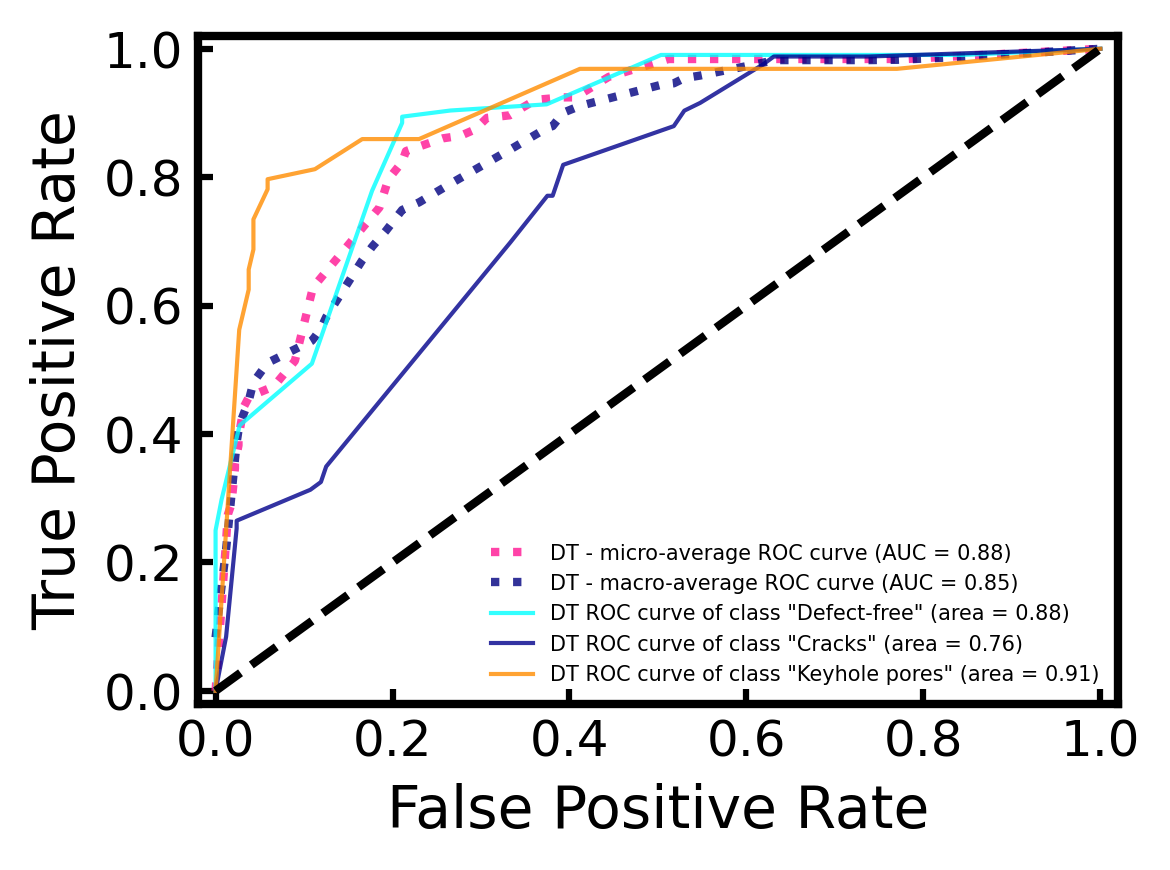

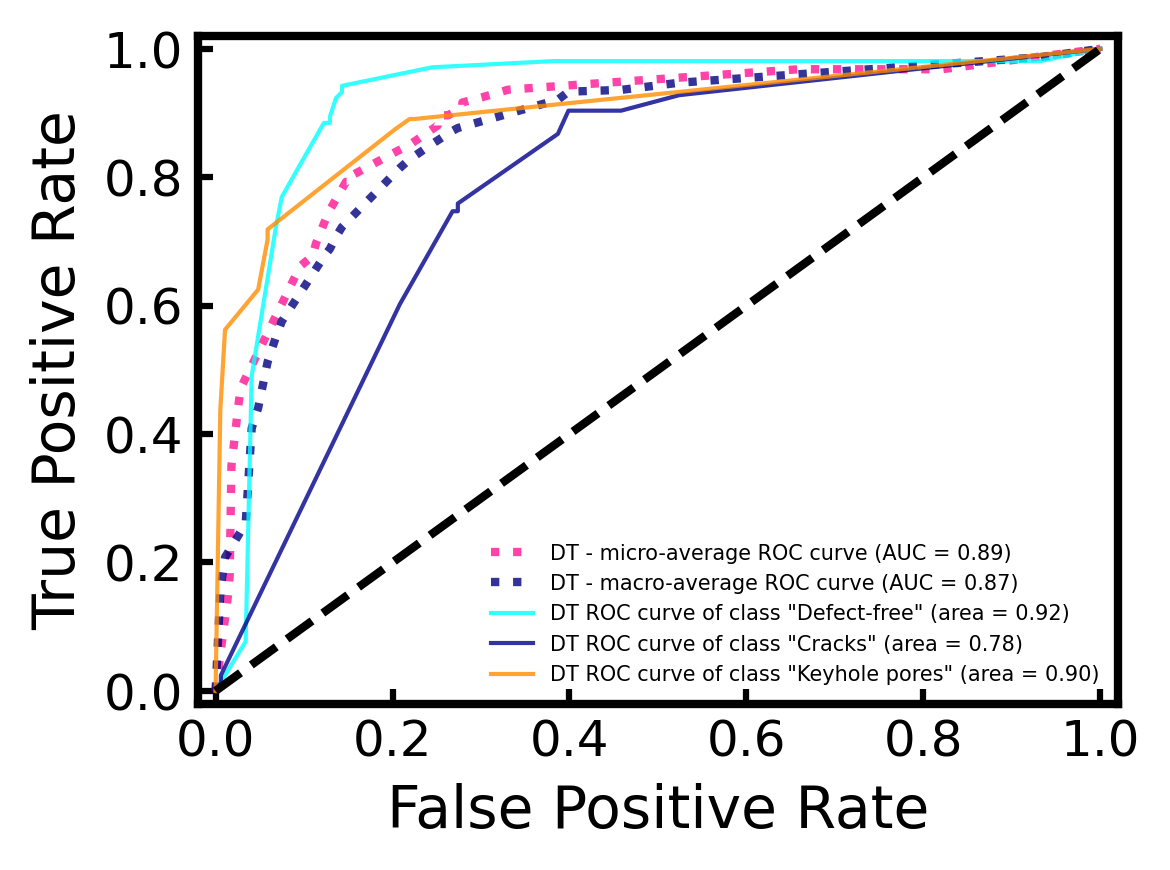

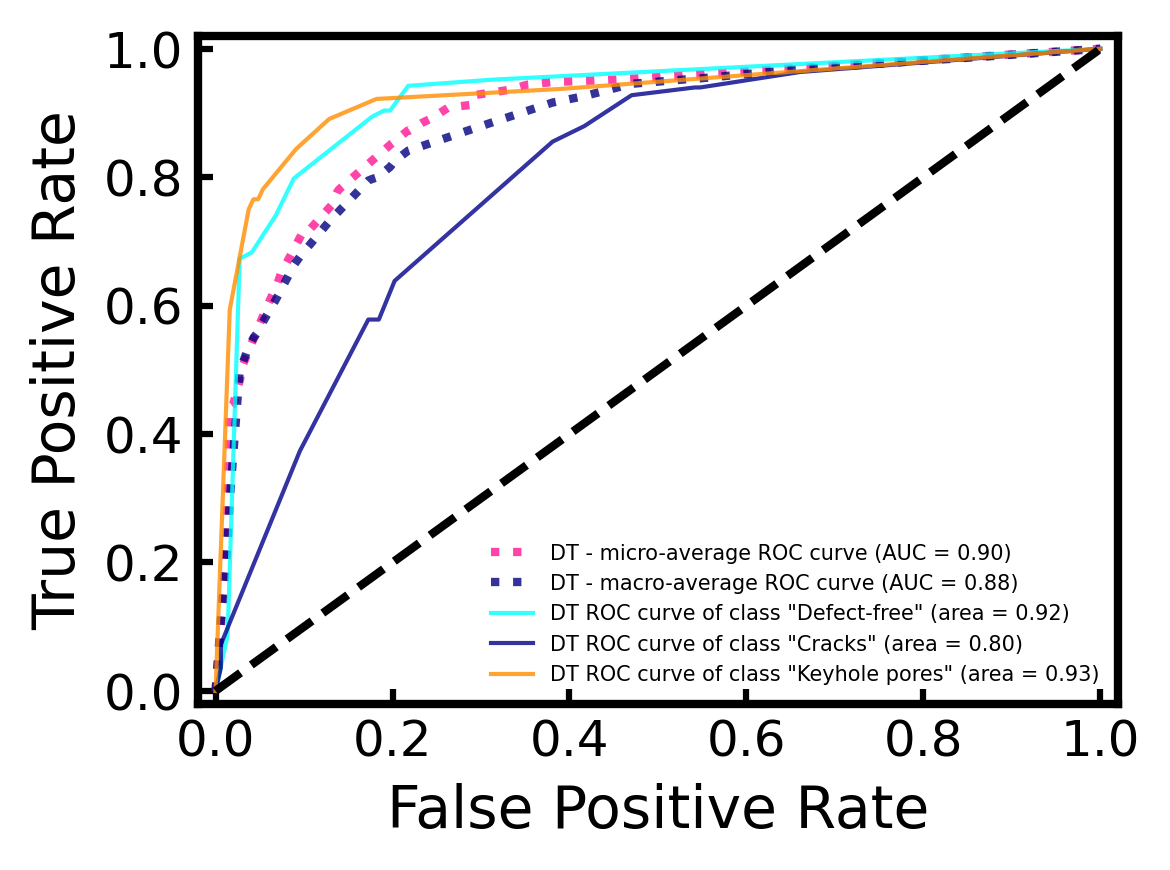

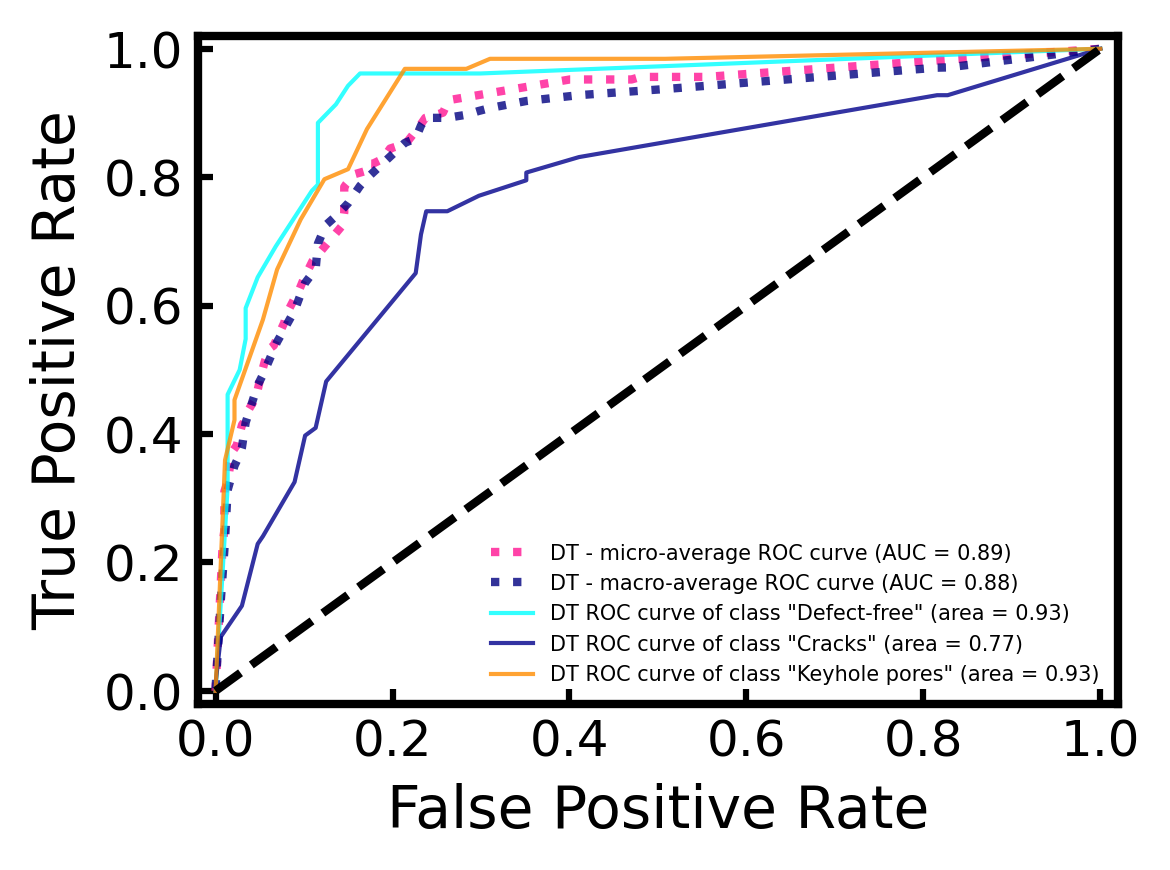

In [29]:
DT_original = DT_classification(X_original_selected, y, original_auc_mean, original_auc_std, original_accuracy_mean_list, original_accuracy_std_list, "original")
DT_equalized = DT_classification(X_equalized_selected, y, equalized_auc_mean, equalized_auc_std, equalized_accuracy_mean_list, equalized_accuracy_std_list, "equalized")
DT_bandpassed = DT_classification(X_bandpassed_selected, y, bandpassed_auc_mean, bandpassed_auc_std, bandpassed_accuracy_mean_list, bandpassed_accuracy_std_list, "bandpassed")
DT_denoised = DT_classification(X_denoised_selected, y, denoised_auc_mean, denoised_auc_std, denoised_accuracy_mean_list, denoised_accuracy_std_list, "denoised")

### AdaBoost classification

In [30]:
def AdaBoost_classification(X, Y, auc_mean_list, auc_std_list, accuracy_mean_list, accuracy_std_list, signal_type, 
                             labels_=['Defect-free', 'Cracks','Keyhole pores']):
    ################--------------------------------------------------------------------#####################
    ################------Step 1: Preparation, standarization, and train test split-----#####################
    ################--------------------------------------------------------------------#####################
    classifier_name = "AdaBoost"
    n_classes = len(labels_)
    
    # Transform the feature data X to zero mean and unit variance:
    X = StandardScaler().fit_transform(X)
    # Split the data into training and testing sets:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, shuffle=True)
    
    # One-hot-encode the ouput
    Y_test_ohe = label_binarize(Y_test, classes=[0, 1, 2])
    Y_train_ohe = label_binarize(Y_train, classes=[0, 1, 2])
    
    ################--------------------------------------------------------------------#####################
    ################------Step 2: Hyperparameter Optimization using Grid Search---------#####################
    ################--------------------------------------------------------------------#####################
    
    # Optimize the classfier's hyper-parameters:
    # Ref: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
    tuned_parameters = {'n_estimators': [2,4,6,10],
                        'algorithm': ['SAMME', 'SAMME.R']}    # a dict (dictionary)

    clf = GridSearchCV(AdaBoostClassifier(), tuned_parameters, scoring="accuracy", cv=5)  # for scoring metrics: https://scikit-learn.org/0.15/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules
    clf.fit(X_train, Y_train)

    print("\n-------------------------------------------------------------------------------------------------")
    print("\n-------------Signal type: " + signal_type + "-----------")
    
    print("\nBest parameters set found on development set:")
    print(clf.best_params_)

    score = clf.score(X_test, Y_test)
    # print("\nTest score: %s" % score)

    Y_predict = clf.predict(X_test)
    # print("\nY_predict (testing data) = ")
    # print(Y_predict)

    # print("\nAccuracy of AdaBoost classifier (testing data):")
    # print(metrics.accuracy_score(Y_test, Y_predict))

    print("\nclassification report:")
    print(classification_report(Y_test, Y_predict,digits=5))

    # accuracy_list.append(metrics.accuracy_score(Y_test, Y_predict))
    #################--------------------------------------------------------------------#####################
    ################------Step 3: Perform cross-validation on the model ------- ---------#####################
    ################---------------------------------------------------------------------#####################
    kf = KFold(n_splits=5)
    trains = []
    tests = []
    
    for train, test in kf.split(X):

        X_shuffle, y_shuffle = shuffle(X, Y, random_state=0)
        y_shuffle = np.array(y_shuffle)

        # X_cv_train_before = X_shuffle[train]
        # X_cv_test_before = X_shuffle[test]
        X_train_cv = X_shuffle[train]
        X_test_cv = X_shuffle[test]
        y_train_cv = y_shuffle[train]
        y_test_cv = y_shuffle[test]

        clf.fit(X_train_cv, y_train_cv)

        trains.append(clf.score(X_train_cv, y_train_cv))
        tests.append(clf.score(X_test_cv, y_test_cv))

    trains = np.array(trains)
    tests = np.array(tests)


    test_accuracy_mean = tests.mean()
    test_accuracy_std = tests.std()

    train_accuracy_mean = trains.mean()
    train_accuracy_std =  trains.std()
    
    
    #################--------------------------------------------------------------------#####################
    ################---------------Step 4: AUC-ROC score measurement --------------------#####################
    ################---------------------------------------------------------------------#####################
    
    # ----------------Learn to predict each class against the other------------------------
    classifier = OneVsRestClassifier(clf)
    # if classifier_name == 'SVC':
    #     y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    # else:
    y_score = classifier.fit(X_train, Y_train_ohe).predict_proba(X_test)
    
    # ---------------Compute ROC curve and ROC area for each class-------------------------
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test_ohe[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_ohe.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # ----------------------------------Plot all ROC curves-------------------------------
    plt.figure(figsize = (4,3), dpi = 300)
    widths = 2
    ax = gca()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(widths)

        tick_width = 1.5
    plt.tick_params(direction = 'in', width = tick_width)
    
    #---------------------------(1) micro and macro ROC curve---------------------------
    plt.plot(fpr["micro"], tpr["micro"],
             label=classifier_name + ' - micro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=2, alpha = 0.8) #deeppink, midnightblue

    plt.plot(fpr["macro"], tpr["macro"],
             label=classifier_name + ' - macro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=2, alpha = 0.8) #navy, gold
    
    #---------------------------(2) ROC curve for each class---------------------------
    colors = cycle(["aqua", "darkblue", "darkorange", "red"])
    # colors = cycle(['0.45', 'steelblue',  'olive', 'silver'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i],color=color,
                 lw=1, alpha = 0.8,
                 label=classifier_name + " ROC curve of class \"{0}\" (area = {1:0.2f})".format(labels_[i], roc_auc[i])) 

    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # plt.title("ROC curve")
    plt.legend(loc="lower right",  fontsize = '5', frameon = False)
    # plt.show()
    
    #----------------------------------Extract the auc score to list-----------------------------------
    auc_score_list = []
    auc_score_list.append(auc(fpr["micro"], tpr["micro"]))
    
    auc_score_array = np.array(auc_score_list)
    auc_mean = auc_score_array.mean()
    auc_std = auc_score_array.std()
    
    
    #################--------------------------------------------------------------------#####################
    ################----------Step 5: Append all the matrix to the list -----------------#####################
    ################---------------------------------------------------------------------#####################
    
    auc_mean_list.append(auc_mean)
    auc_std_list.append(auc_std)
    accuracy_mean_list.append(test_accuracy_mean)
    accuracy_std_list.append(test_accuracy_std)
    
    print('Test Accuracy (cross-validation) for' , classifier_name, '= {:.5f} ± {:.5f}'.format(test_accuracy_mean, test_accuracy_std))
    print('micro-averaging AUC for' , classifier_name, '= {:.5f} ± {:.5f}'.format(auc_mean, auc_std))
    save_fig("ROC_" + classifier_name + "_" + signal_type)
    
    return [Y_predict, Y_test]


-------------------------------------------------------------------------------------------------

-------------Signal type: original-----------

Best parameters set found on development set:
{'algorithm': 'SAMME.R', 'n_estimators': 10}

classification report:
              precision    recall  f1-score   support

           0    0.88095   0.71154   0.78723       104
           1    0.54808   0.68675   0.60963        83
           2    0.74603   0.73438   0.74016        64

    accuracy                        0.70916       251
   macro avg    0.72502   0.71089   0.71234       251
weighted avg    0.73648   0.70916   0.71650       251

Test Accuracy (cross-validation) for AdaBoost = 0.69063 ± 0.01657
micro-averaging AUC for AdaBoost = 0.87965 ± 0.00000
Saving figure ROC_AdaBoost_original

-------------------------------------------------------------------------------------------------

-------------Signal type: equalized-----------

Best parameters set found on development set:
{'algori

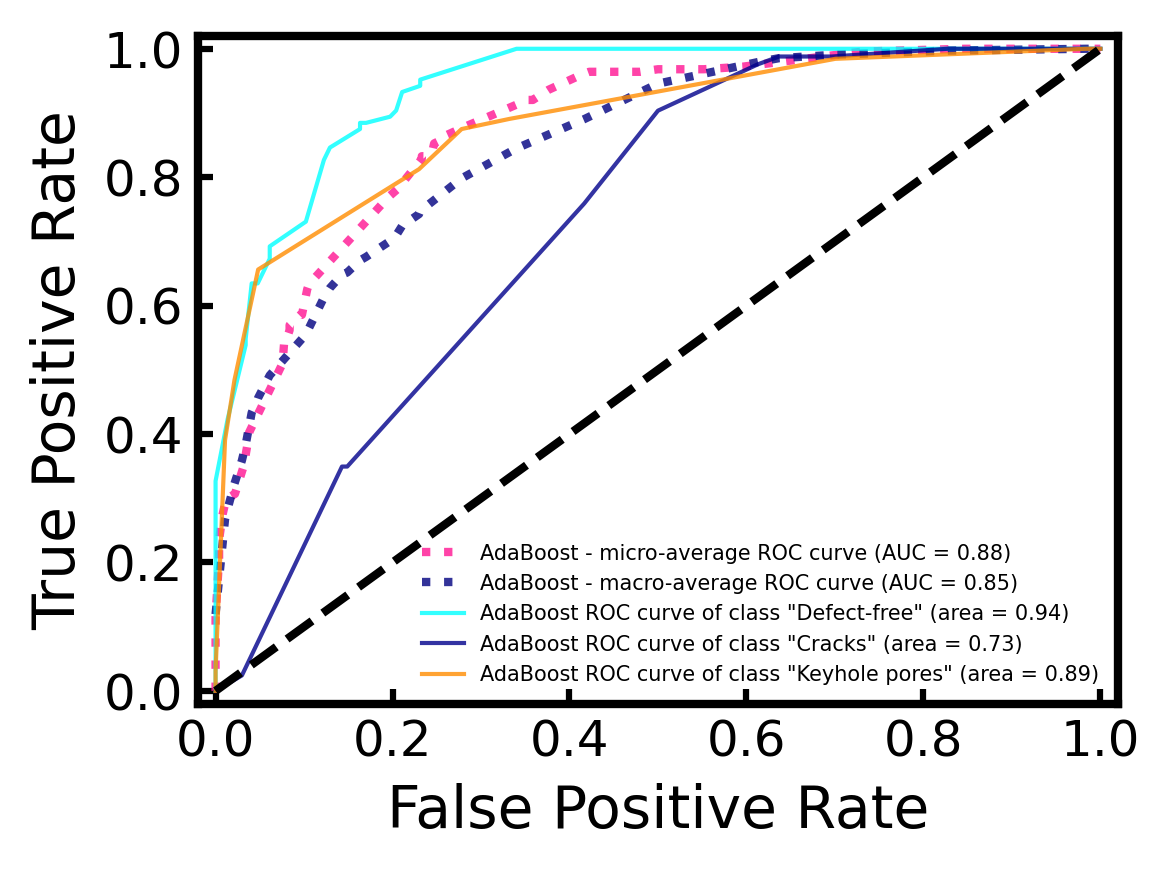

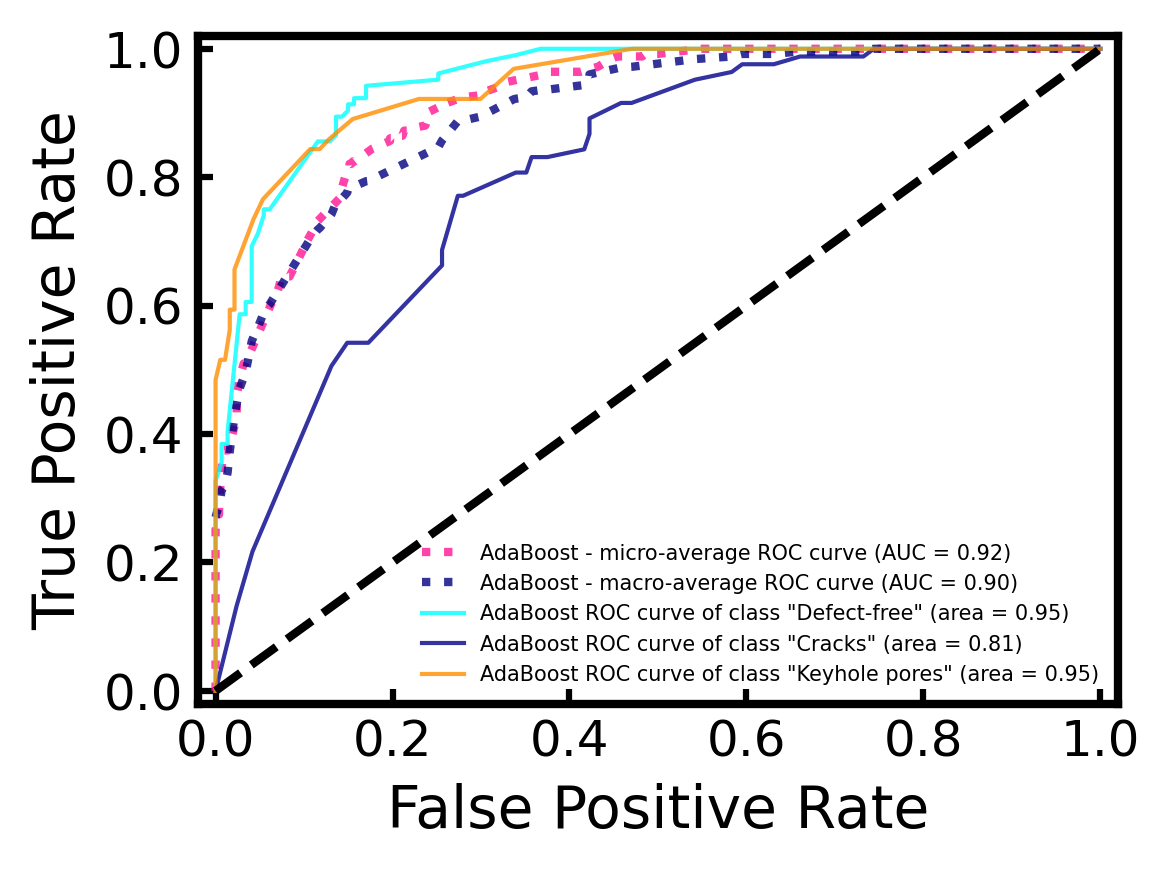

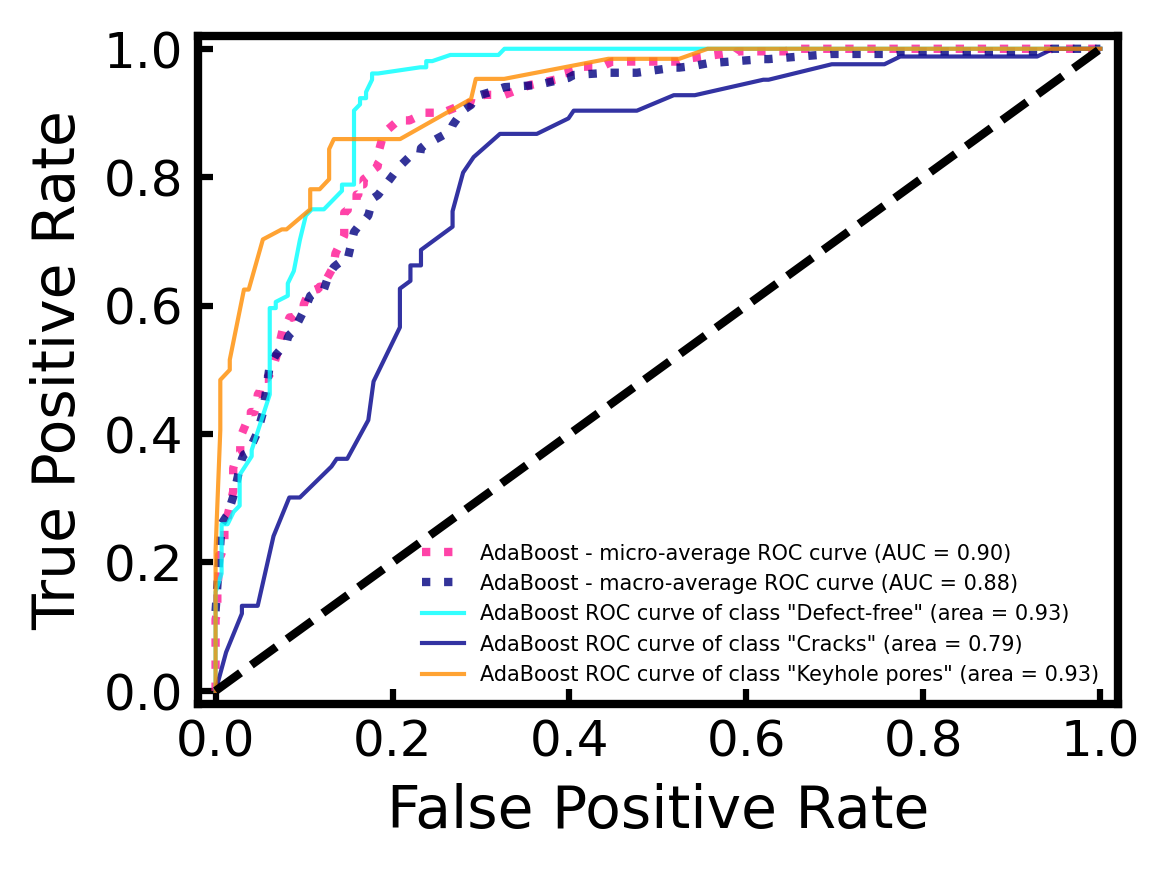

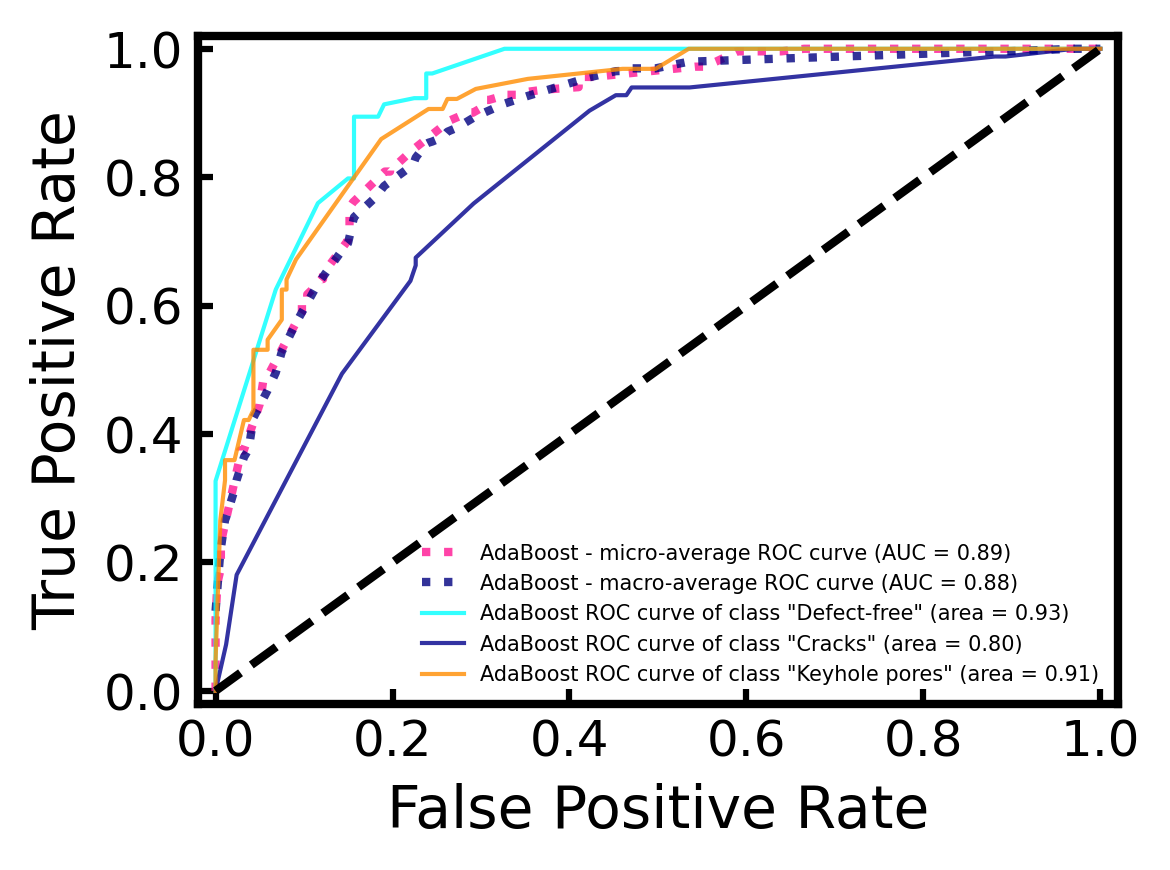

In [31]:
Adaboost_original = AdaBoost_classification(X_original_selected, y, original_auc_mean, original_auc_std, original_accuracy_mean_list, original_accuracy_std_list, "original")
Adaboost_equalized = AdaBoost_classification(X_equalized_selected, y, equalized_auc_mean, equalized_auc_std, equalized_accuracy_mean_list, equalized_accuracy_std_list, "equalized")
Adaboost_bandpassed = AdaBoost_classification(X_bandpassed_selected, y, bandpassed_auc_mean, bandpassed_auc_std, bandpassed_accuracy_mean_list, bandpassed_accuracy_std_list, "bandpassed")
Adaboost_denoised = AdaBoost_classification(X_denoised_selected, y, denoised_auc_mean, denoised_auc_std, denoised_accuracy_mean_list, denoised_accuracy_std_list, "denoised")

### Naive Bayes classification

In [32]:
def naive_bayes_classification(X, Y, auc_mean_list, auc_std_list, accuracy_mean_list, accuracy_std_list, signal_type, 
                               labels_=['Defect-free', 'Cracks','Keyhole pores']):
    ################--------------------------------------------------------------------#####################
    ################------Step 1: Preparation, standarization, and train test split-----#####################
    ################--------------------------------------------------------------------#####################
    classifier_name = "NB"
    n_classes = len(labels_)
    
    # Transform the feature data X to zero mean and unit variance:
    X = StandardScaler().fit_transform(X)
    # Split the data into training and testing sets:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, shuffle=True)
    
    # One-hot-encode the ouput
    Y_test_ohe = label_binarize(Y_test, classes=[0, 1, 2])
    Y_train_ohe = label_binarize(Y_train, classes=[0, 1, 2])
    
    ################--------------------------------------------------------------------#####################
    ################------Step 2: Hyperparameter Optimization using Grid Search---------#####################
    ################--------------------------------------------------------------------#####################
    
    clf = GaussianNB()

    clf.fit(X_train, Y_train)

    score = clf.score(X_test, Y_test)
    # print("\nTest score: %s" % score)

    Y_predict = clf.predict(X_test)
    # print("\nY_predict (testing data) = ")
    # print(Y_predict)

    # print("\nAccuracy of Naive Bayes classifier (testing data):")
    # print(metrics.accuracy_score(Y_test, Y_predict))
    print("\n-------------------------------------------------------------------------------------------------")
    print("\n-------------Signal type: " + signal_type + "-----------")
    
    print("\nclassification report:")
    print(classification_report(Y_test, Y_predict,digits=5))

    # accuracy_list.append(metrics.accuracy_score(Y_test, Y_predict))
    #################--------------------------------------------------------------------#####################
    ################------Step 3: Perform cross-validation on the model ------- ---------#####################
    ################---------------------------------------------------------------------#####################
    kf = KFold(n_splits=5)
    trains = []
    tests = []
    
    for train, test in kf.split(X):

        X_shuffle, y_shuffle = shuffle(X, Y, random_state=0)
        y_shuffle = np.array(y_shuffle)

        # X_cv_train_before = X_shuffle[train]
        # X_cv_test_before = X_shuffle[test]
        X_train_cv = X_shuffle[train]
        X_test_cv = X_shuffle[test]
        y_train_cv = y_shuffle[train]
        y_test_cv = y_shuffle[test]

        clf.fit(X_train_cv, y_train_cv)

        trains.append(clf.score(X_train_cv, y_train_cv))
        tests.append(clf.score(X_test_cv, y_test_cv))

    trains = np.array(trains)
    tests = np.array(tests)


    test_accuracy_mean = tests.mean()
    test_accuracy_std = tests.std()

    train_accuracy_mean = trains.mean()
    train_accuracy_std =  trains.std()
    
    
    #################--------------------------------------------------------------------#####################
    ################---------------Step 4: AUC-ROC score measurement --------------------#####################
    ################---------------------------------------------------------------------#####################
    
    # ----------------Learn to predict each class against the other------------------------
    classifier = OneVsRestClassifier(clf)
    # if classifier_name == 'SVC':
    #     y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    # else:
    y_score = classifier.fit(X_train, Y_train_ohe).predict_proba(X_test)
    
    # ---------------Compute ROC curve and ROC area for each class-------------------------
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test_ohe[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_ohe.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # ----------------------------------Plot all ROC curves-------------------------------
    plt.figure(figsize = (4,3), dpi = 300)
    widths = 2
    ax = gca()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(widths)

        tick_width = 1.5
    plt.tick_params(direction = 'in', width = tick_width)
    
    #---------------------------(1) micro and macro ROC curve---------------------------
    plt.plot(fpr["micro"], tpr["micro"],
             label=classifier_name + ' - micro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=2, alpha = 0.8) #deeppink, midnightblue

    plt.plot(fpr["macro"], tpr["macro"],
             label=classifier_name + ' - macro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=2, alpha = 0.8) #navy, gold
    
    #---------------------------(2) ROC curve for each class---------------------------
    colors = cycle(["aqua", "darkblue", "darkorange", "red"])
    # colors = cycle(['0.45', 'steelblue',  'olive', 'silver'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i],color=color,
                 lw=1, alpha = 0.8,
                 label=classifier_name + " ROC curve of class \"{0}\" (area = {1:0.2f})".format(labels_[i], roc_auc[i])) 

    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # plt.title("ROC curve")
    plt.legend(loc="lower right",  fontsize = '5', frameon = False)
    # plt.show()
    
    #----------------------------------Extract the auc score to list-----------------------------------
    auc_score_list = []
    auc_score_list.append(auc(fpr["micro"], tpr["micro"]))
    
    auc_score_array = np.array(auc_score_list)
    auc_mean = auc_score_array.mean()
    auc_std = auc_score_array.std()
    
    
    #################--------------------------------------------------------------------#####################
    ################----------Step 5: Append all the matrix to the list -----------------#####################
    ################---------------------------------------------------------------------#####################
    
    auc_mean_list.append(auc_mean)
    auc_std_list.append(auc_std)
    accuracy_mean_list.append(test_accuracy_mean)
    accuracy_std_list.append(test_accuracy_std)
    
    print('Test Accuracy (cross-validation) for' , classifier_name, '= {:.5f} ± {:.5f}'.format(test_accuracy_mean, test_accuracy_std))
    print('micro-averaging AUC for' , classifier_name, '= {:.5f} ± {:.5f}'.format(auc_mean, auc_std))
    save_fig("ROC_" + classifier_name + "_" + signal_type)
    
    return [Y_predict, Y_test]


-------------------------------------------------------------------------------------------------

-------------Signal type: original-----------

classification report:
              precision    recall  f1-score   support

           0    0.85135   0.60577   0.70787       104
           1    0.52033   0.77108   0.62136        83
           2    0.79630   0.67188   0.72881        64

    accuracy                        0.67729       251
   macro avg    0.72266   0.68291   0.68601       251
weighted avg    0.72785   0.67729   0.68460       251

Test Accuracy (cross-validation) for NB = 0.64586 ± 0.02714
micro-averaging AUC for NB = 0.84566 ± 0.00000
Saving figure ROC_NB_original

-------------------------------------------------------------------------------------------------

-------------Signal type: equalized-----------

classification report:
              precision    recall  f1-score   support

           0    0.78261   0.86538   0.82192       104
           1    0.59524   0.6024

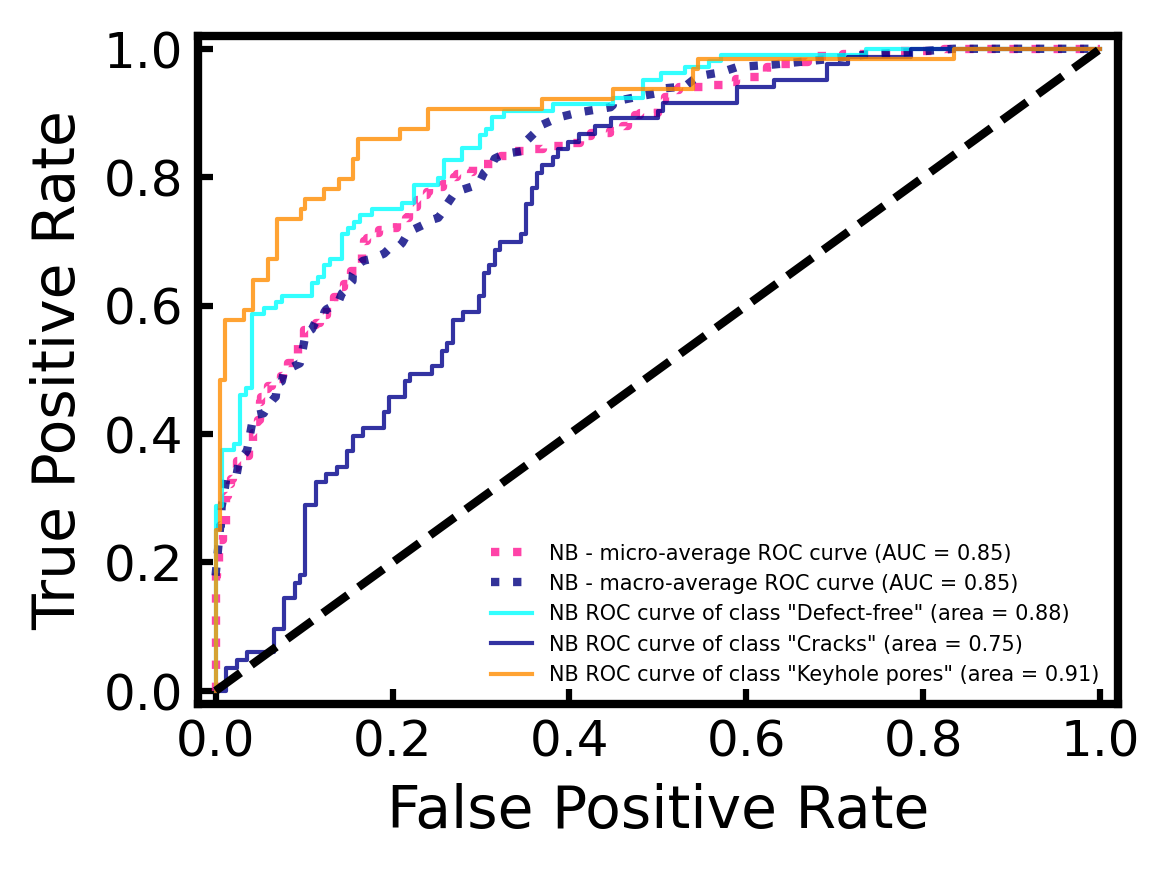

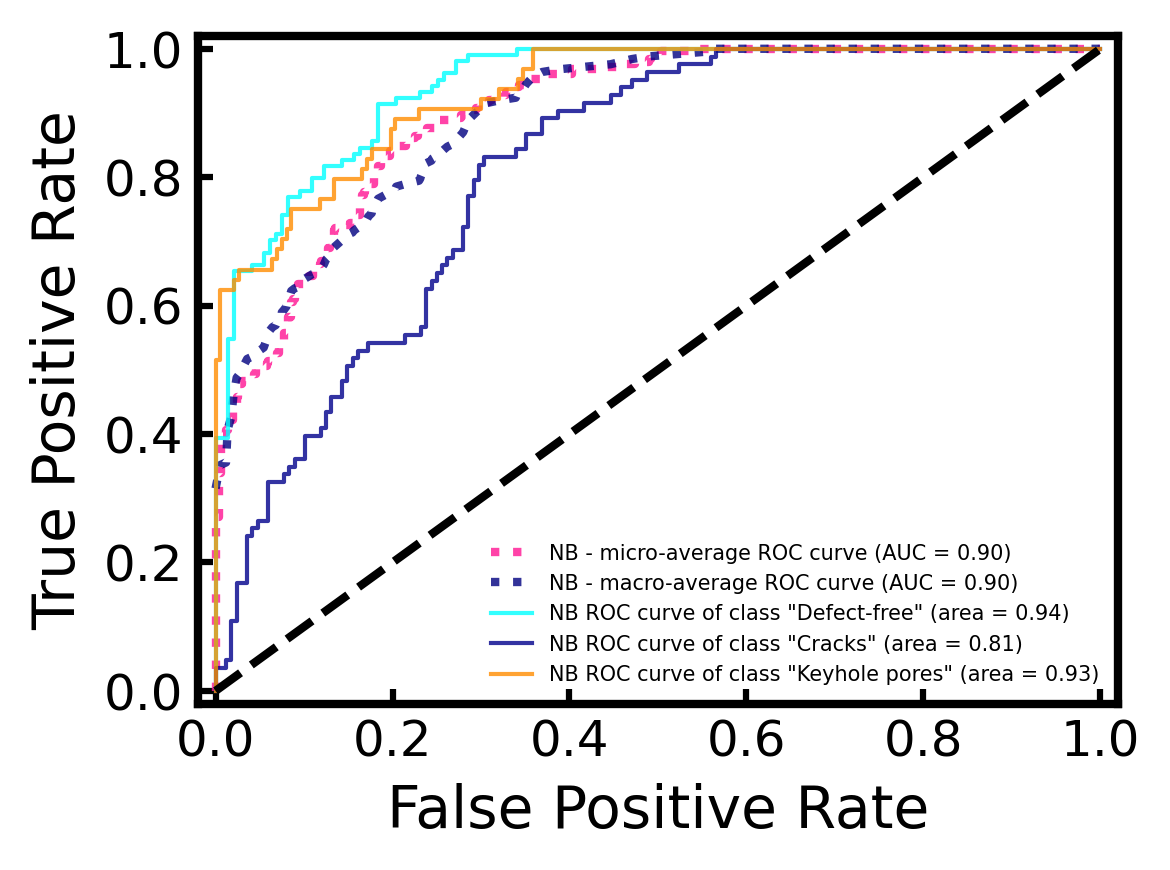

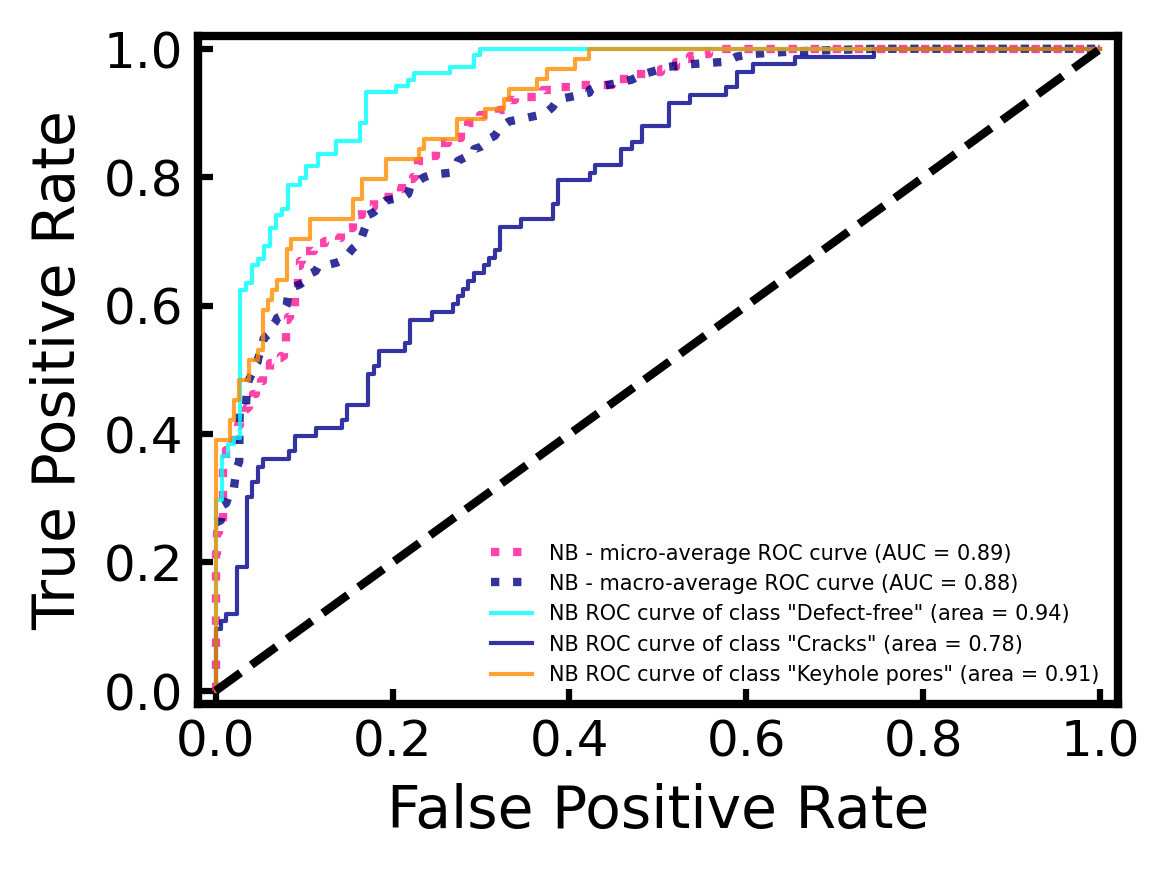

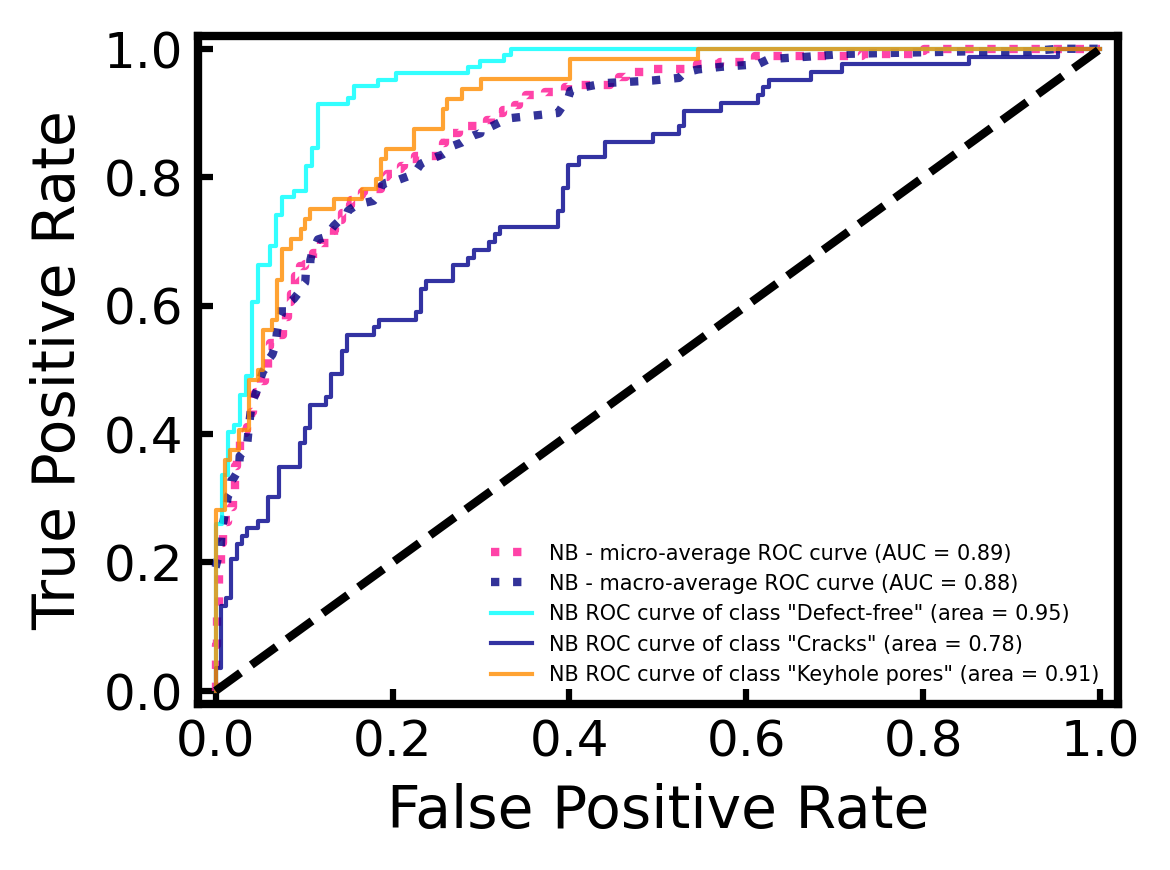

In [33]:
NB_original = naive_bayes_classification(X_original_selected, y, original_auc_mean, original_auc_std, original_accuracy_mean_list, original_accuracy_std_list, "original")
NB_equalized = naive_bayes_classification(X_equalized_selected, y, equalized_auc_mean, equalized_auc_std, equalized_accuracy_mean_list, equalized_accuracy_std_list, "equalized")
NB_bandpassed = naive_bayes_classification(X_bandpassed_selected, y, bandpassed_auc_mean, bandpassed_auc_std, bandpassed_accuracy_mean_list, bandpassed_accuracy_std_list, "bandpassed")
NB_denoised = naive_bayes_classification(X_denoised_selected, y, denoised_auc_mean, denoised_auc_std, denoised_accuracy_mean_list, denoised_accuracy_std_list, "denoised")

### Random Forest Classification

In [34]:
def RF_classification(X, Y, auc_mean_list, auc_std_list, accuracy_mean_list, accuracy_std_list, signal_type, 
                       labels_=['Defect-free', 'Cracks','Keyhole pores']):
    ################--------------------------------------------------------------------#####################
    ################------Step 1: Preparation, standarization, and train test split-----#####################
    ################--------------------------------------------------------------------#####################
    classifier_name = "RF"
    # Binarize the output
    Y = label_binarize(Y, classes=[0, 1, 2])
    n_classes = Y.shape[1]
    
    # Transform the feature data X to zero mean and unit variance:
    X = StandardScaler().fit_transform(X)
    # Split the data into training and testing sets:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, shuffle=True)
    
    ################--------------------------------------------------------------------#####################
    ################------Step 2: Hyperparameter Optimization using Grid Search---------#####################
    ################--------------------------------------------------------------------#####################
    # Optimize the classfier's hyper-parameters:
    # Ref: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
    tuned_parameters = {'n_estimators': [2,4,6,10],
                        'criterion': ['gini', 'entropy'],
                        'max_depth': [2,3,4],
                        'min_samples_split': [2,3,4,5,6]}    # a dict (dictionary)

    clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring="accuracy", cv=5)  # for scoring metrics: https://scikit-learn.org/0.15/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules
    clf.fit(X_train, Y_train)

    print("\n-------------------------------------------------------------------------------------------------")
    print("\n-------------Signal type: " + signal_type + "-----------")
    print("\nBest parameters set found on development set:")
    print(clf.best_params_)        

    score = clf.score(X_test, Y_test)
    # print("\nTest score: %s" % score)

    Y_predict = clf.predict(X_test)

    # print("\nAccuracy of Random Forest classifier (testing data):")
    # print(metrics.accuracy_score(Y_test, Y_predict))

    print("\nclassification report:")
    print(classification_report(Y_test, Y_predict,digits=5))

    # accuracy_list.append(metrics.accuracy_score(Y_test, Y_predict))
    
    #################--------------------------------------------------------------------#####################
    ################------Step 3: Perform cross-validation on the model ------- ---------#####################
    ################---------------------------------------------------------------------#####################
    kf = KFold(n_splits=3)
    trains = []
    tests = []
    
    for train, test in kf.split(X):

        X_shuffle, y_shuffle = shuffle(X, Y, random_state=0)
        y_shuffle = np.array(y_shuffle)

        # X_cv_train_before = X_shuffle[train]
        # X_cv_test_before = X_shuffle[test]
        X_train_cv = X_shuffle[train]
        X_test_cv = X_shuffle[test]
        y_train_cv = y_shuffle[train]
        y_test_cv = y_shuffle[test]

        clf.fit(X_train_cv, y_train_cv)

        trains.append(clf.score(X_train_cv, y_train_cv))
        tests.append(clf.score(X_test_cv, y_test_cv))

    trains = np.array(trains)
    tests = np.array(tests)


    test_accuracy_mean = tests.mean()
    test_accuracy_std = tests.std()

    train_accuracy_mean = trains.mean()
    train_accuracy_std =  trains.std()
    
    
    #################--------------------------------------------------------------------#####################
    ################---------------Step 4: AUC-ROC score measurement --------------------#####################
    ################---------------------------------------------------------------------#####################
    
    # ----------------Learn to predict each class against the other------------------------
    classifier = OneVsRestClassifier(clf)
    # if classifier_name == 'SVC':
    #     y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    # else:
    y_score = classifier.fit(X_train, Y_train).predict_proba(X_test)
    
    # ---------------Compute ROC curve and ROC area for each class-------------------------
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # ----------------------------------Plot all ROC curves-------------------------------
    plt.figure(figsize = (4,3), dpi = 300)
    widths = 2
    ax = gca()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(widths)

        tick_width = 1.5
    plt.tick_params(direction = 'in', width = tick_width)
    
    #---------------------------(1) micro and macro ROC curve---------------------------
    plt.plot(fpr["micro"], tpr["micro"],
             label=classifier_name + ' - micro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=2, alpha = 0.8) #deeppink, midnightblue

    plt.plot(fpr["macro"], tpr["macro"],
             label=classifier_name + ' - macro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=2, alpha = 0.8) #navy, gold
    
    #---------------------------(2) ROC curve for each class---------------------------
    colors = cycle(["aqua", "darkblue", "darkorange", "red"])
    # colors = cycle(['0.45', 'steelblue',  'olive', 'silver'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i],color=color,
                 lw=1, alpha = 0.8,
                 label=classifier_name + " ROC curve of class \"{0}\" (area = {1:0.2f})".format(labels_[i], roc_auc[i])) 

    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # plt.title("ROC curve")
    plt.legend(loc="lower right",  fontsize = '5', frameon = False)
    # plt.show()
    
    #----------------------------------Extract the auc score to list-----------------------------------
    auc_score_list = []
    auc_score_list.append(auc(fpr["micro"], tpr["micro"]))
    
    auc_score_array = np.array(auc_score_list)
    auc_mean = auc_score_array.mean()
    auc_std = auc_score_array.std()
    
    
    #################--------------------------------------------------------------------#####################
    ################----------Step 5: Append all the matrix to the list -----------------#####################
    ################---------------------------------------------------------------------#####################
    
    auc_mean_list.append(auc_mean)
    auc_std_list.append(auc_std)
    accuracy_mean_list.append(test_accuracy_mean)
    accuracy_std_list.append(test_accuracy_std)
    
    print('Test Accuracy (cross-validation) for' , classifier_name, '= {:.5f} ± {:.5f}'.format(test_accuracy_mean, test_accuracy_std))
    print('micro-averaging AUC for' , classifier_name, '= {:.5f} ± {:.5f}'.format(auc_mean, auc_std))
    save_fig("ROC_" + classifier_name + "_" + signal_type)
    
    return [Y_predict, Y_test]


-------------------------------------------------------------------------------------------------

-------------Signal type: original-----------

Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 2}

classification report:
              precision    recall  f1-score   support

           0    0.87097   0.51923   0.65060       104
           1    0.62500   0.42169   0.50360        83
           2    0.76786   0.67188   0.71667        64

   micro avg    0.75862   0.52590   0.62118       251
   macro avg    0.75461   0.53760   0.62362       251
weighted avg    0.76334   0.52590   0.61884       251
 samples avg    0.52590   0.52590   0.52590       251



C:\Users\Asus\anaconda3\envs\working_primary\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy (cross-validation) for RF = 0.58753 ± 0.02374
micro-averaging AUC for RF = 0.88712 ± 0.00000
Saving figure ROC_RF_original

-------------------------------------------------------------------------------------------------

-------------Signal type: equalized-----------

Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 2}

classification report:
              precision    recall  f1-score   support

           0    0.88542   0.81731   0.85000       104
           1    0.64474   0.59036   0.61635        83
           2    0.86000   0.67188   0.75439        64

   micro avg    0.79730   0.70518   0.74841       251
   macro avg    0.79672   0.69318   0.74025       251
weighted avg    0.79935   0.70518   0.74836       251
 samples avg    0.70518   0.70518   0.70518       251



C:\Users\Asus\anaconda3\envs\working_primary\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy (cross-validation) for RF = 0.68265 ± 0.04024
micro-averaging AUC for RF = 0.92020 ± 0.00000
Saving figure ROC_RF_equalized

-------------------------------------------------------------------------------------------------

-------------Signal type: bandpassed-----------

Best parameters set found on development set:
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 6, 'n_estimators': 10}

classification report:
              precision    recall  f1-score   support

           0    0.82524   0.81731   0.82126       104
           1    0.66197   0.56627   0.61039        83
           2    0.81667   0.76562   0.79032        64

   micro avg    0.77350   0.72112   0.74639       251
   macro avg    0.76796   0.71640   0.74066       251
weighted avg    0.76907   0.72112   0.74364       251
 samples avg    0.72112   0.72112   0.72112       251



C:\Users\Asus\anaconda3\envs\working_primary\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy (cross-validation) for RF = 0.72182 ± 0.01740
micro-averaging AUC for RF = 0.91685 ± 0.00000
Saving figure ROC_RF_bandpassed

-------------------------------------------------------------------------------------------------

-------------Signal type: denoised-----------

Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 4}

classification report:
              precision    recall  f1-score   support

           0    0.84112   0.86538   0.85308       104
           1    0.70130   0.65060   0.67500        83
           2    0.85714   0.75000   0.80000        64

   micro avg    0.80000   0.76494   0.78208       251
   macro avg    0.79985   0.75533   0.77603       251
weighted avg    0.79897   0.76494   0.78066       251
 samples avg    0.76494   0.76494   0.76494       251



C:\Users\Asus\anaconda3\envs\working_primary\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy (cross-validation) for RF = 0.72182 ± 0.01223
micro-averaging AUC for RF = 0.91452 ± 0.00000
Saving figure ROC_RF_denoised


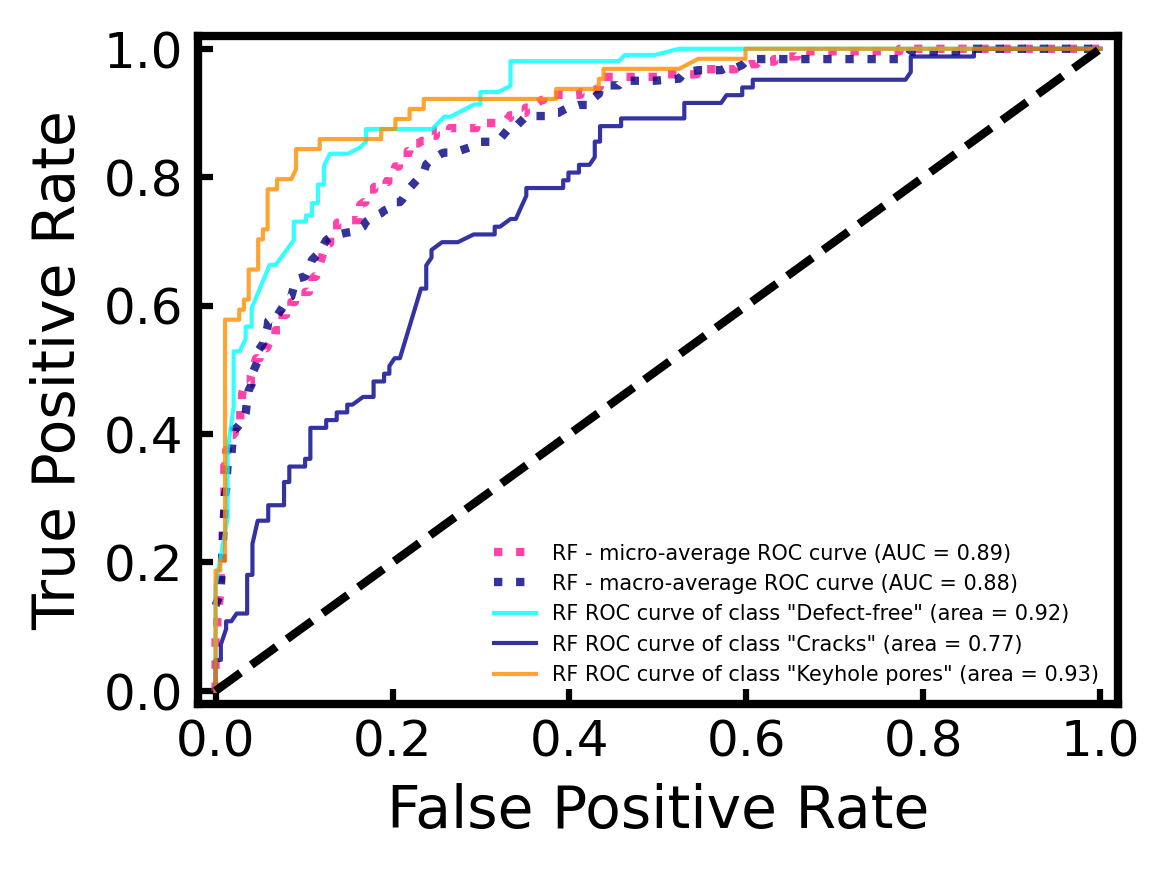

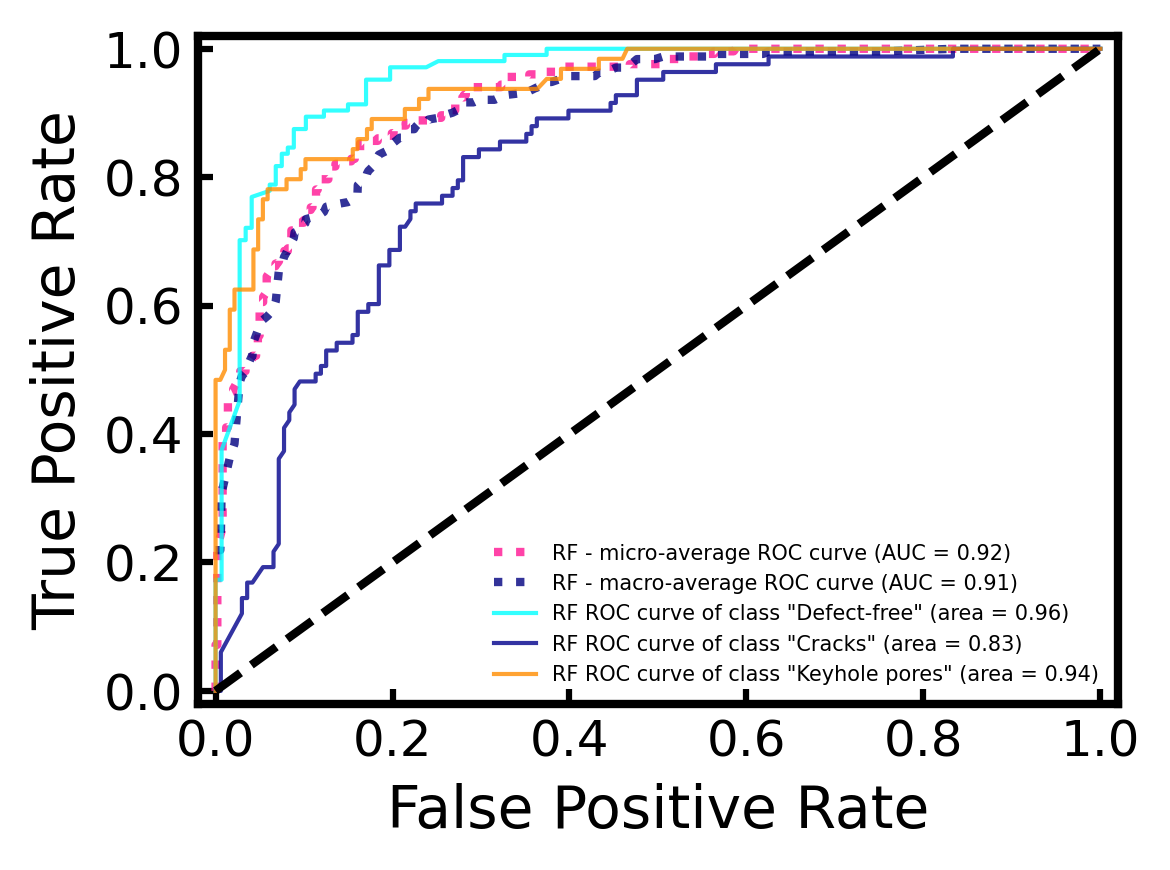

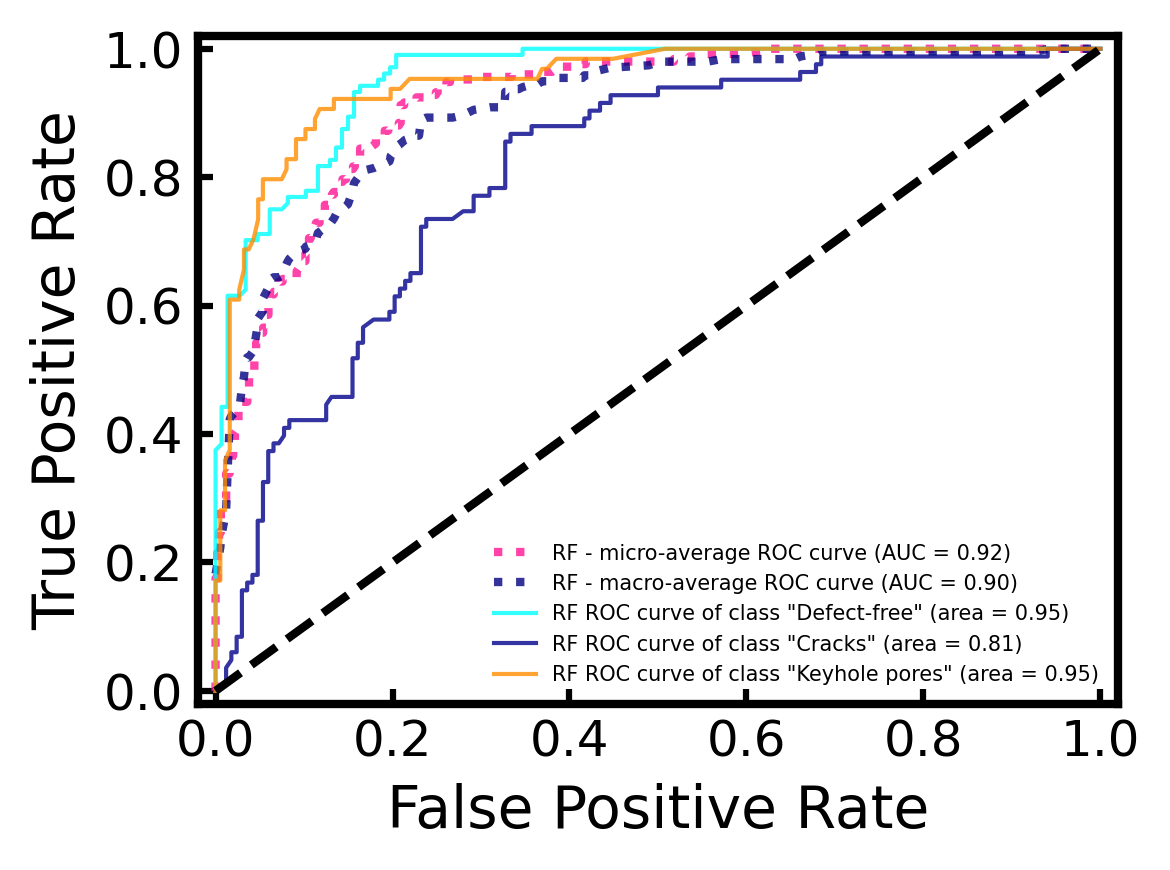

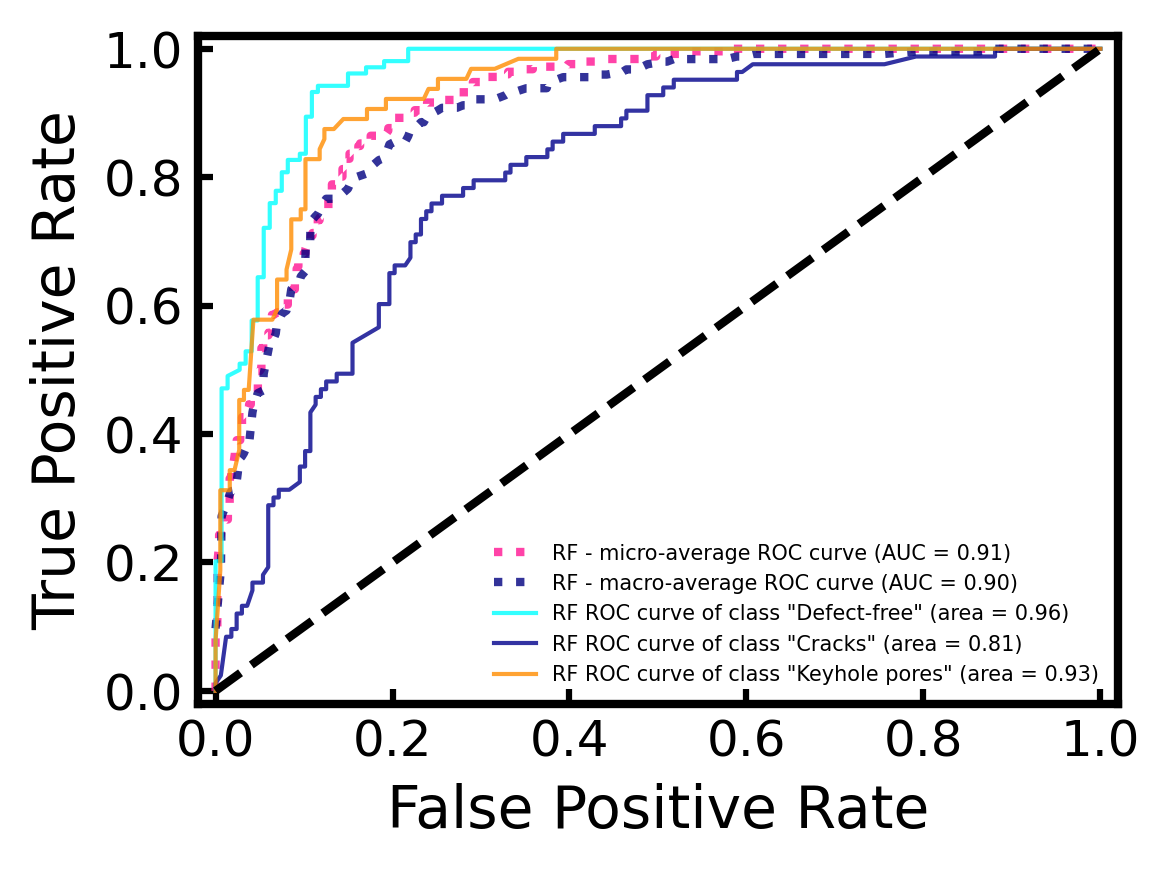

In [35]:
RF_original = RF_classification(X_original_selected, y, original_auc_mean, original_auc_std, original_accuracy_mean_list, original_accuracy_std_list, "original")
RF_equalized = RF_classification(X_equalized_selected, y, equalized_auc_mean, equalized_auc_std, equalized_accuracy_mean_list, equalized_accuracy_std_list, "equalized")
RF_banpassed = RF_classification(X_bandpassed_selected, y, bandpassed_auc_mean, bandpassed_auc_std, bandpassed_accuracy_mean_list, bandpassed_accuracy_std_list, "bandpassed")
RF_denoised = RF_classification(X_denoised_selected, y, denoised_auc_mean, denoised_auc_std, denoised_accuracy_mean_list, denoised_accuracy_std_list, "denoised")

### KNN

In [36]:
def KNN_classification(X, Y, auc_mean_list, auc_std_list, accuracy_mean_list, accuracy_std_list, signal_type, 
                        labels_=['Defect-free', 'Cracks','Keyhole pores']):
    ################--------------------------------------------------------------------#####################
    ################------Step 1: Preparation, standarization, and train test split-----#####################
    ################--------------------------------------------------------------------#####################
    classifier_name = "KNN"
    n_classes = len(labels_)
    
    # Transform the feature data X to zero mean and unit variance:
    X = StandardScaler().fit_transform(X)
    # Split the data into training and testing sets:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, shuffle=True)
    
    # One-hot-encode the ouput
    Y_test_ohe = label_binarize(Y_test, classes=[0, 1, 2])
    Y_train_ohe = label_binarize(Y_train, classes=[0, 1, 2])
    
    ################--------------------------------------------------------------------#####################
    ################------Step 2: Hyperparameter Optimization using Grid Search---------#####################
    ################--------------------------------------------------------------------#####################
    
    # Optimize the K-Nearest Neighbors Classfier's hyper-parameters:
    # Ref: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
    tuned_parameters = {'n_neighbors': [3, 4, 5, 6, 7, 8, 9],
                        'weights': ['uniform', 'distance'],
                        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}    # a dict (dictionary)

    clf = GridSearchCV(neighbors.KNeighborsClassifier(), tuned_parameters, scoring="accuracy", cv=5)  # for scoring metrics: https://scikit-learn.org/0.15/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules
    clf.fit(X_train, Y_train)

    print("\nBest parameters set found on development set:")
    print(clf.best_params_)

    score = clf.score(X_test, Y_test)
    print("\nTest score: %s" % score)

    Y_predict = clf.predict(X_test)
    # print("\nY_predict (testing data) = ")
    # print(Y_predict)

    print("\nAccuracy of Nearest Neighbors classifier (testing data):")
    print(metrics.accuracy_score(Y_test, Y_predict))

    print("\nclassification report:")
    print(classification_report(Y_test, Y_predict,digits=5))

    # accuracy_list.append(metrics.accuracy_score(Y_test, Y_predict))
    #################--------------------------------------------------------------------#####################
    ################------Step 3: Perform cross-validation on the model ------- ---------#####################
    ################---------------------------------------------------------------------#####################
    kf = KFold(n_splits=3)
    trains = []
    tests = []
    
    for train, test in kf.split(X):

        X_shuffle, y_shuffle = shuffle(X, Y, random_state=0)
        y_shuffle = np.array(y_shuffle)

        # X_cv_train_before = X_shuffle[train]
        # X_cv_test_before = X_shuffle[test]
        X_train_cv = X_shuffle[train]
        X_test_cv = X_shuffle[test]
        y_train_cv = y_shuffle[train]
        y_test_cv = y_shuffle[test]

        clf.fit(X_train_cv, y_train_cv)

        trains.append(clf.score(X_train_cv, y_train_cv))
        tests.append(clf.score(X_test_cv, y_test_cv))

    trains = np.array(trains)
    tests = np.array(tests)


    test_accuracy_mean = tests.mean()
    test_accuracy_std = tests.std()

    train_accuracy_mean = trains.mean()
    train_accuracy_std =  trains.std()
    
    
    #################--------------------------------------------------------------------#####################
    ################---------------Step 4: AUC-ROC score measurement --------------------#####################
    ################---------------------------------------------------------------------#####################
    
    # ----------------Learn to predict each class against the other------------------------
    classifier = OneVsRestClassifier(clf)
    # if classifier_name == 'SVC':
    #     y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    # else:
    y_score = classifier.fit(X_train, Y_train_ohe).predict_proba(X_test)
    
    # ---------------Compute ROC curve and ROC area for each class-------------------------
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test_ohe[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_ohe.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # ----------------------------------Plot all ROC curves-------------------------------
    plt.figure(figsize = (4,3), dpi = 300)
    widths = 2
    ax = gca()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(widths)

        tick_width = 1.5
    plt.tick_params(direction = 'in', width = tick_width)
    
    #---------------------------(1) micro and macro ROC curve---------------------------
    plt.plot(fpr["micro"], tpr["micro"],
             label=classifier_name + ' - micro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=2, alpha = 0.8) #deeppink, midnightblue

    plt.plot(fpr["macro"], tpr["macro"],
             label=classifier_name + ' - macro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=2, alpha = 0.8) #navy, gold
    
    #---------------------------(2) ROC curve for each class---------------------------
    colors = cycle(["aqua", "darkblue", "darkorange", "red"])
    # colors = cycle(['0.45', 'steelblue',  'olive', 'silver'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i],color=color,
                 lw=1, alpha = 0.8,
                 label=classifier_name + " ROC curve of class \"{0}\" (area = {1:0.2f})".format(labels_[i], roc_auc[i])) 

    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # plt.title("ROC curve")
    plt.legend(loc="lower right",  fontsize = '5', frameon = False)
    # plt.show()
    
    #----------------------------------Extract the auc score to list-----------------------------------
    auc_score_list = []
    auc_score_list.append(auc(fpr["micro"], tpr["micro"]))
    
    auc_score_array = np.array(auc_score_list)
    auc_mean = auc_score_array.mean()
    auc_std = auc_score_array.std()
    
    
    #################--------------------------------------------------------------------#####################
    ################----------Step 5: Append all the matrix to the list -----------------#####################
    ################---------------------------------------------------------------------#####################
    
    auc_mean_list.append(auc_mean)
    auc_std_list.append(auc_std)
    accuracy_mean_list.append(test_accuracy_mean)
    accuracy_std_list.append(test_accuracy_std)
    
    print('Test Accuracy (cross-validation) for' , classifier_name, '= {:.5f} ± {:.5f}'.format(test_accuracy_mean, test_accuracy_std))
    print('micro-averaging AUC for' , classifier_name, '= {:.5f} ± {:.5f}'.format(auc_mean, auc_std))
    save_fig("ROC_" + classifier_name + "_" + signal_type)
    
    return [Y_predict, Y_test]


Best parameters set found on development set:
{'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}

Test score: 0.8087649402390438

Accuracy of Nearest Neighbors classifier (testing data):
0.8087649402390438

classification report:
              precision    recall  f1-score   support

           0    0.86275   0.84615   0.85437       104
           1    0.69663   0.74699   0.72093        83
           2    0.88333   0.82812   0.85484        64

    accuracy                        0.80876       251
   macro avg    0.81424   0.80709   0.81005       251
weighted avg    0.81306   0.80876   0.81036       251

Test Accuracy (cross-validation) for KNN = 0.76259 ± 0.01223
micro-averaging AUC for KNN = 0.92547 ± 0.00000
Saving figure ROC_KNN_original

Best parameters set found on development set:
{'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}

Test score: 0.8007968127490039

Accuracy of Nearest Neighbors classifier (testing data):
0.8007968127490039

classification r

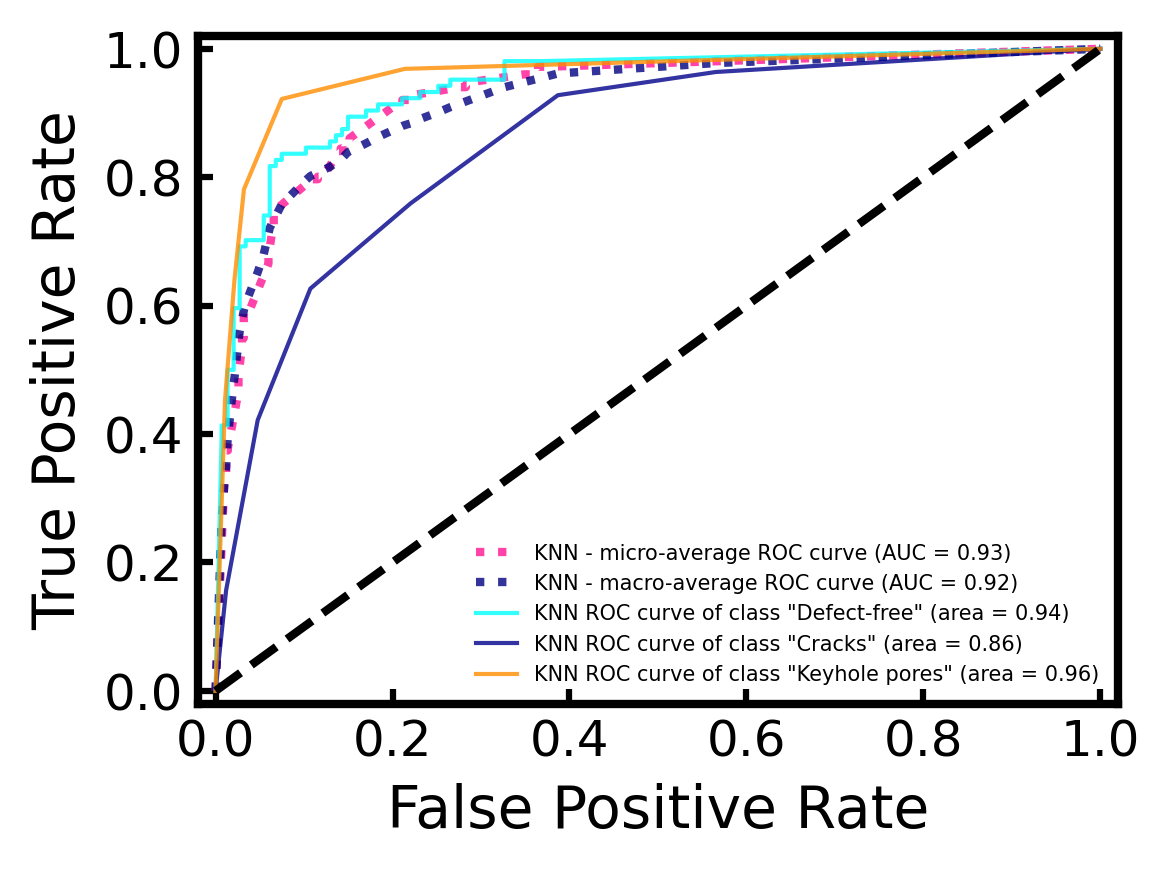

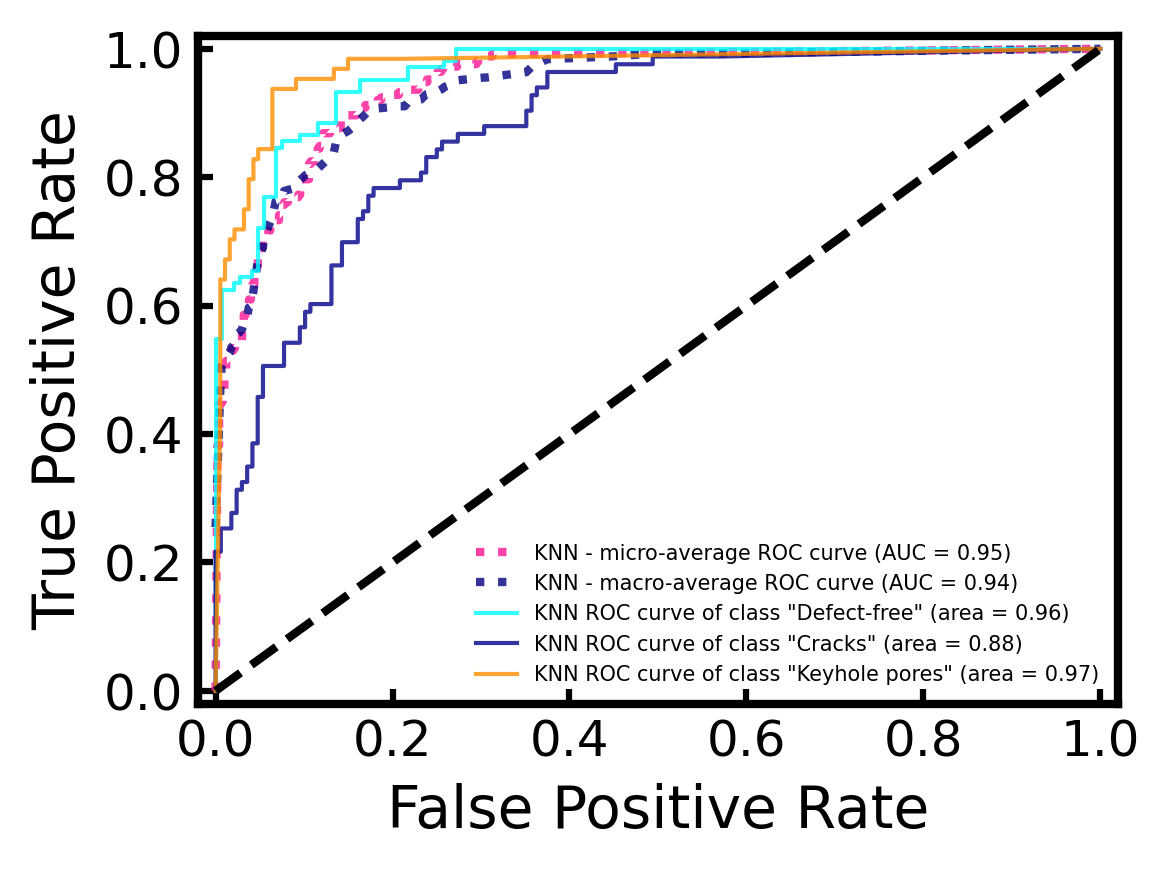

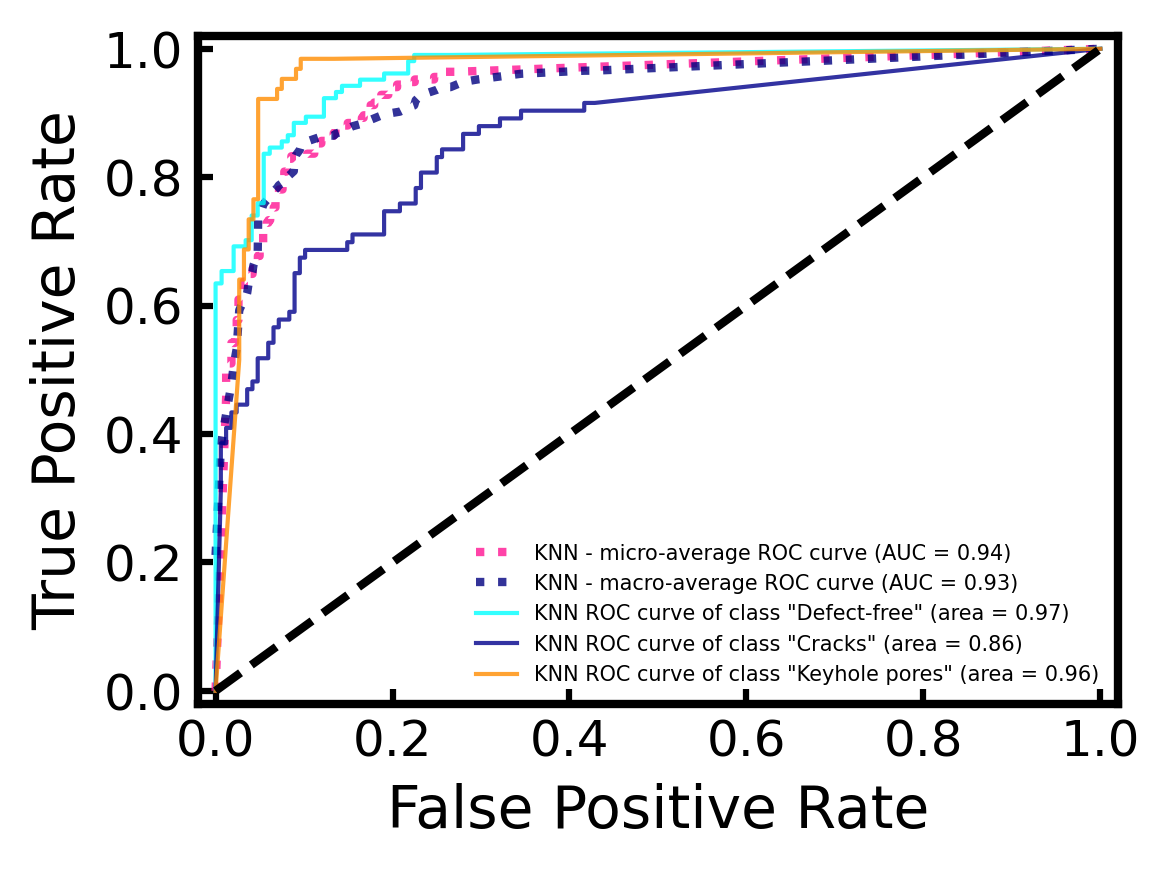

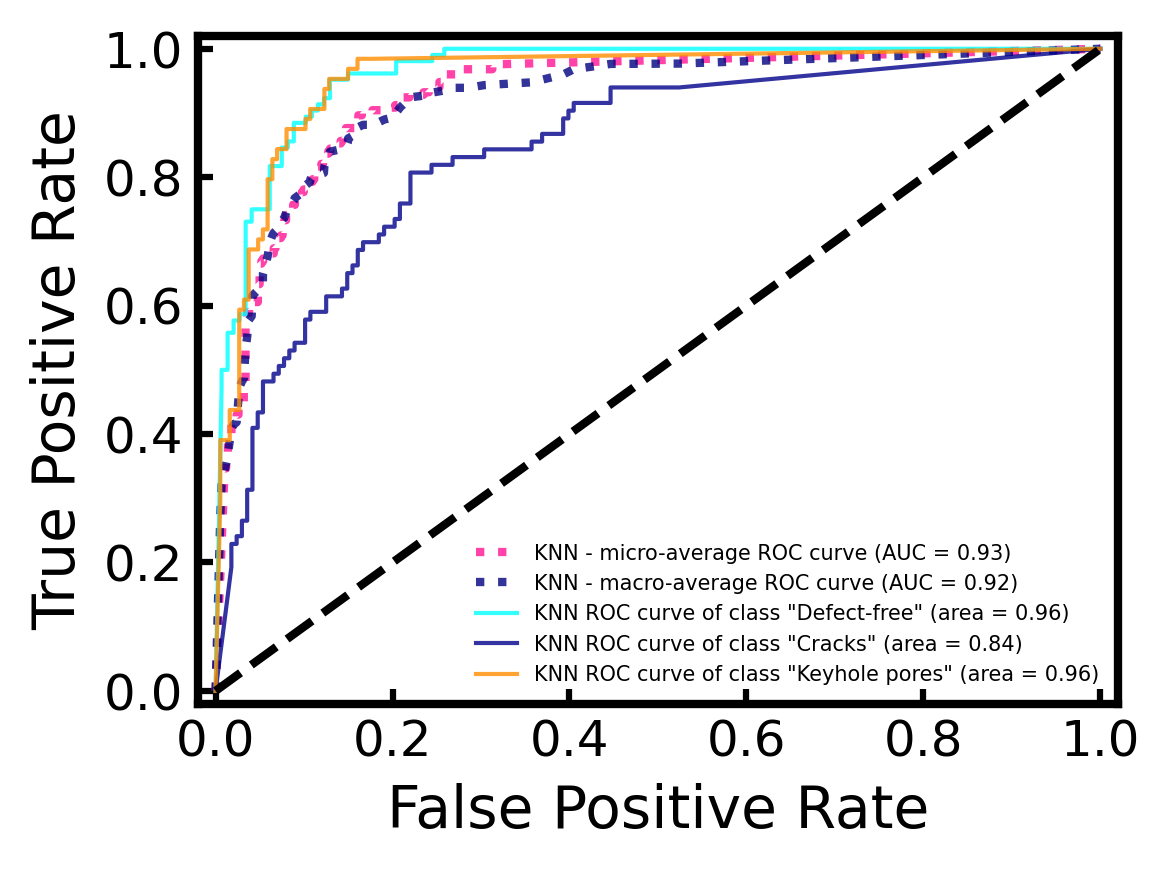

In [37]:
KNN_banpassed = KNN_classification(X_original_selected, y, original_auc_mean, original_auc_std, original_accuracy_mean_list, original_accuracy_std_list, "original")
KNN_banpassed = KNN_classification(X_equalized_selected, y, equalized_auc_mean, equalized_auc_std, equalized_accuracy_mean_list, equalized_accuracy_std_list, "equalized")
KNN_banpassed = KNN_classification(X_bandpassed_selected, y, bandpassed_auc_mean, bandpassed_auc_std, bandpassed_accuracy_mean_list, bandpassed_accuracy_std_list, "bandpassed")
KNN_banpassed = KNN_classification(X_denoised_selected, y, denoised_auc_mean, denoised_auc_std, denoised_accuracy_mean_list, denoised_accuracy_std_list, "denoised")

### Guassian Process 

In [38]:
def guassian_process_classification(X, Y, auc_mean_list, auc_std_list, accuracy_mean_list, accuracy_std_list, signal_type, 
                                  labels_=['Defect-free', 'Cracks','Keyhole pores']):
    ################--------------------------------------------------------------------#####################
    ################------Step 1: Preparation, standarization, and train test split-----#####################
    ################--------------------------------------------------------------------#####################
    classifier_name = "GP"
    n_classes = len(labels_)
    
    # Transform the feature data X to zero mean and unit variance:
    X = StandardScaler().fit_transform(X)
    # Split the data into training and testing sets:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, shuffle=True)
    
    # One-hot-encode the ouput
    Y_test_ohe = label_binarize(Y_test, classes=[0, 1, 2])
    Y_train_ohe = label_binarize(Y_train, classes=[0, 1, 2])
    
    ################--------------------------------------------------------------------#####################
    ################------Step 2: Hyperparameter Optimization using Grid Search---------#####################
    ################--------------------------------------------------------------------#####################
    print("\n-------------------------------------------------------------------------------------------------")
    print("\n-------------Signal type: " + signal_type + "-----------")
    
    kernel = 1.0 * RBF(1.0)
    tuned_parameters = {'kernel': [kernel],
                        'optimizer': [None, 'fmin_l_bfgs_b']}    # a dict (dictionary)

    clf = GridSearchCV(GaussianProcessClassifier(), tuned_parameters, scoring="accuracy", cv=5)  # for scoring metrics: https://scikit-learn.org/0.15/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules
    clf.fit(X_train, Y_train)

    score = clf.score(X_test, Y_test)
    print("\nTest score: %s" % score)

    Y_predict = clf.predict(X_test)
    # print("\nY_predict (testing data) = ")
    # print(Y_predict)

    print("\nAccuracy of logistic regression classifier (testing data):")
    print(metrics.accuracy_score(Y_test, Y_predict))

    print("\nclassification report:")
    print(classification_report(Y_test, Y_predict,digits=5))

    # accuracy_list.append(metrics.accuracy_score(Y_test, Y_predict))
    #################--------------------------------------------------------------------#####################
    ################------Step 3: Perform cross-validation on the model ------- ---------#####################
    ################---------------------------------------------------------------------#####################
    kf = KFold(n_splits=5)
    trains = []
    tests = []
    
    for train, test in kf.split(X):

        X_shuffle, y_shuffle = shuffle(X, Y, random_state=0)
        y_shuffle = np.array(y_shuffle)

        # X_cv_train_before = X_shuffle[train]
        # X_cv_test_before = X_shuffle[test]
        X_train_cv = X_shuffle[train]
        X_test_cv = X_shuffle[test]
        y_train_cv = y_shuffle[train]
        y_test_cv = y_shuffle[test]

        clf.fit(X_train_cv, y_train_cv)

        trains.append(clf.score(X_train_cv, y_train_cv))
        tests.append(clf.score(X_test_cv, y_test_cv))

    trains = np.array(trains)
    tests = np.array(tests)


    test_accuracy_mean = tests.mean()
    test_accuracy_std = tests.std()

    train_accuracy_mean = trains.mean()
    train_accuracy_std =  trains.std()
    
    
    #################--------------------------------------------------------------------#####################
    ################---------------Step 4: AUC-ROC score measurement --------------------#####################
    ################---------------------------------------------------------------------#####################
    
    # ----------------Learn to predict each class against the other------------------------
    classifier = OneVsRestClassifier(clf)
    # if classifier_name == 'SVC':
    #     y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    # else:
    y_score = classifier.fit(X_train, Y_train_ohe).predict_proba(X_test)
    
    # ---------------Compute ROC curve and ROC area for each class-------------------------
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test_ohe[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_ohe.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # ----------------------------------Plot all ROC curves-------------------------------
    plt.figure(figsize = (4,3), dpi = 300)
    widths = 2
    ax = gca()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(widths)

        tick_width = 1.5
    plt.tick_params(direction = 'in', width = tick_width)
    
    #---------------------------(1) micro and macro ROC curve---------------------------
    plt.plot(fpr["micro"], tpr["micro"],
             label=classifier_name + ' - micro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=2, alpha = 0.8) #deeppink, midnightblue

    plt.plot(fpr["macro"], tpr["macro"],
             label=classifier_name + ' - macro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=2, alpha = 0.8) #navy, gold
    
    #---------------------------(2) ROC curve for each class---------------------------
    colors = cycle(["aqua", "darkblue", "darkorange", "red"])
    # colors = cycle(['0.45', 'steelblue',  'olive', 'silver'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i],color=color,
                 lw=1, alpha = 0.8,
                 label=classifier_name + " ROC curve of class \"{0}\" (area = {1:0.2f})".format(labels_[i], roc_auc[i])) 

    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # plt.title("ROC curve")
    plt.legend(loc="lower right",  fontsize = '5', frameon = False)
    # plt.show()
    
    #----------------------------------Extract the auc score to list-----------------------------------
    auc_score_list = []
    auc_score_list.append(auc(fpr["micro"], tpr["micro"]))
    
    auc_score_array = np.array(auc_score_list)
    auc_mean = auc_score_array.mean()
    auc_std = auc_score_array.std()
    
    
    #################--------------------------------------------------------------------#####################
    ################----------Step 5: Append all the matrix to the list -----------------#####################
    ################---------------------------------------------------------------------#####################
    
    auc_mean_list.append(auc_mean)
    auc_std_list.append(auc_std)
    accuracy_mean_list.append(test_accuracy_mean)
    accuracy_std_list.append(test_accuracy_std)
    
    print('Test Accuracy (cross-validation) for' , classifier_name, '= {:.5f} ± {:.5f}'.format(test_accuracy_mean, test_accuracy_std))
    print('micro-averaging AUC for' , classifier_name, '= {:.5f} ± {:.5f}'.format(auc_mean, auc_std))
    save_fig("ROC_" + classifier_name + "_" + signal_type)
    
    return [Y_predict, Y_test]


-------------------------------------------------------------------------------------------------

-------------Signal type: original-----------

Test score: 0.848605577689243

Accuracy of logistic regression classifier (testing data):
0.848605577689243

classification report:
              precision    recall  f1-score   support

           0    0.89899   0.85577   0.87685       104
           1    0.79268   0.78313   0.78788        83
           2    0.84286   0.92188   0.88060        64

    accuracy                        0.84861       251
   macro avg    0.84484   0.85359   0.84844       251
weighted avg    0.84952   0.84861   0.84838       251

Test Accuracy (cross-validation) for GP = 0.83132 ± 0.02772
micro-averaging AUC for GP = 0.94735 ± 0.00000
Saving figure ROC_GP_original

-------------------------------------------------------------------------------------------------

-------------Signal type: equalized-----------

Test score: 0.8605577689243028

Accuracy of logistic re

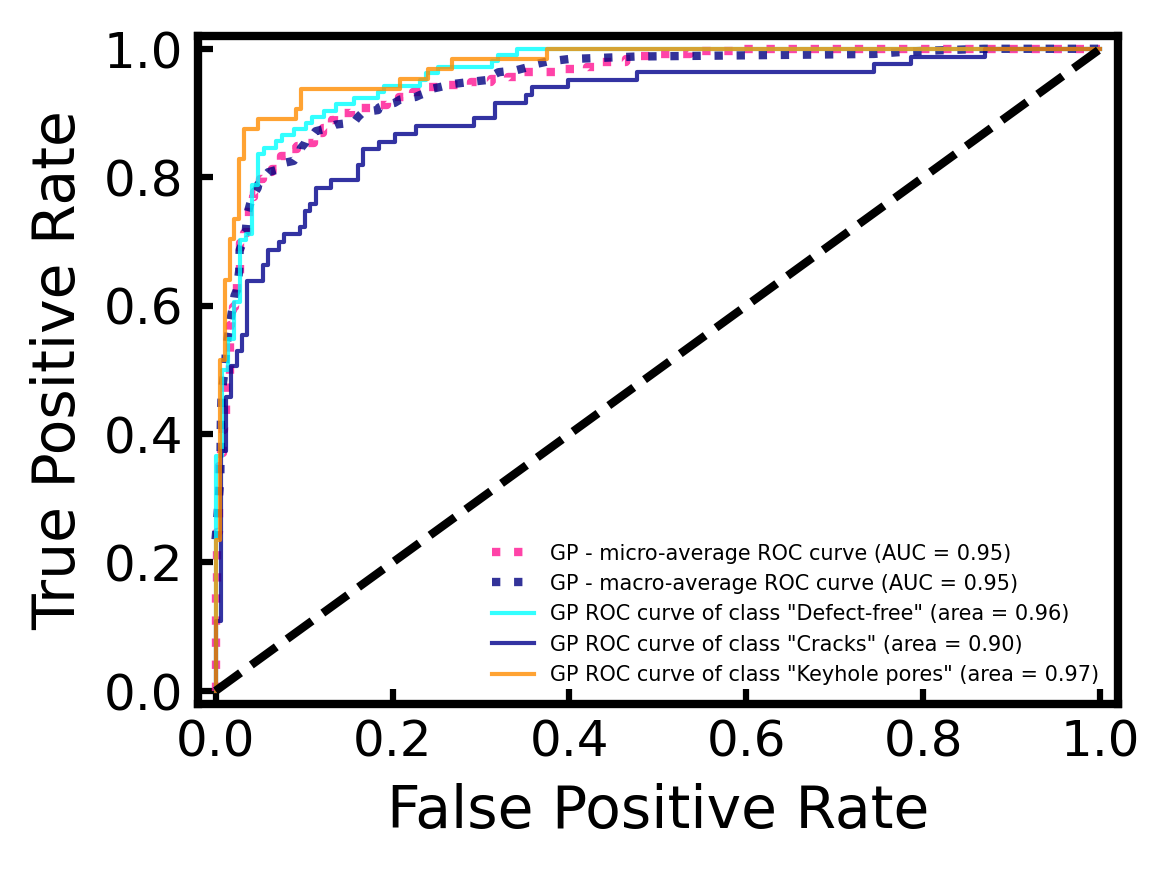

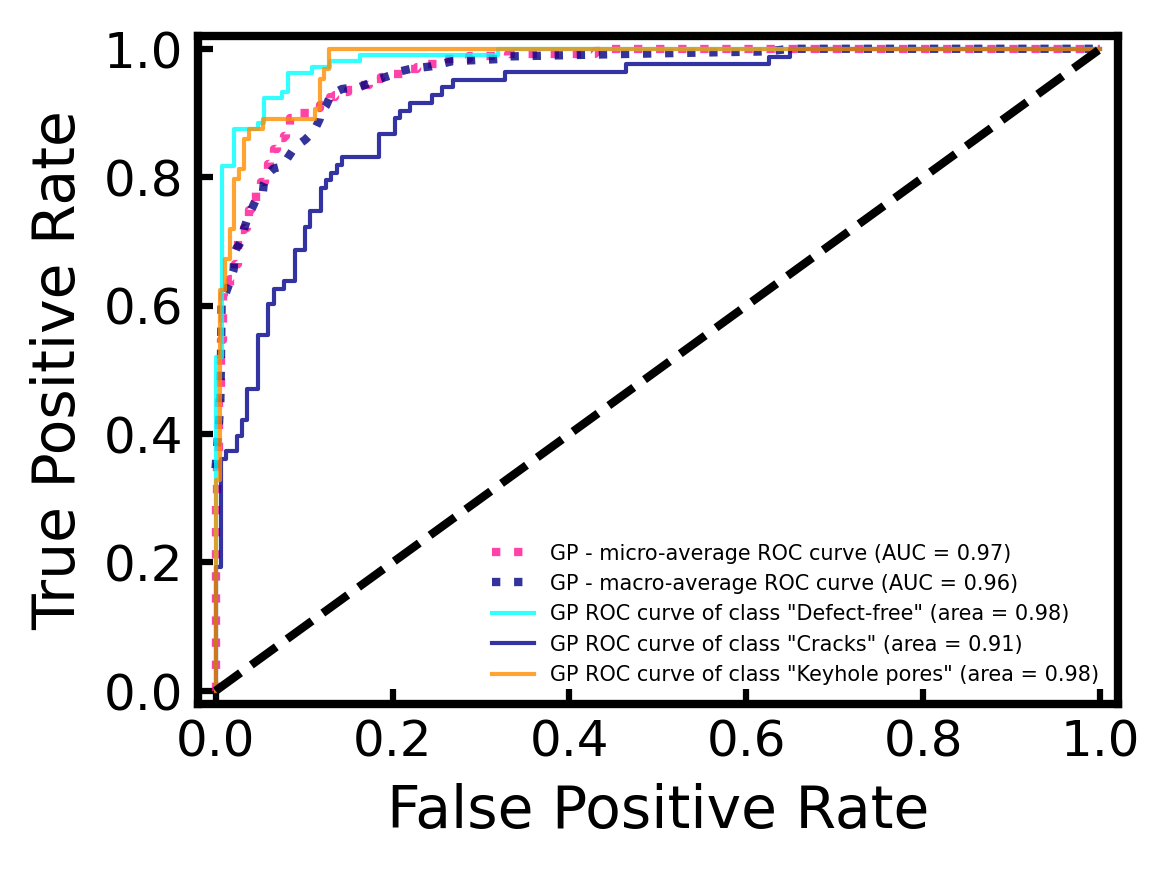

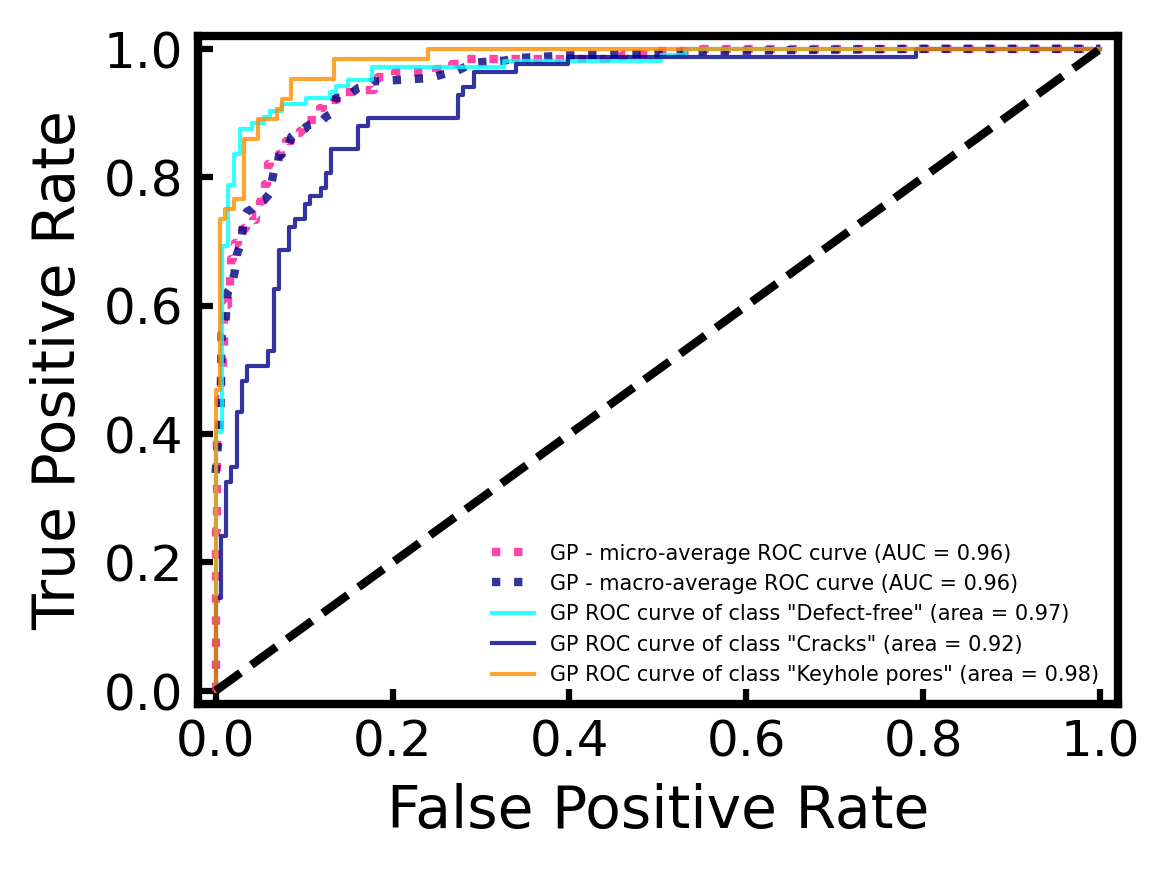

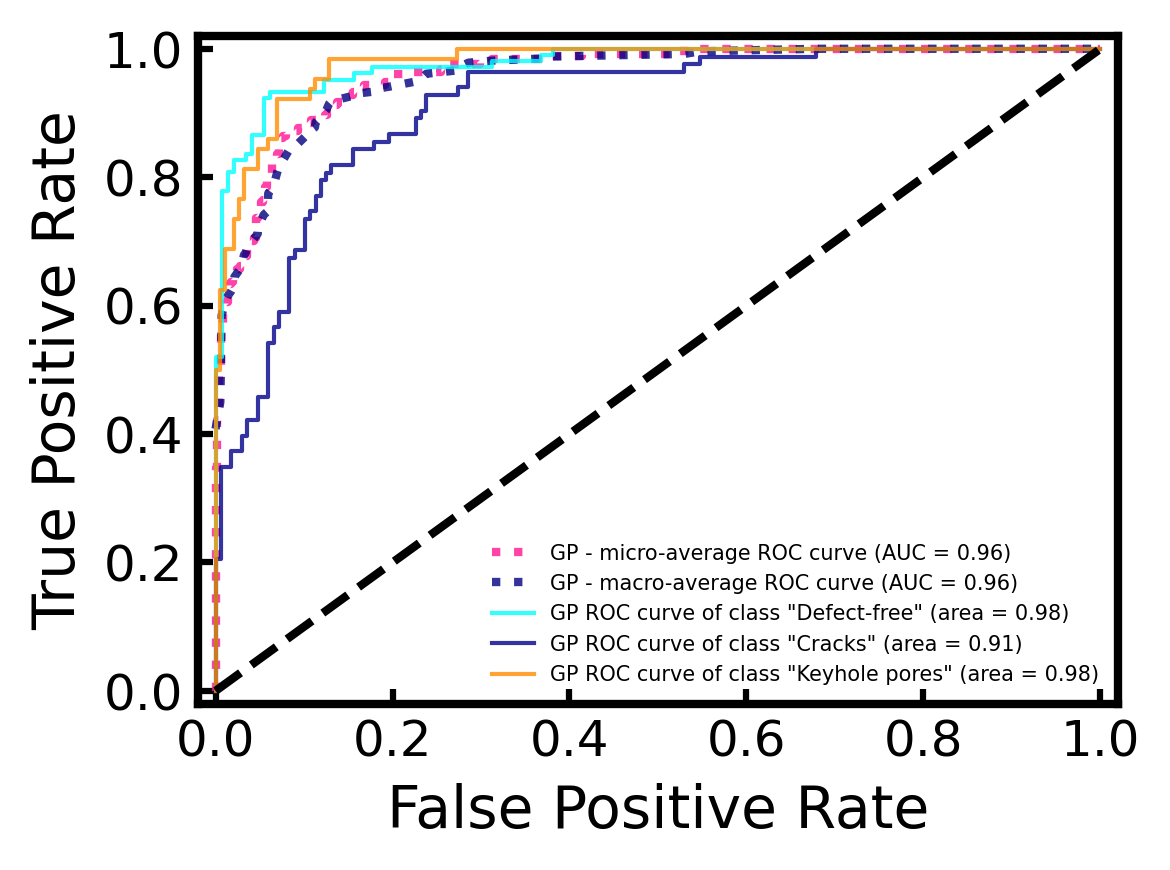

In [39]:
GP_original = guassian_process_classification(X_original_selected, y, original_auc_mean, original_auc_std, original_accuracy_mean_list, original_accuracy_std_list, "original")
GP_equalized = guassian_process_classification(X_equalized_selected, y, equalized_auc_mean, equalized_auc_std, equalized_accuracy_mean_list, equalized_accuracy_std_list, "equalized")
GP_bandpassed = guassian_process_classification(X_bandpassed_selected, y, bandpassed_auc_mean, bandpassed_auc_std, bandpassed_accuracy_mean_list, bandpassed_accuracy_std_list, "bandpassed")
GP_denoised = guassian_process_classification(X_denoised_selected, y, denoised_auc_mean, denoised_auc_std, denoised_accuracy_mean_list, denoised_accuracy_std_list, "denoised")

### Logistic regression

In [40]:
def logistic_regression_classification(X, Y, auc_mean_list, auc_std_list, accuracy_mean_list, accuracy_std_list, signal_type, 
                                        labels_=['Defect-free', 'Cracks','Keyhole pores']):
    ################--------------------------------------------------------------------#####################
    ################------Step 1: Preparation, standarization, and train test split-----#####################
    ################--------------------------------------------------------------------#####################
    classifier_name = "LR"
    n_classes = len(labels_)
    
    # Transform the feature data X to zero mean and unit variance:
    X = StandardScaler().fit_transform(X)
    # Split the data into training and testing sets:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, shuffle=True)
    
    # One-hot-encode the ouput
    Y_test_ohe = label_binarize(Y_test, classes=[0, 1, 2])
    Y_train_ohe = label_binarize(Y_train, classes=[0, 1, 2])
    
    ################--------------------------------------------------------------------#####################
    ################------Step 2: Hyperparameter Optimization using Grid Search---------#####################
    ################--------------------------------------------------------------------#####################
    
    print("\n-------------------------------------------------------------------------------------------------")
    print("\n-------------Signal type: " + signal_type + "-----------")
    
    clf = LogisticRegression()

    clf.fit(X_train, Y_train)

    score = clf.score(X_test, Y_test)
    print("\nTest score: %s" % score)

    Y_predict = clf.predict(X_test)
    # print("\nY_predict (testing data) = ")
    # print(Y_predict)

    print("\nAccuracy of logistic regression classifier (testing data):")
    print(metrics.accuracy_score(Y_test, Y_predict))

    print("\nclassification report:")
    print(classification_report(Y_test, Y_predict,digits=5))

    # accuracy_list.append(metrics.accuracy_score(Y_test, Y_predict))
    #################--------------------------------------------------------------------#####################
    ################------Step 3: Perform cross-validation on the model ------- ---------#####################
    ################---------------------------------------------------------------------#####################
    kf = KFold(n_splits=5)
    trains = []
    tests = []
    
    for train, test in kf.split(X):

        X_shuffle, y_shuffle = shuffle(X, Y, random_state=0)
        y_shuffle = np.array(y_shuffle)

        # X_cv_train_before = X_shuffle[train]
        # X_cv_test_before = X_shuffle[test]
        X_train_cv = X_shuffle[train]
        X_test_cv = X_shuffle[test]
        y_train_cv = y_shuffle[train]
        y_test_cv = y_shuffle[test]

        clf.fit(X_train_cv, y_train_cv)

        trains.append(clf.score(X_train_cv, y_train_cv))
        tests.append(clf.score(X_test_cv, y_test_cv))

    trains = np.array(trains)
    tests = np.array(tests)


    test_accuracy_mean = tests.mean()
    test_accuracy_std = tests.std()

    train_accuracy_mean = trains.mean()
    train_accuracy_std =  trains.std()
    
    
    #################--------------------------------------------------------------------#####################
    ################---------------Step 4: AUC-ROC score measurement --------------------#####################
    ################---------------------------------------------------------------------#####################
    
    # ----------------Learn to predict each class against the other------------------------
    classifier = OneVsRestClassifier(clf)
    # if classifier_name == 'SVC':
    #     y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    # else:
    y_score = classifier.fit(X_train, Y_train_ohe).predict_proba(X_test)
    
    # ---------------Compute ROC curve and ROC area for each class-------------------------
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test_ohe[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_ohe.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # ----------------------------------Plot all ROC curves-------------------------------
    plt.figure(figsize = (4,3), dpi = 300)
    widths = 2
    ax = gca()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(widths)

        tick_width = 1.5
    plt.tick_params(direction = 'in', width = tick_width)
    
    #---------------------------(1) micro and macro ROC curve---------------------------
    plt.plot(fpr["micro"], tpr["micro"],
             label=classifier_name + ' - micro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=2, alpha = 0.8) #deeppink, midnightblue

    plt.plot(fpr["macro"], tpr["macro"],
             label=classifier_name + ' - macro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=2, alpha = 0.8) #navy, gold
    
    #---------------------------(2) ROC curve for each class---------------------------
    colors = cycle(["aqua", "darkblue", "darkorange", "red"])
    # colors = cycle(['0.45', 'steelblue',  'olive', 'silver'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i],color=color,
                 lw=1, alpha = 0.8,
                 label=classifier_name + " ROC curve of class \"{0}\" (area = {1:0.2f})".format(labels_[i], roc_auc[i])) 

    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # plt.title("ROC curve")
    plt.legend(loc="lower right",  fontsize = '5', frameon = False)
    # plt.show()
    
    #----------------------------------Extract the auc score to list-----------------------------------
    auc_score_list = []
    auc_score_list.append(auc(fpr["micro"], tpr["micro"]))
    
    auc_score_array = np.array(auc_score_list)
    auc_mean = auc_score_array.mean()
    auc_std = auc_score_array.std()
    
    
    #################--------------------------------------------------------------------#####################
    ################----------Step 5: Append all the matrix to the list -----------------#####################
    ################---------------------------------------------------------------------#####################
    
    auc_mean_list.append(auc_mean)
    auc_std_list.append(auc_std)
    accuracy_mean_list.append(test_accuracy_mean)
    accuracy_std_list.append(test_accuracy_std)
    
    print('Test Accuracy (cross-validation) for' , classifier_name, '= {:.5f} ± {:.5f}'.format(test_accuracy_mean, test_accuracy_std))
    print('micro-averaging AUC for' , classifier_name, '= {:.5f} ± {:.5f}'.format(auc_mean, auc_std))
    save_fig("ROC_" + classifier_name + "_" + signal_type)
    
    return [Y_predict, Y_test]


-------------------------------------------------------------------------------------------------

-------------Signal type: original-----------

Test score: 0.7808764940239044

Accuracy of logistic regression classifier (testing data):
0.7808764940239044

classification report:
              precision    recall  f1-score   support

           0    0.86139   0.83654   0.84878       104
           1    0.66279   0.68675   0.67456        83
           2    0.81250   0.81250   0.81250        64

    accuracy                        0.78088       251
   macro avg    0.77889   0.77860   0.77861       251
weighted avg    0.78325   0.78088   0.78192       251

Test Accuracy (cross-validation) for LR = 0.76978 ± 0.02429
micro-averaging AUC for LR = 0.91981 ± 0.00000
Saving figure ROC_LR_original

-------------------------------------------------------------------------------------------------

-------------Signal type: equalized-----------

Test score: 0.7888446215139442

Accuracy of logistic 

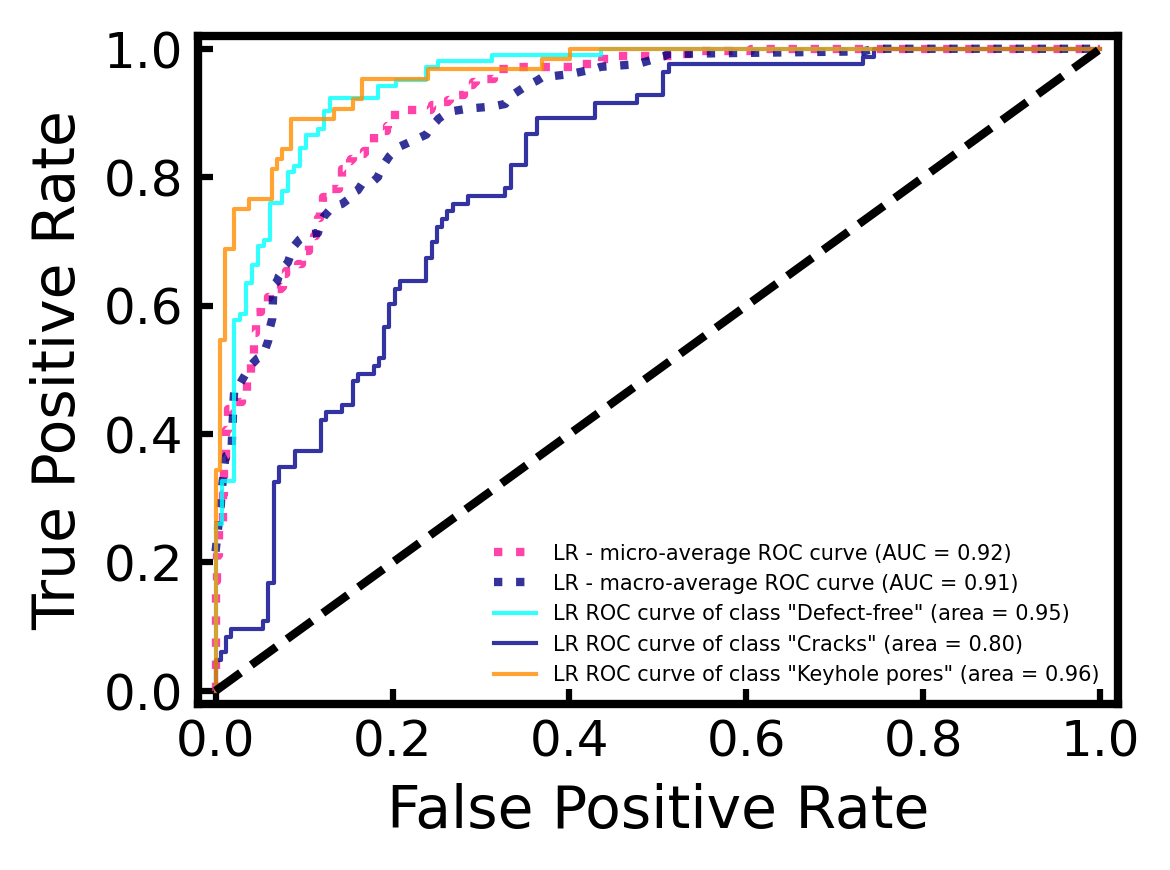

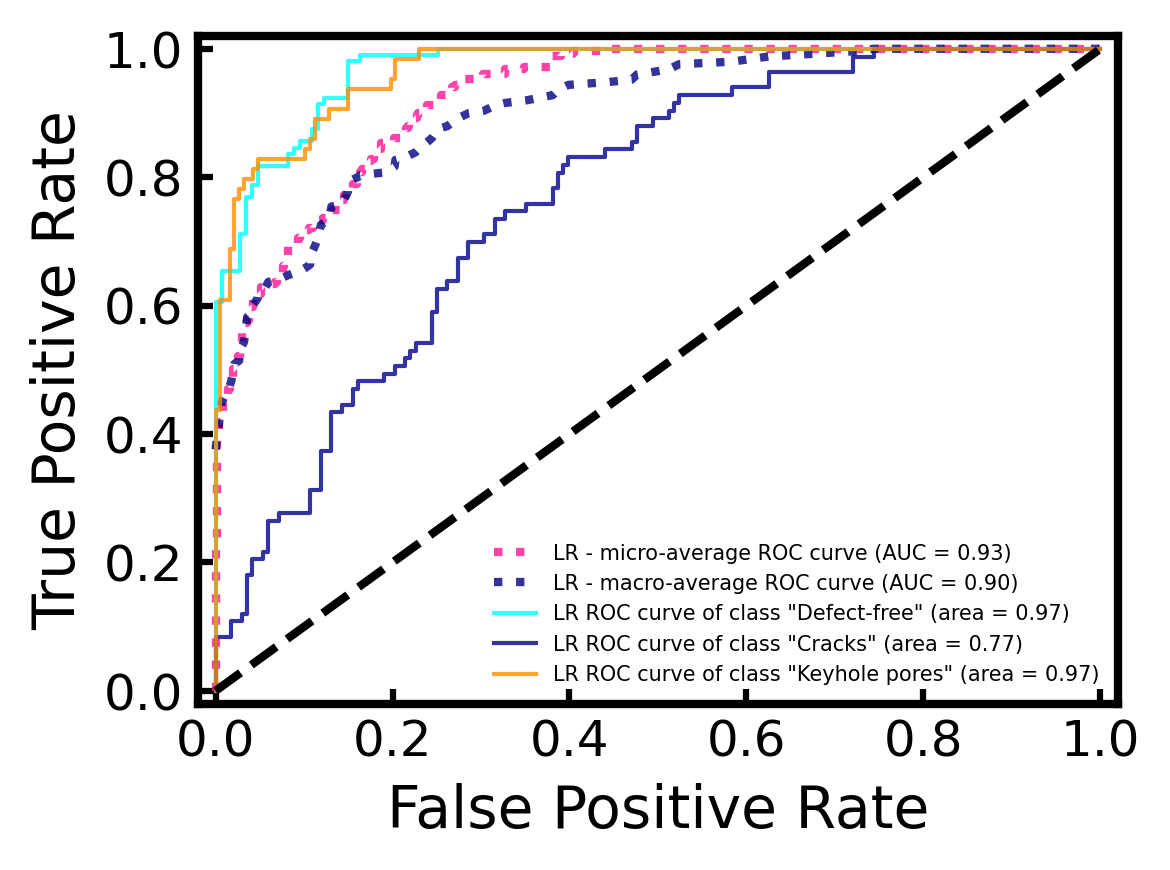

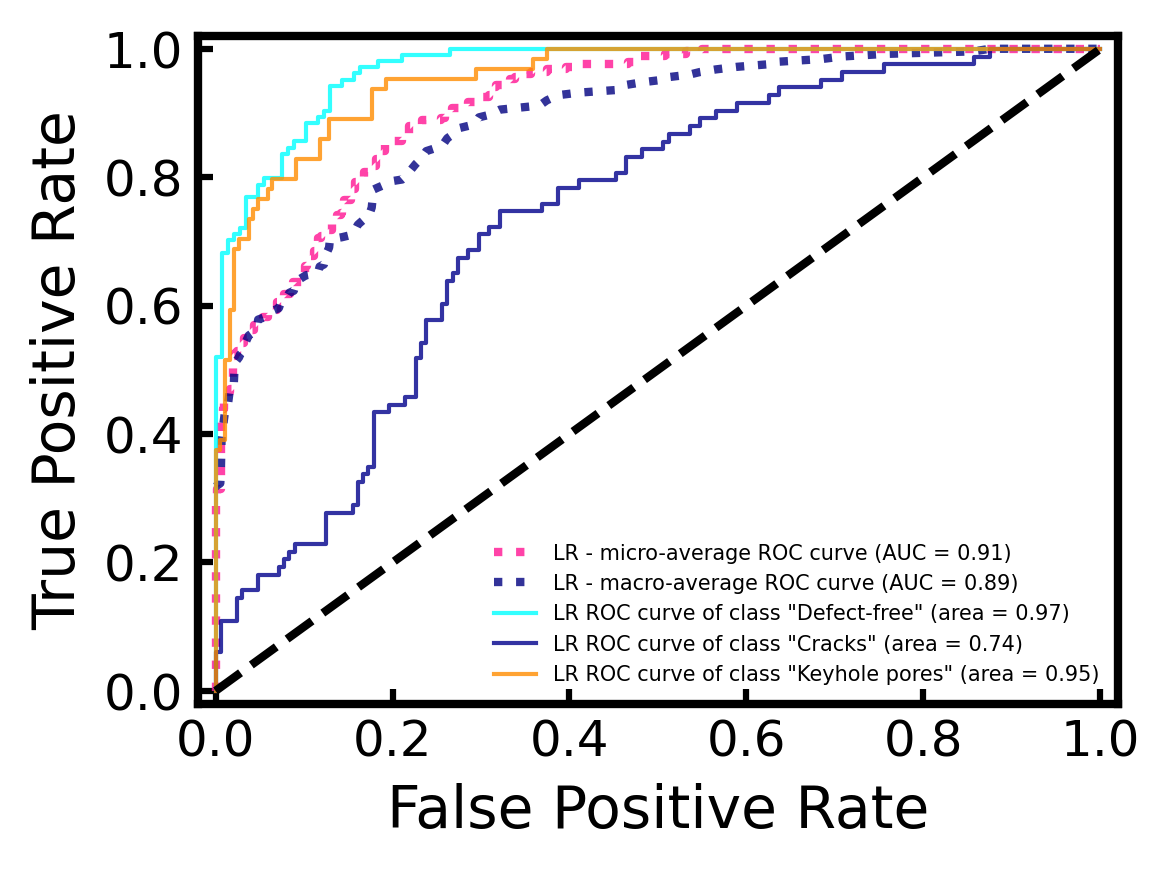

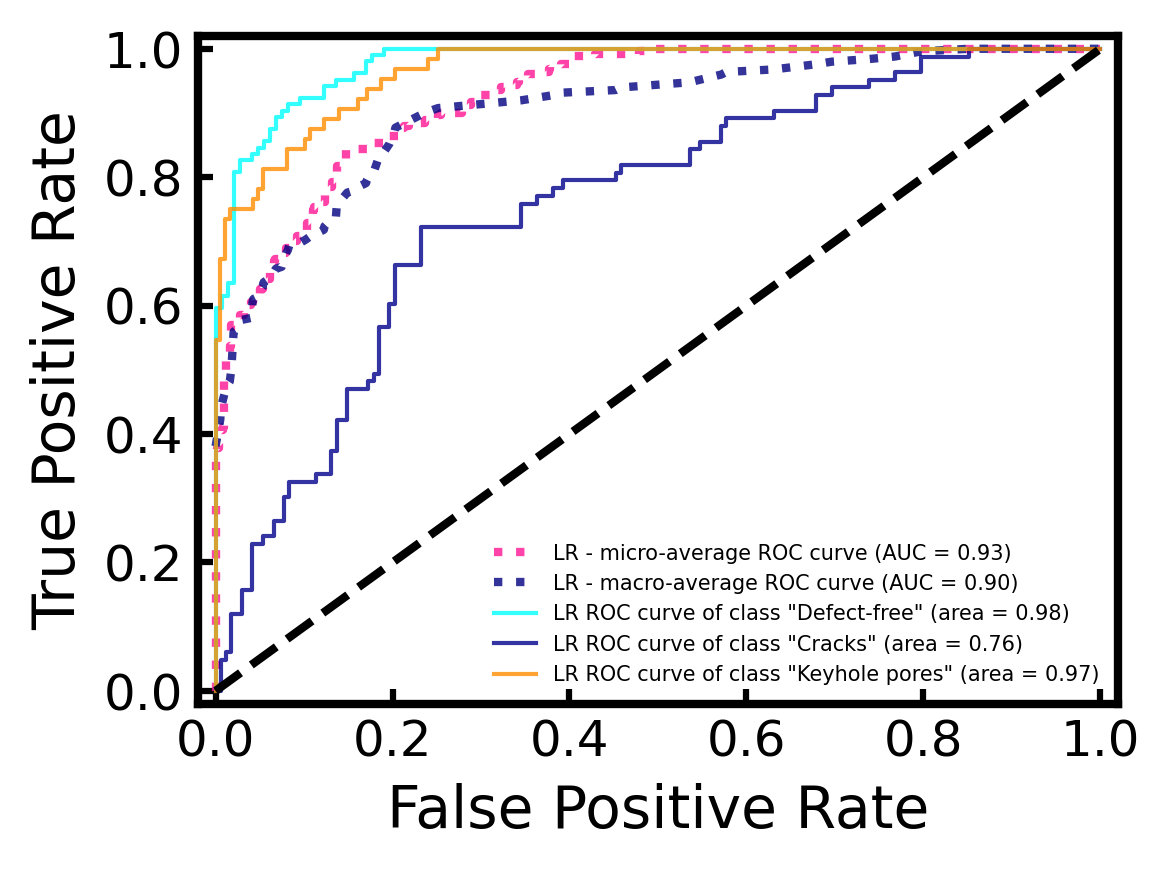

In [41]:
LR_original = logistic_regression_classification(X_original_selected, y, original_auc_mean, original_auc_std, original_accuracy_mean_list, original_accuracy_std_list, "original")
LR_equalized = logistic_regression_classification(X_equalized_selected, y, equalized_auc_mean, equalized_auc_std, equalized_accuracy_mean_list, equalized_accuracy_std_list, "equalized")
LR_bandpassed = logistic_regression_classification(X_bandpassed_selected, y, bandpassed_auc_mean, bandpassed_auc_std, bandpassed_accuracy_mean_list, bandpassed_accuracy_std_list, "bandpassed")
LR_denoised = logistic_regression_classification(X_denoised_selected, y, denoised_auc_mean, denoised_auc_std, denoised_accuracy_mean_list, denoised_accuracy_std_list, "denoised")

### SVM

In [42]:
def SVM_classification(X, Y, auc_mean_list, auc_std_list, accuracy_mean_list, accuracy_std_list, signal_type, 
                        labels_=['Defect-free', 'Cracks','Keyhole pores']):
    ################--------------------------------------------------------------------#####################
    ################------Step 1: Preparation, standarization, and train test split-----#####################
    ################--------------------------------------------------------------------#####################
    classifier_name = "SVM"
    n_classes = len(labels_)
    
    # Transform the feature data X to zero mean and unit variance:
    X = StandardScaler().fit_transform(X)
    # Split the data into training and testing sets:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, shuffle=True)
    
    # One-hot-encode the ouput
    Y_test_ohe = label_binarize(Y_test, classes=[0, 1, 2])
    Y_train_ohe = label_binarize(Y_train, classes=[0, 1, 2])
    
    ################--------------------------------------------------------------------#####################
    ################------Step 2: Hyperparameter Optimization using Grid Search---------#####################
    ################--------------------------------------------------------------------#####################
    
    # Optimize the SVM Classfier's hyper-parameters:
    # Ref: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                        {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
    clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring="accuracy", cv=5)  
    # for scoring metrics: https://scikit-learn.org/0.15/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules
    # , "f1_macro", "f1_micro", "roc_auc"
    clf.fit(X_train, Y_train)
    
    print("\n--------------------------------------------------")
    print("\n-------------Signal type: " + signal_type + "-----------")
    
    print("\nBest parameters set found on development set:")
    print(clf.best_params_)
    
    score = clf.score(X_test, Y_test)
    print("\nTest score: %.3f" % score)

    Y_predict = clf.predict(X_test)
    # print("\nY_predict (testing data) = ")
    # print(Y_predict)

    print("\nAccuracy of SVM classifier (testing data):")
    print(metrics.accuracy_score(Y_test, Y_predict))

    print("\nclassification report:")
    print(classification_report(Y_test, Y_predict,digits=5))

    # accuracy_list.append(metrics.accuracy_score(Y_test, Y_predict))
    #################--------------------------------------------------------------------#####################
    ################------Step 3: Perform cross-validation on the model ------- ---------#####################
    ################---------------------------------------------------------------------#####################
    kf = KFold(n_splits=3)
    trains = []
    tests = []
    
    for train, test in kf.split(X):

        X_shuffle, y_shuffle = shuffle(X, Y, random_state=0)
        y_shuffle = np.array(y_shuffle)

        # X_cv_train_before = X_shuffle[train]
        # X_cv_test_before = X_shuffle[test]
        X_train_cv = X_shuffle[train]
        X_test_cv = X_shuffle[test]
        y_train_cv = y_shuffle[train]
        y_test_cv = y_shuffle[test]

        clf.fit(X_train_cv, y_train_cv)

        trains.append(clf.score(X_train_cv, y_train_cv))
        tests.append(clf.score(X_test_cv, y_test_cv))

    trains = np.array(trains)
    tests = np.array(tests)


    test_accuracy_mean = tests.mean()
    test_accuracy_std = tests.std()

    train_accuracy_mean = trains.mean()
    train_accuracy_std =  trains.std()
    
    
    #################--------------------------------------------------------------------#####################
    ################---------------Step 4: AUC-ROC score measurement --------------------#####################
    ################---------------------------------------------------------------------#####################

   
    # ----------------Learn to predict each class against the other------------------------
    classifier = OneVsRestClassifier(clf)
    # if classifier_name == 'SVC':
    y_score = classifier.fit(X_train, Y_train_ohe).decision_function(X_test)
    
    # ---------------Compute ROC curve and ROC area for each class-------------------------
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test_ohe[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_ohe.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # ----------------------------------Plot all ROC curves-------------------------------
    plt.figure(figsize = (4,3), dpi = 300)
    widths = 2
    ax = gca()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(widths)

        tick_width = 1.5
    plt.tick_params(direction = 'in', width = tick_width)
    
    #---------------------------(1) micro and macro ROC curve---------------------------
    plt.plot(fpr["micro"], tpr["micro"],
             label=classifier_name + ' - micro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=2, alpha = 0.8) #deeppink, midnightblue

    plt.plot(fpr["macro"], tpr["macro"],
             label=classifier_name + ' - macro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=2, alpha = 0.8) #navy, gold
    
    #---------------------------(2) ROC curve for each class---------------------------
    colors = cycle(["aqua", "darkblue", "darkorange", "red"])
    # colors = cycle(['0.45', 'steelblue',  'olive', 'silver'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i],color=color,
                 lw=1, alpha = 0.8,
                 label=classifier_name + " ROC curve of class \"{0}\" (area = {1:0.2f})".format(labels_[i], roc_auc[i])) 

    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # plt.title("ROC curve")
    plt.legend(loc="lower right",  fontsize = '5', frameon = False)
    # plt.show()
    
    #----------------------------------Extract the auc score to list-----------------------------------
    auc_score_list = []
    auc_score_list.append(auc(fpr["micro"], tpr["micro"]))
    
    auc_score_array = np.array(auc_score_list)
    auc_mean = auc_score_array.mean()
    auc_std = auc_score_array.std()
    
    
    #################--------------------------------------------------------------------#####################
    ################----------Step 5: Append all the matrix to the list -----------------#####################
    ################---------------------------------------------------------------------#####################
    
    auc_mean_list.append(auc_mean)
    auc_std_list.append(auc_std)
    accuracy_mean_list.append(test_accuracy_mean)
    accuracy_std_list.append(test_accuracy_std)
    
    print('Test Accuracy (cross-validation) for' , classifier_name, '= {:.5f} ± {:.5f}'.format(test_accuracy_mean, test_accuracy_std))
    print('micro-averaging AUC for' , classifier_name, '= {:.5f} ± {:.5f}'.format(auc_mean, auc_std))
    save_fig("ROC_" + classifier_name + "_" + signal_type)
    
    return [Y_predict, Y_test]


--------------------------------------------------

-------------Signal type: original-----------

Best parameters set found on development set:
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Test score: 0.801

Accuracy of SVM classifier (testing data):
0.8007968127490039

classification report:
              precision    recall  f1-score   support

           0    0.88542   0.81731   0.85000       104
           1    0.68132   0.74699   0.71264        83
           2    0.84375   0.84375   0.84375        64

    accuracy                        0.80080       251
   macro avg    0.80350   0.80268   0.80213       251
weighted avg    0.80730   0.80080   0.80299       251

Test Accuracy (cross-validation) for SVM = 0.78497 ± 0.00986
micro-averaging AUC for SVM = 0.92845 ± 0.00000
Saving figure ROC_SVM_original

--------------------------------------------------

-------------Signal type: equalized-----------

Best parameters set found on development set:
{'C': 1000, 'gamma': 0.001, 'kernel

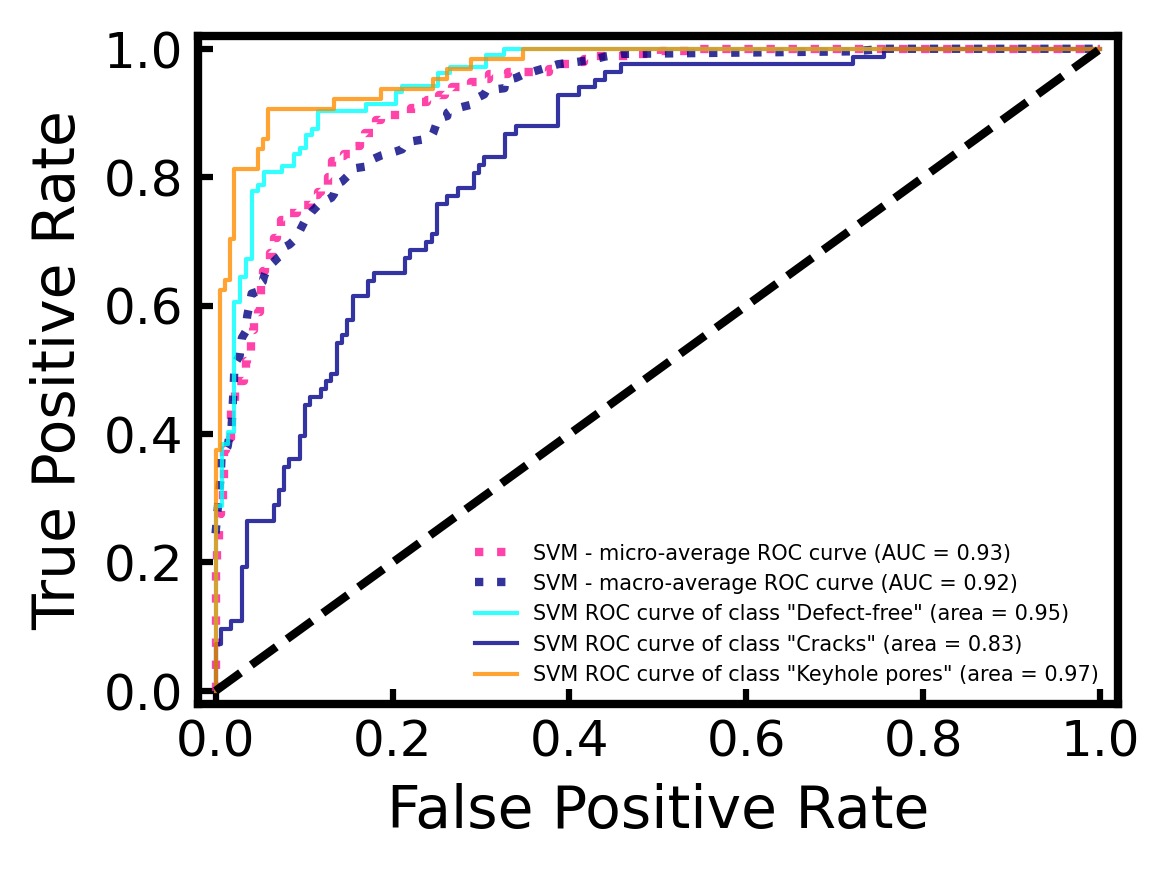

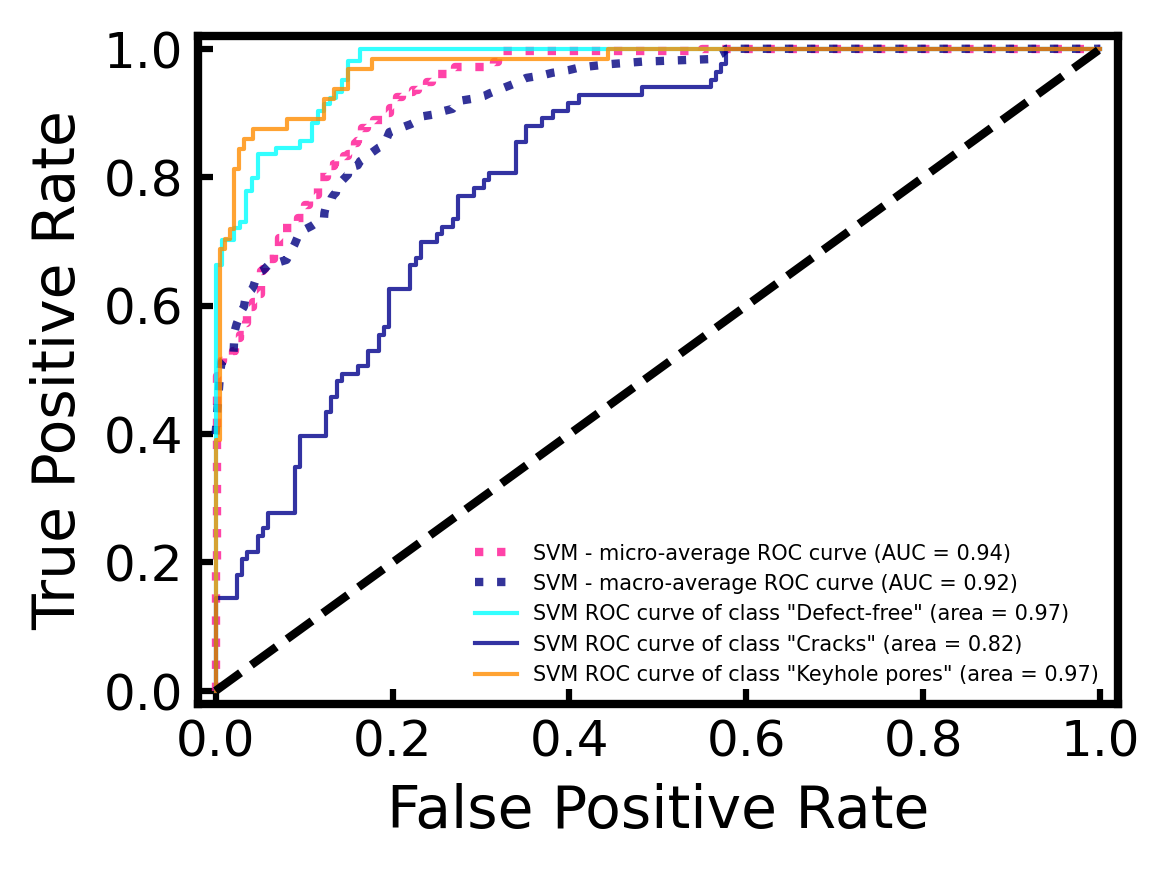

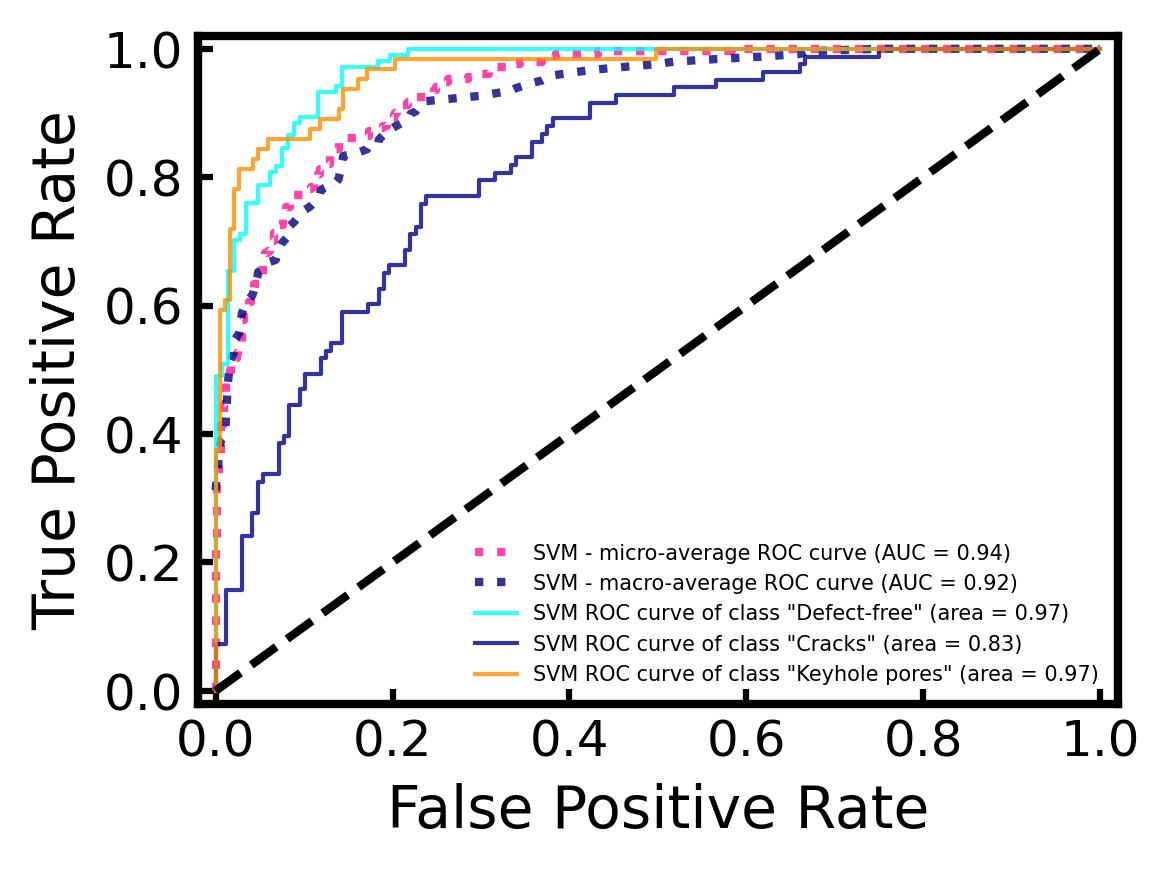

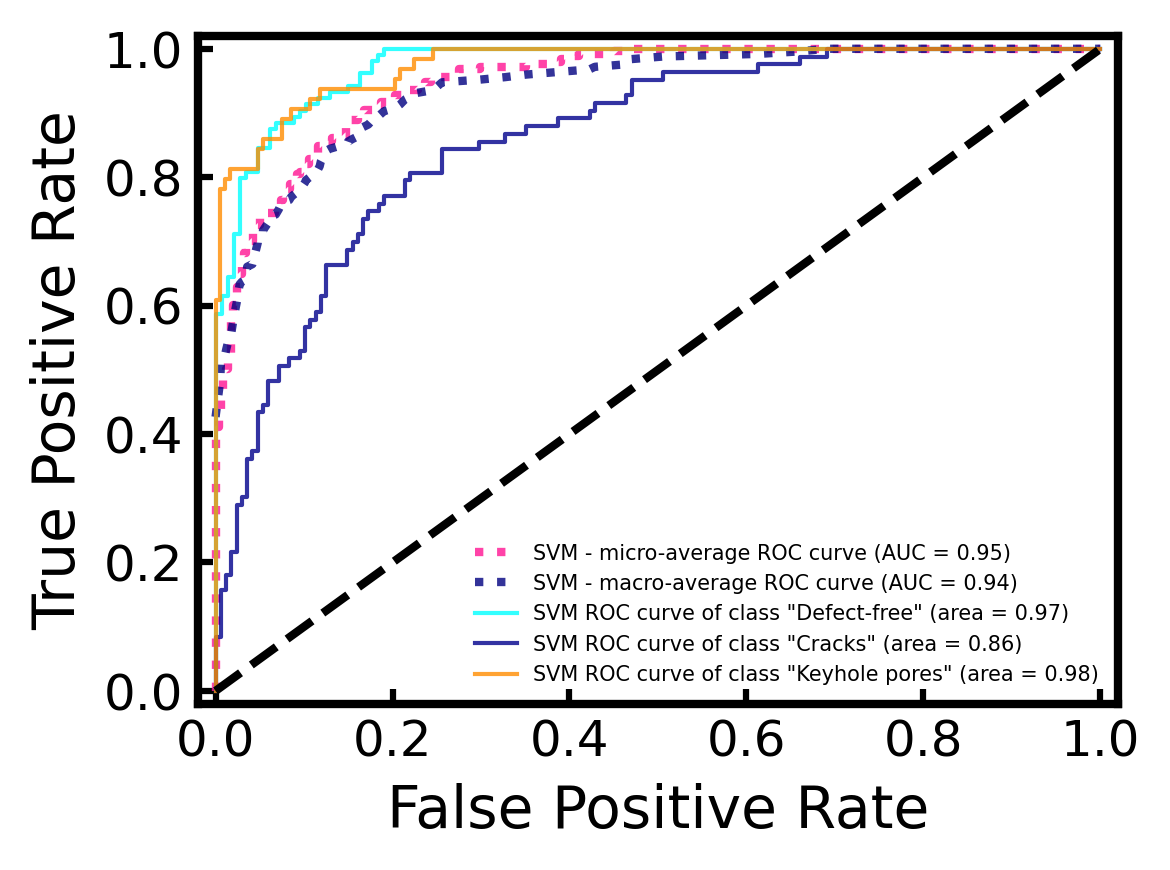

In [43]:
SVM_original =  SVM_classification(X_original_selected, y, original_auc_mean, original_auc_std, original_accuracy_mean_list, original_accuracy_std_list, "original")
SVM_equalized = SVM_classification(X_equalized_selected, y, equalized_auc_mean, equalized_auc_std, equalized_accuracy_mean_list, equalized_accuracy_std_list, "equalized")
SVM_bandpassed = SVM_classification(X_bandpassed_selected, y, bandpassed_auc_mean, bandpassed_auc_std, bandpassed_accuracy_mean_list, bandpassed_accuracy_std_list, "bandpassed")
SVM_denoised = SVM_classification(X_denoised_selected, y, denoised_auc_mean, denoised_auc_std, denoised_accuracy_mean_list, denoised_accuracy_std_list, "denoised")

### Neural Network Classification

In [44]:
def neural_network_classification(X, Y, auc_mean_list, auc_std_list, accuracy_mean_list, accuracy_std_list, signal_type, 
                                  labels_=['Defect-free', 'Cracks','Keyhole pores']):
    ################--------------------------------------------------------------------#####################
    ################------Step 1: Preparation, standarization, and train test split-----#####################
    ################--------------------------------------------------------------------#####################
    classifier_name = "NN"
    n_classes = len(labels_)
    
    # Transform the feature data X to zero mean and unit variance:
    X = StandardScaler().fit_transform(X)
    # Split the data into training and testing sets:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, shuffle=True)
    
    # One-hot-encode the ouput
    Y_test_ohe = label_binarize(Y_test, classes=[0, 1, 2, 3])
    Y_train_ohe = label_binarize(Y_train, classes=[0, 1, 2, 3])
    
    ################--------------------------------------------------------------------#####################
    ################------Step 2: Hyperparameter Optimization using Grid Search---------#####################
    ################--------------------------------------------------------------------#####################
    print("\n-------------------------------------------------------------------------------------------------")
    print("\n-------------Signal type: " + signal_type + "-----------")
    
    tuned_parameters = {'hidden_layer_sizes': [(32, 64, 128, 64 ), 
                                               (16, 32, 64, 32 ), 
                                               (16, 32, 64, 128)],
                        'activation': ['relu'],
                        'solver': ['lbfgs', 'adam'],
                        'learning_rate': ['constant', 'adaptive'], # 'invscaling'
                        'max_iter' : [500, 1000, 1500], 
                        "alpha": [1e-7, 1e-1]}    # a dict (dictionary)

    clf = GridSearchCV(MLPClassifier(), tuned_parameters, scoring="accuracy", cv=5)  # for scoring metrics: https://scikit-learn.org/0.15/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules
    clf.fit(X_train, Y_train)

    score = clf.score(X_test, Y_test)
    print("\nTest score: %s" % score)

    Y_predict = clf.predict(X_test)
    # print("\nY_predict (testing data) = ")
    # print(Y_predict)

    print("\nAccuracy of logistic regression classifier (testing data):")
    print(metrics.accuracy_score(Y_test, Y_predict))

    print("\nclassification report:")
    print(classification_report(Y_test, Y_predict,digits=5))

    # accuracy_list.append(metrics.accuracy_score(Y_test, Y_predict))
    #################--------------------------------------------------------------------#####################
    ################------Step 3: Perform cross-validation on the model ------- ---------#####################
    ################---------------------------------------------------------------------#####################
    kf = KFold(n_splits=5)
    trains = []
    tests = []
    
    for train, test in kf.split(X):

        X_shuffle, y_shuffle = shuffle(X, Y, random_state=0)
        y_shuffle = np.array(y_shuffle)

        # X_cv_train_before = X_shuffle[train]
        # X_cv_test_before = X_shuffle[test]
        X_train_cv = X_shuffle[train]
        X_test_cv = X_shuffle[test]
        y_train_cv = y_shuffle[train]
        y_test_cv = y_shuffle[test]

        clf.fit(X_train_cv, y_train_cv)

        trains.append(clf.score(X_train_cv, y_train_cv))
        tests.append(clf.score(X_test_cv, y_test_cv))

    trains = np.array(trains)
    tests = np.array(tests)


    test_accuracy_mean = tests.mean()
    test_accuracy_std = tests.std()

    train_accuracy_mean = trains.mean()
    train_accuracy_std =  trains.std()
    
    
    #################--------------------------------------------------------------------#####################
    ################---------------Step 4: AUC-ROC score measurement --------------------#####################
    ################---------------------------------------------------------------------#####################
    
    # ----------------Learn to predict each class against the other------------------------
    classifier = OneVsRestClassifier(clf)
    # if classifier_name == 'SVC':
    #     y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    # else:
    y_score = classifier.fit(X_train, Y_train_ohe).predict_proba(X_test)
    
    # ---------------Compute ROC curve and ROC area for each class-------------------------
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test_ohe[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_ohe.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # ----------------------------------Plot all ROC curves-------------------------------
    plt.figure(figsize = (4,3), dpi = 300)
    widths = 2
    ax = gca()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(widths)

        tick_width = 1.5
    plt.tick_params(direction = 'in', width = tick_width)
    
    #---------------------------(1) micro and macro ROC curve---------------------------
    plt.plot(fpr["micro"], tpr["micro"],
             label=classifier_name + ' - micro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=2, alpha = 0.8) #deeppink, midnightblue

    plt.plot(fpr["macro"], tpr["macro"],
             label=classifier_name + ' - macro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=2, alpha = 0.8) #navy, gold
    
    #---------------------------(2) ROC curve for each class---------------------------
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    # colors = cycle(['0.45', 'steelblue',  'olive', 'silver'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i],color=color,
                 lw=1, alpha = 0.8,
                 label=classifier_name + " ROC curve of class {0} (area = {1:0.2f})".format(labels_[i], roc_auc[i])) 

    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # plt.title("ROC curve")
    plt.legend(loc="lower right",  fontsize = '5', frameon = False)
    # plt.show()
    
    #----------------------------------Extract the auc score to list-----------------------------------
    auc_score_list = []
    auc_score_list.append(auc(fpr["micro"], tpr["micro"]))
    
    auc_score_array = np.array(auc_score_list)
    auc_mean = auc_score_array.mean()
    auc_std = auc_score_array.std()
    
    
    #################--------------------------------------------------------------------#####################
    ################----------Step 5: Append all the matrix to the list -----------------#####################
    ################---------------------------------------------------------------------#####################
    
    auc_mean_list.append(auc_mean)
    auc_std_list.append(auc_std)
    accuracy_mean_list.append(test_accuracy_mean)
    accuracy_std_list.append(test_accuracy_std)
    
    print('Test Accuracy (cross-validation) for' , classifier_name, '= {:.5f} ± {:.5f}'.format(test_accuracy_mean, test_accuracy_std))
    print('micro-averaging AUC for' , classifier_name, '= {:.5f} ± {:.5f}'.format(auc_mean, auc_std))
    save_fig("ROC_" + classifier_name + "_" + signal_type)

In [45]:
# neural_network_classification(X_original_selected, y, original_auc_mean, original_auc_std, original_accuracy_mean_list, original_accuracy_std_list, "original")
# neural_network_classification(X_equalized_selected, y, equalized_auc_mean, equalized_auc_std, equalized_accuracy_mean_list, equalized_accuracy_std_list, "equalized")
# neural_network_classification(X_bandpassed_selected, y, bandpassed_auc_mean, bandpassed_auc_std, bandpassed_accuracy_mean_list, bandpassed_accuracy_std_list, "bandpassed")
# neural_network_classification(X_denoised_selected, y, denoised_auc_mean, denoised_auc_std, denoised_accuracy_mean_list, denoised_accuracy_std_list, "denoised")

### Gradient Boosting

In [46]:
def gradient_boosting_classification(X, Y, auc_mean_list, auc_std_list, accuracy_mean_list, accuracy_std_list, signal_type, 
                                  labels_=['Defect-free', 'Cracks','Keyhole pores']):
    ################--------------------------------------------------------------------#####################
    ################------Step 1: Preparation, standarization, and train test split-----#####################
    ################--------------------------------------------------------------------#####################
    classifier_name = "GB"
    n_classes = len(labels_)
    
    # Transform the feature data X to zero mean and unit variance:
    X = StandardScaler().fit_transform(X)
    # Split the data into training and testing sets:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, shuffle=True)
    
    # One-hot-encode the ouput
    Y_test_ohe = label_binarize(Y_test, classes=[0, 1, 2])
    Y_train_ohe = label_binarize(Y_train, classes=[0, 1, 2])
    
    ################--------------------------------------------------------------------#####################
    ################------Step 2: Hyperparameter Optimization using Grid Search---------#####################
    ################--------------------------------------------------------------------#####################
    print("\n-------------------------------------------------------------------------------------------------")
    print("\n-------------Signal type: " + signal_type + "-----------")
    
    tuned_parameters = {'n_estimators': [1, 10, 100, 200, 500]}    # a dict (dictionary)

    clf = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, scoring="accuracy", cv=5)  # for scoring metrics: https://scikit-learn.org/0.15/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules
    clf.fit(X_train, Y_train)

    score = clf.score(X_test, Y_test)
    print("\nTest score: %s" % score)

    Y_predict = clf.predict(X_test)
    # print("\nY_predict (testing data) = ")
    # print(Y_predict)

    print("\nAccuracy of logistic regression classifier (testing data):")
    print(metrics.accuracy_score(Y_test, Y_predict))

    print("\nclassification report:")
    print(classification_report(Y_test, Y_predict,digits=5))

    # accuracy_list.append(metrics.accuracy_score(Y_test, Y_predict))
    #################--------------------------------------------------------------------#####################
    ################------Step 3: Perform cross-validation on the model ------- ---------#####################
    ################---------------------------------------------------------------------#####################
    kf = KFold(n_splits=5)
    trains = []
    tests = []
    
    for train, test in kf.split(X):

        X_shuffle, y_shuffle = shuffle(X, Y, random_state=0)
        y_shuffle = np.array(y_shuffle)

        # X_cv_train_before = X_shuffle[train]
        # X_cv_test_before = X_shuffle[test]
        X_train_cv = X_shuffle[train]
        X_test_cv = X_shuffle[test]
        y_train_cv = y_shuffle[train]
        y_test_cv = y_shuffle[test]

        clf.fit(X_train_cv, y_train_cv)

        trains.append(clf.score(X_train_cv, y_train_cv))
        tests.append(clf.score(X_test_cv, y_test_cv))

    trains = np.array(trains)
    tests = np.array(tests)


    test_accuracy_mean = tests.mean()
    test_accuracy_std = tests.std()

    train_accuracy_mean = trains.mean()
    train_accuracy_std =  trains.std()
    
    
    #################--------------------------------------------------------------------#####################
    ################---------------Step 4: AUC-ROC score measurement --------------------#####################
    ################---------------------------------------------------------------------#####################
    
    # ----------------Learn to predict each class against the other------------------------
    classifier = OneVsRestClassifier(clf)
    # if classifier_name == 'SVC':
    #     y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    # else:
    y_score = classifier.fit(X_train, Y_train_ohe).predict_proba(X_test)
    
    # ---------------Compute ROC curve and ROC area for each class-------------------------
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test_ohe[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_ohe.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # ----------------------------------Plot all ROC curves-------------------------------
    plt.figure(figsize = (4,3), dpi = 300)
    widths = 2
    ax = gca()
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(widths)

        tick_width = 1.5
    plt.tick_params(direction = 'in', width = tick_width)
    
    #---------------------------(1) micro and macro ROC curve---------------------------
    plt.plot(fpr["micro"], tpr["micro"],
             label=classifier_name + ' - micro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=2, alpha = 0.8) #deeppink, midnightblue

    plt.plot(fpr["macro"], tpr["macro"],
             label=classifier_name + ' - macro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=2, alpha = 0.8) #navy, gold
    
    #---------------------------(2) ROC curve for each class---------------------------
    colors = cycle(["aqua", "darkblue", "darkorange", "red"])
    # colors = cycle(['0.45', 'steelblue',  'olive', 'silver'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i],color=color,
                 lw=1, alpha = 0.8,
                 label=classifier_name + " ROC curve of class \"{0}\" (area = {1:0.2f})".format(labels_[i], roc_auc[i])) 

    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # plt.title("ROC curve")
    plt.legend(loc="lower right",  fontsize = '5', frameon = False)
    # plt.show()
    
    #----------------------------------Extract the auc score to list-----------------------------------
    auc_score_list = []
    auc_score_list.append(auc(fpr["micro"], tpr["micro"]))
    
    auc_score_array = np.array(auc_score_list)
    auc_mean = auc_score_array.mean()
    auc_std = auc_score_array.std()
    
    
    #################--------------------------------------------------------------------#####################
    ################----------Step 5: Append all the matrix to the list -----------------#####################
    ################---------------------------------------------------------------------#####################
    
    auc_mean_list.append(auc_mean)
    auc_std_list.append(auc_std)
    accuracy_mean_list.append(test_accuracy_mean)
    accuracy_std_list.append(test_accuracy_std)
    
    print('Test Accuracy (cross-validation) for' , classifier_name, '= {:.5f} ± {:.5f}'.format(test_accuracy_mean, test_accuracy_std))
    print('micro-averaging AUC for' , classifier_name, '= {:.5f} ± {:.5f}'.format(auc_mean, auc_std))
    save_fig("ROC_" + classifier_name + "_" + signal_type)
    
    return [Y_predict, Y_test]


-------------------------------------------------------------------------------------------------

-------------Signal type: original-----------

Test score: 0.7808764940239044

Accuracy of logistic regression classifier (testing data):
0.7808764940239044

classification report:
              precision    recall  f1-score   support

           0    0.87129   0.84615   0.85854       104
           1    0.65909   0.69880   0.67836        83
           2    0.80645   0.78125   0.79365        64

    accuracy                        0.78088       251
   macro avg    0.77894   0.77540   0.77685       251
weighted avg    0.78459   0.78088   0.78241       251

Test Accuracy (cross-validation) for GB = 0.78498 ± 0.01542
micro-averaging AUC for GB = 0.93403 ± 0.00000
Saving figure ROC_GB_original

-------------------------------------------------------------------------------------------------

-------------Signal type: equalized-----------

Test score: 0.8167330677290837

Accuracy of logistic 

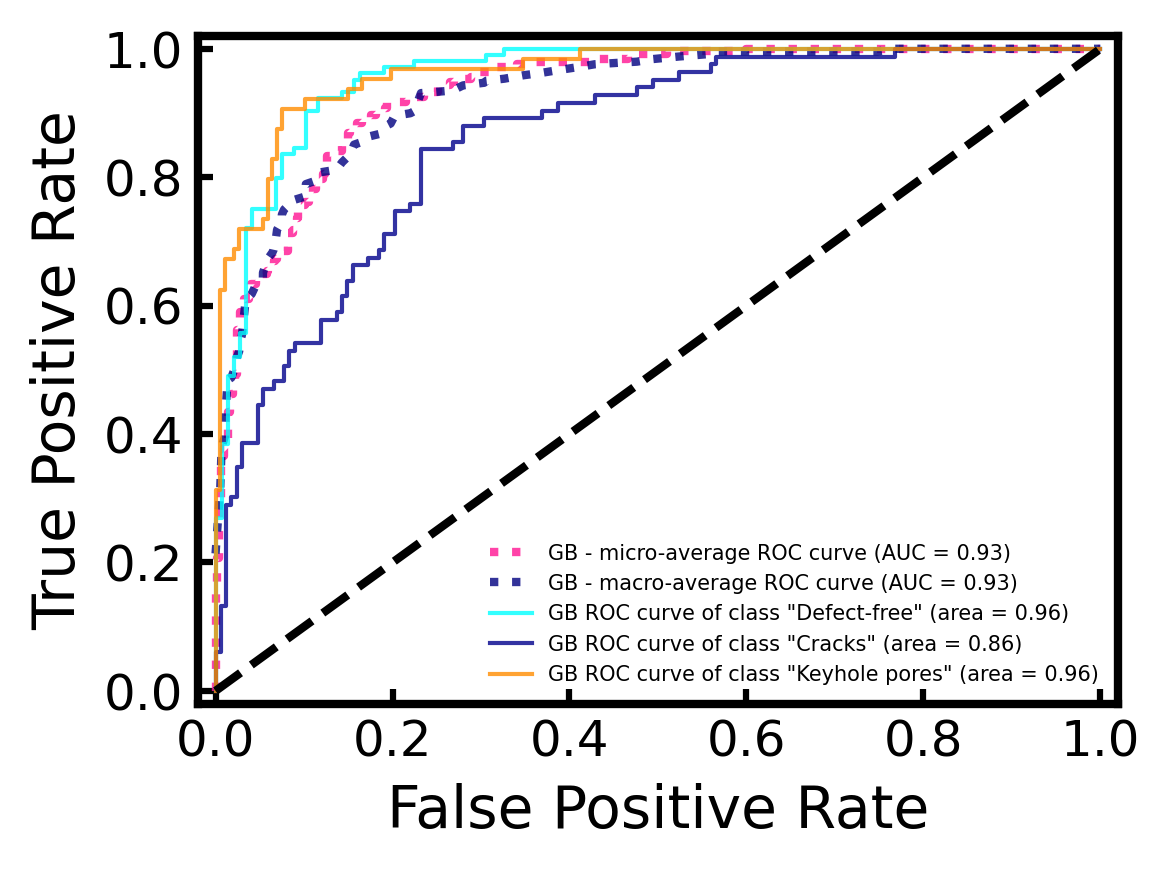

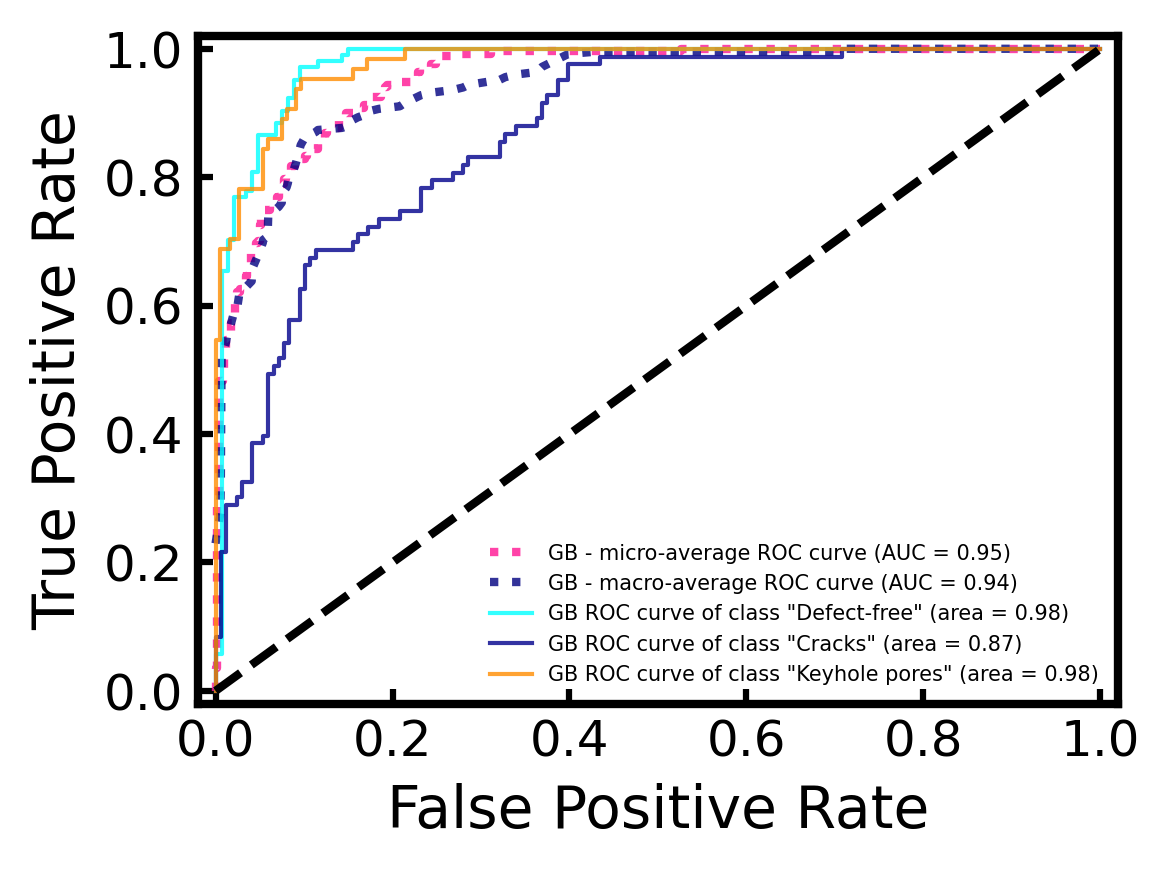

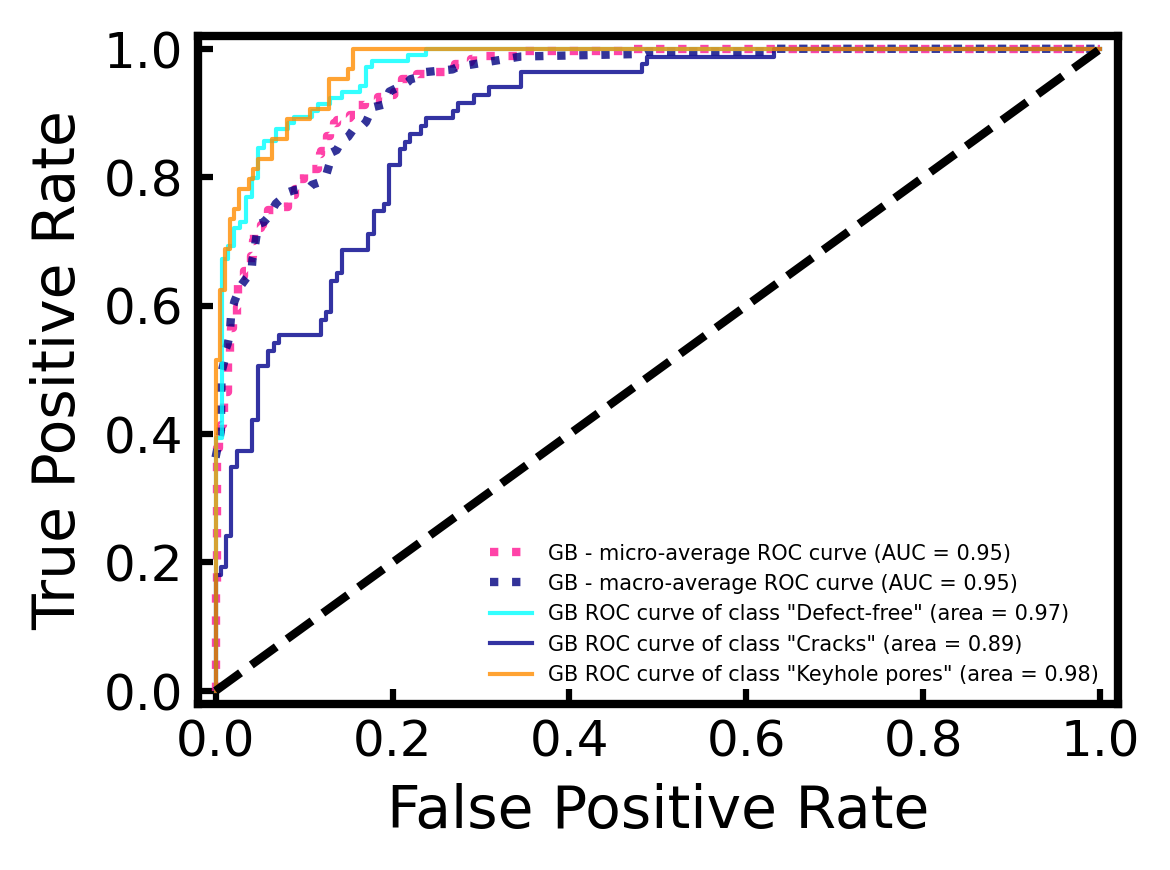

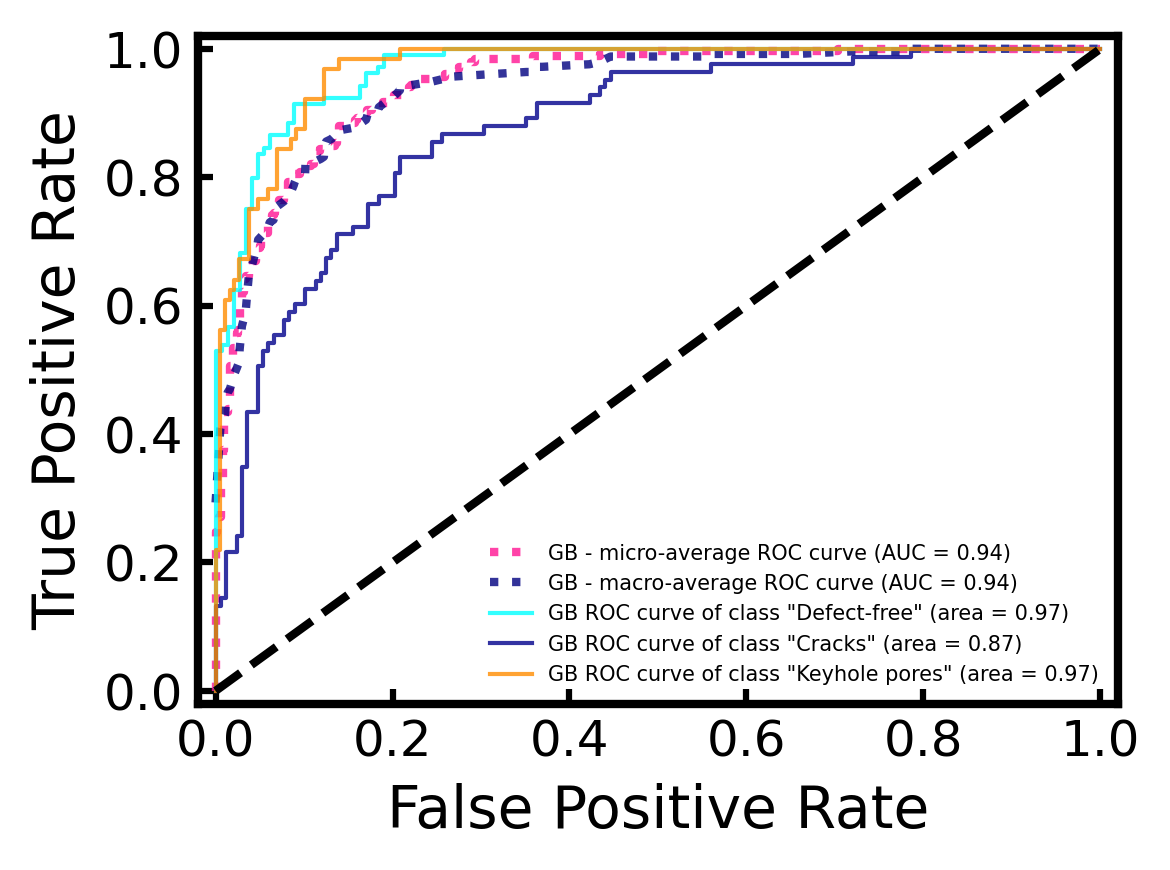

In [47]:
GB_original =  gradient_boosting_classification(X_original_selected, y, original_auc_mean, original_auc_std, original_accuracy_mean_list, original_accuracy_std_list, "original")
GB_equalized =  gradient_boosting_classification(X_equalized_selected, y, equalized_auc_mean, equalized_auc_std, equalized_accuracy_mean_list, equalized_accuracy_std_list, "equalized")
GB_bandpassed =  gradient_boosting_classification(X_bandpassed_selected, y, bandpassed_auc_mean, bandpassed_auc_std, bandpassed_accuracy_mean_list, bandpassed_accuracy_std_list, "bandpassed")
GB_denoised =  gradient_boosting_classification(X_denoised_selected, y, denoised_auc_mean, denoised_auc_std, denoised_accuracy_mean_list, denoised_accuracy_std_list, "denoised")

## Result Analysis

In [48]:
# from matplotlib import pyplot as plt
# plotdata = pd.DataFrame({
#     "raw":original_accuracy_list,
#     "equalized": equalized_accuracy_list,
#     "bandpassed": bandpassed_accuracy_list,
#     "denoised":denoised_accuracy_list},

#     # index=["SVM", "Nearest Neighbors", "Naive Bayes", "AdaBoost", "Random forest", "Decision tree", "Gaussian process"]
#     # index=["SVM", "K Nearest Neighbors", "Gaussian process", "Random forest", "Decision tree","AdaBoost", "Naive Bayes", "Logistic Regression"]
#     # index=["SVM", "K Nearest Neighbors", "Random forest", "Decision tree","AdaBoost", "Naive Bayes", "Logistic Regression"]
#     index=["SVM", "KNN", "RF", "DT","AdaBoost", "NB", "LR"]
# )

# ax= plotdata.plot(kind="bar",figsize=(10, 6), stacked=False, width=0.7) #xticks=(np.arange(0, 7, step=1)), xticklabels=plotdata.index # rotation=20
# # for container in ax.containers:
# #     ax.bar_label(container, fmt='%.2f', fontsize=10, padding=4, rotation=90)

# plt.title("Classification results (layer-wise)", fontsize = 20, y=1.1)
# # plt.xlabel("ML models",  fontsize = 18, labelpad=12)
# plt.xticks(fontsize = 16, rotation=45, ha='right')
# plt.ylim([0, 1])
# plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
# plt.legend(fontsize=12, bbox_to_anchor=(1.04,1), loc="upper left")
# plt.ylabel("Accuracy", fontsize = 18, labelpad=12)
# # plt.tick_params(direction = 'in', width = 5)

# # save_fig("classification result - (layer-wise)")

In [142]:
%store original_accuracy_mean_list 
%store equalized_accuracy_mean_list
%store bandpassed_accuracy_mean_list
%store denoised_accuracy_mean_list 

%store original_accuracy_std_list 
%store equalized_accuracy_std_list
%store bandpassed_accuracy_std_list
%store denoised_accuracy_std_list

Stored 'original_accuracy_mean_list' (list)
Stored 'equalized_accuracy_mean_list' (list)
Stored 'bandpassed_accuracy_mean_list' (list)
Stored 'denoised_accuracy_mean_list' (list)
Stored 'original_accuracy_std_list' (list)
Stored 'equalized_accuracy_std_list' (list)
Stored 'bandpassed_accuracy_std_list' (list)
Stored 'denoised_accuracy_std_list' (list)


In [54]:
bandpassed_accuracy_mean_list

[0.7418065547561951,
 0.6618645418326694,
 0.6930231075697211,
 0.7218225419664268,
 0.8185451638689049,
 0.8737243027888446,
 0.7761752988047809,
 0.8297362110311751,
 0.8305498007968127]

In [136]:
def create_dataframe_metric_accuracy(mean_list, std_list, models, name):
    df = pd.DataFrame(mean_list)

    df.columns = ["value"]
    df["std"] = std_list
    df["models"] = models
    return df

df_original_accuracy = create_dataframe_metric_accuracy(original_accuracy_mean_list,original_accuracy_std_list, models, "original").sort_values(by="value", axis=0)
df_equalized_accuracy = create_dataframe_metric_accuracy(equalized_accuracy_mean_list,equalized_accuracy_std_list, models, "equalized" ).sort_values(by="value", axis=0)
df_bandpassed_accuracy = create_dataframe_metric_accuracy(bandpassed_accuracy_mean_list,bandpassed_accuracy_std_list, models, "bandpassed").sort_values(by="value", axis=0) 
df_denoised_accuracy = create_dataframe_metric_accuracy(denoised_accuracy_mean_list, denoised_accuracy_std_list, models, "denoised").sort_values(by="value", axis=0) 

In [137]:
df_denoised_accuracy["models"].to_list()

['AdaBoost', 'NB', 'DT', 'RF', 'LR', 'KNN', 'GB', 'SVM', 'GP']

In [132]:
df_accuracy = df_bandpassed_accuracy.merge(df_original_accuracy,on='models').merge(df_equalized_accuracy,on='models').merge(df_denoised_accuracy,on='models')
# df_accuracy = df_accuracy.merge(df_denoised_accuracy,on='models')
df_accuracy.columns = ["mean_bandpassed", "std_bandpassed","models", "mean_original", "std_original",
                      "mean_equalized", "std_equalized", "mean_denoised", "std_denoised"]
df_accuracy

mean_bandpassed  std_bandpassed    models  mean_original  std_original  \
0         0.661865        0.020107  AdaBoost       0.690633      0.016572   
1         0.693023        0.025840        NB       0.645858      0.027140   
2         0.721823        0.017403        RF       0.587530      0.023740   
3         0.741807        0.037476        DT       0.690647      0.044778   
4         0.776175        0.019306        LR       0.769775      0.024290   
5         0.818545        0.022694       KNN       0.762590      0.012228   
6         0.829736        0.001958       SVM       0.784972      0.009855   
7         0.830550        0.028029        GB       0.784975      0.015421   
8         0.873724        0.031441        GP       0.831321      0.027718   

   mean_equalized  std_equalized  mean_denoised  std_denoised  
0        0.691417       0.023721       0.677871      0.026792  
1        0.717017       0.015007       0.701001      0.034165  
2        0.682654       0.040239       0.721823      0.012228  
3        0.693046       0.005180       0.713829      0.014696  
4        0.796969       0.011014       0.797753      0.011345  
5        0.822542       0.007060       0.807354      0.006294  
6        0.832134       0.012840       0.828137      0.017767  
7        0.831347       0.017475       0.812150      0.011031  
8        0.866512       0.024447       0.860918      0.021179

Saving figure accuracy_summary


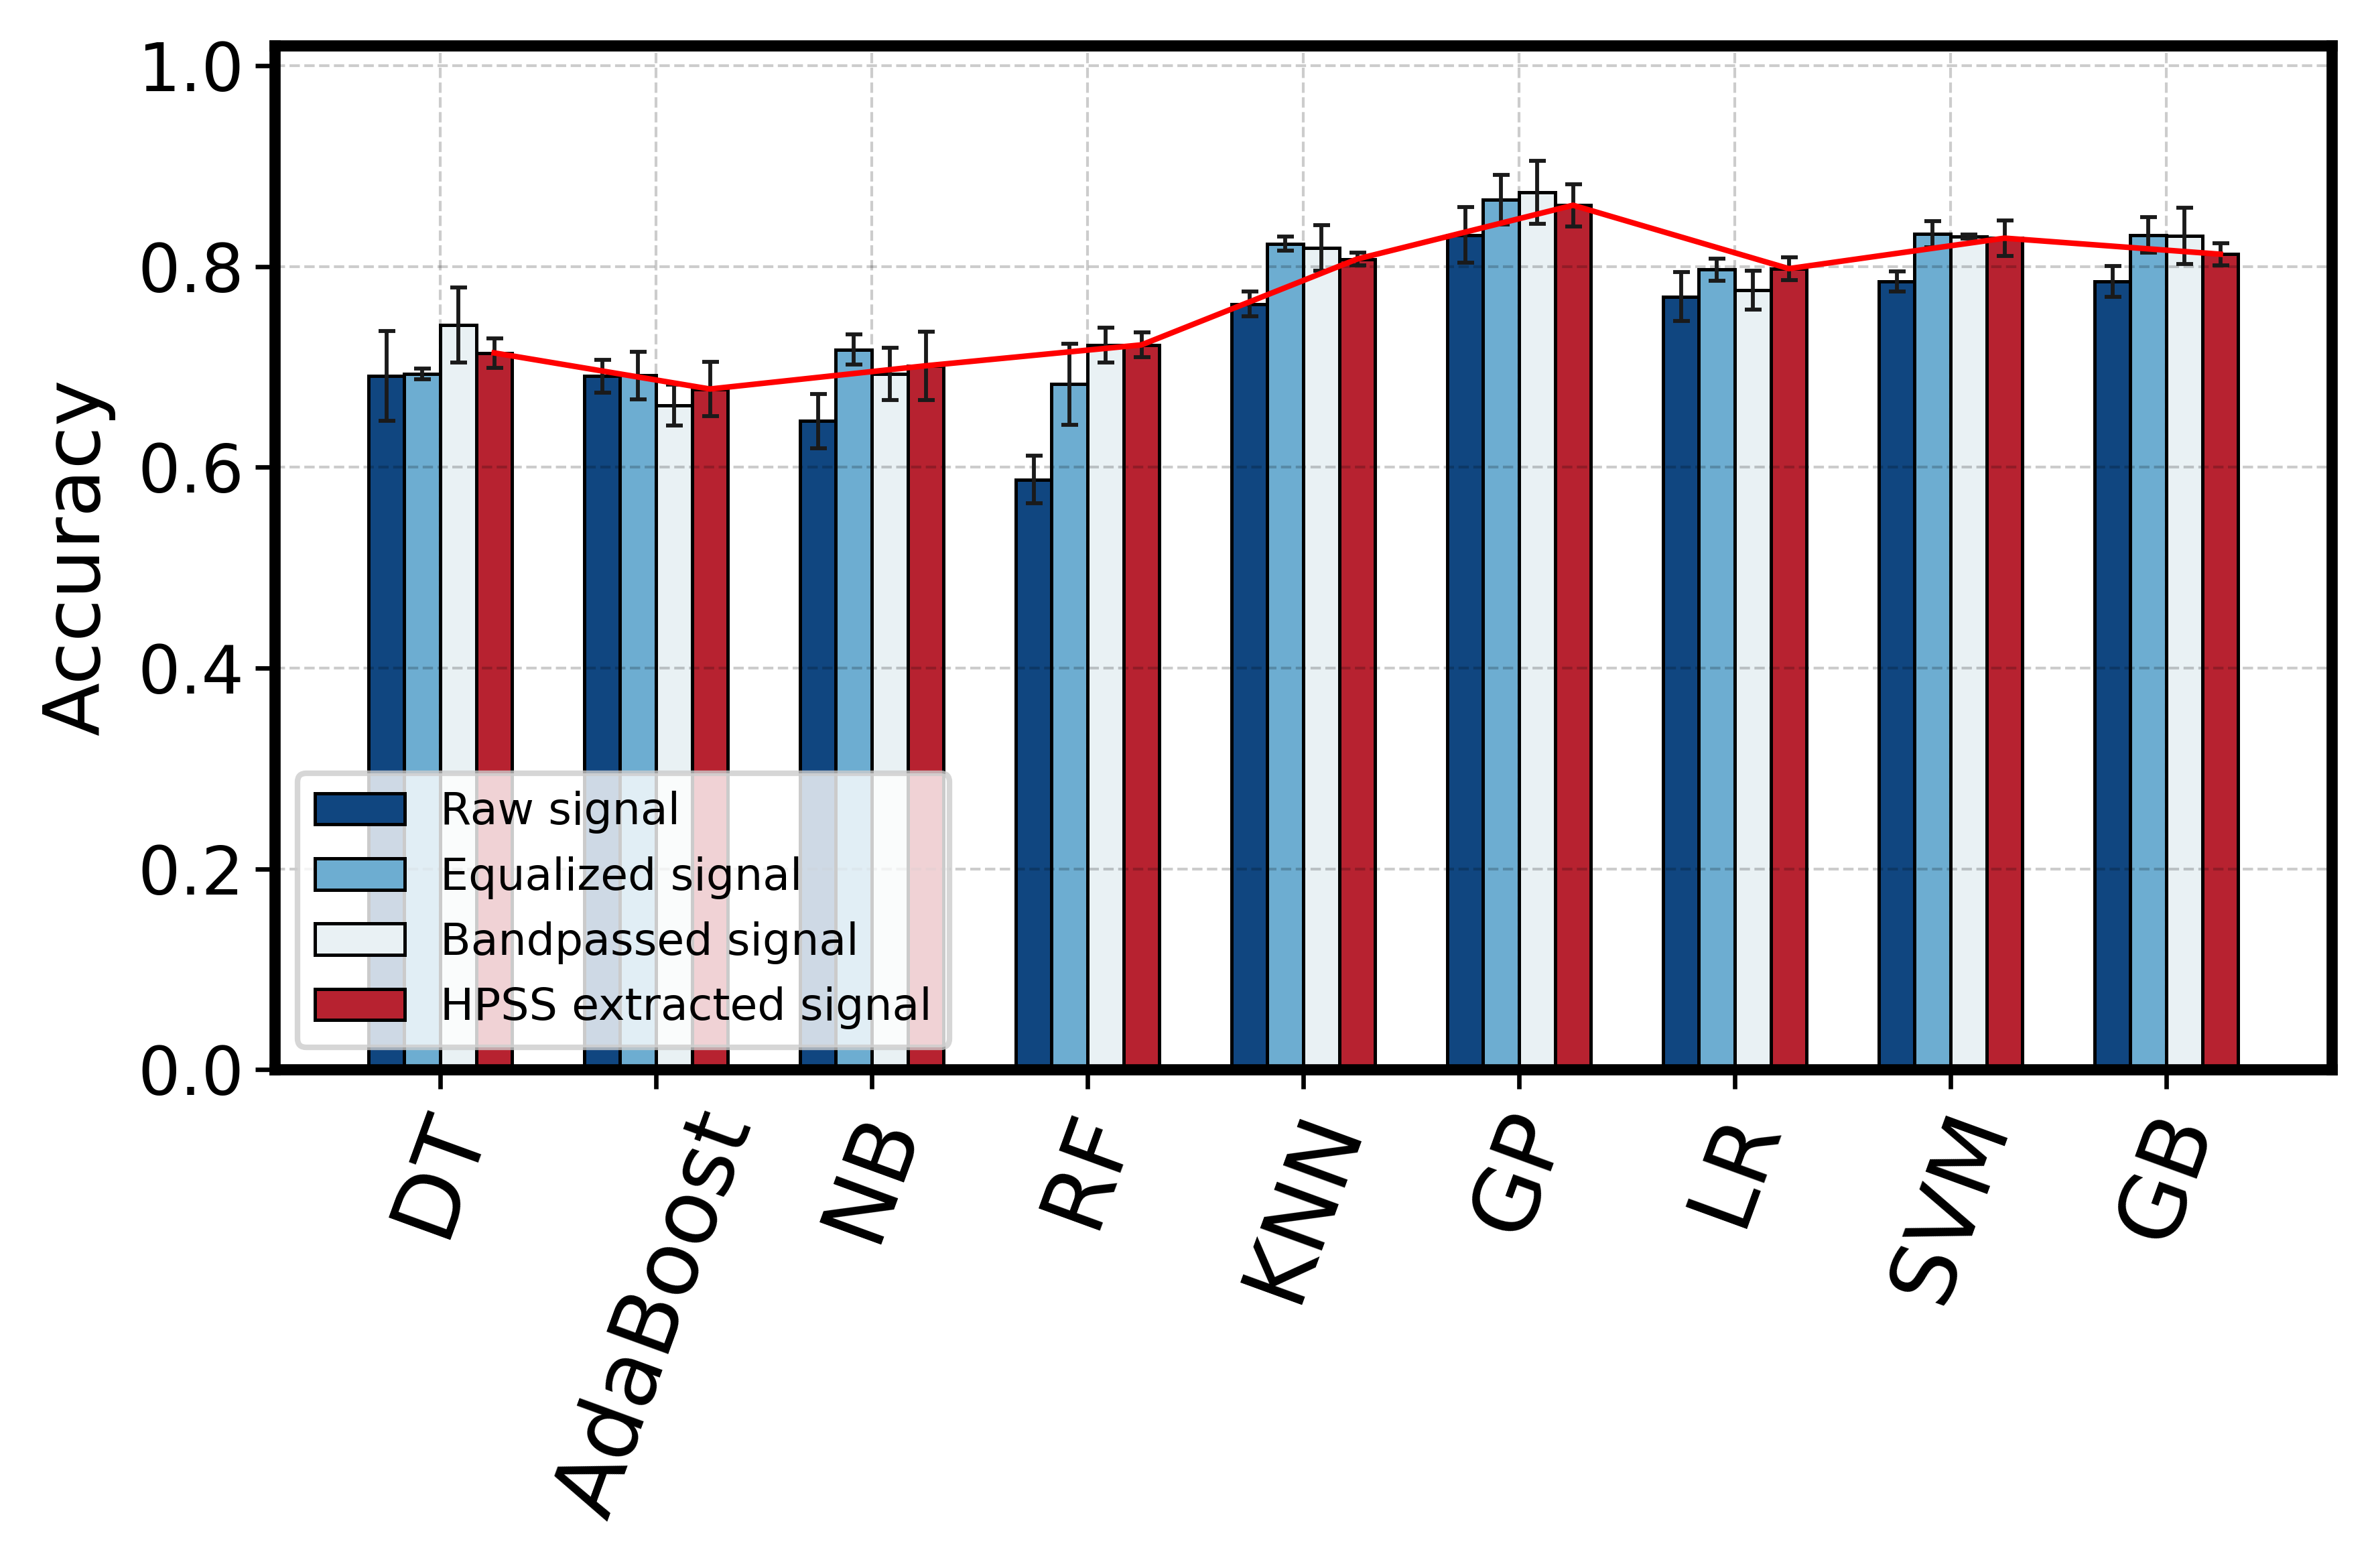

In [80]:
models = ["DT","AdaBoost", "NB", "RF","KNN","GP", "LR","SVM", "GB"]
# models = df_bandpassed_accuracy["models"].to_list()

x = np.arange(len(models))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize = (6,4), dpi = 600)
widths = 2
ax = gca()

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
# plt.tick_params(direction = 'in', width = tick_width)


rects1 = ax.bar(3*x - 1.5*width, original_accuracy_mean_list, width, yerr = original_accuracy_std_list,error_kw = dict(ecolor= '0.1', lw=0.7, capsize=1.5, capthick=0.7), 
                 edgecolor ='k', linewidth=0.6, label='Raw signal', alpha =1 , color = '#104680') #, color = 'seagreen' (016, 070, 128) #104680
rects2 = ax.bar(3*x - 0.5*width, equalized_accuracy_mean_list, width, yerr = equalized_accuracy_std_list , error_kw = dict(ecolor= '0.1', lw=0.7, capsize=1.5, capthick=0.7),
                 edgecolor ='k', linewidth=0.6, label='Equalized signal', alpha = 1, color = '#6DADD1') # color = 'wheat' (109,173, 209) #6DADD1
rects3 = ax.bar(3*x + 0.5*width, bandpassed_accuracy_mean_list, width, yerr = bandpassed_accuracy_std_list , error_kw = dict(ecolor= '0.1', lw=0.7, capsize=1.5, capthick=0.7),
                 edgecolor ='k', linewidth=0.6, label='Bandpassed signal', alpha = 1,  color = '#E9F1F4') #,  color = 'steelblue' (233, 241, 244) #E9F1F4
rects4 = ax.bar(3*x + 1.5*width, denoised_accuracy_mean_list, width, yerr = denoised_accuracy_std_list , error_kw = dict(ecolor= '0.1', lw=0.7, capsize=1.5, capthick=0.7),
                 edgecolor ='k', linewidth=0.6, label='HPSS extracted signal', alpha = 1,  color = "#B72230") #f03b1a ,  color = 'darkorange' (183, 034, 048)--> B72230 

ax.plot(3*x + 1.5*width, denoised_accuracy_mean_list, "r", linewidth =1)
# original colorlist: midnightblue, red, steelblue, olive

ax.set_ylabel('Accuracy')
#ax.set_title('depth regression task, test set accuracy')
ax.set_xticks(3*x)

plt.xticks(fontsize=16,  rotation=70, ha='center')
ax.tick_params(axis="y",direction="out", pad= 2)
ax.tick_params(axis="x",direction="out", pad= 2)

ax.set_xticklabels(models)
ax.set_ylim([0, 1.02])
ax.legend(loc = 'lower left',  fontsize = '8', framealpha = 0.8)

ax.grid(zorder=3, linestyle='--',linewidth=0.5, alpha=0.2, color = "k") #linestyle='--', color='r'

fig.tight_layout()
# plt.show()
save_fig("accuracy_summary")

### AUC-ROC comparison

In [141]:
%store original_auc_mean 
%store equalized_auc_mean
%store bandpassed_auc_mean
%store denoised_auc_mean 

%store original_auc_std 
%store equalized_auc_std
%store bandpassed_auc_std
%store denoised_auc_std

Stored 'original_auc_mean' (list)
Stored 'equalized_auc_mean' (list)
Stored 'bandpassed_auc_mean' (list)
Stored 'denoised_auc_mean' (list)
Stored 'original_auc_std' (list)
Stored 'equalized_auc_std' (list)
Stored 'bandpassed_auc_std' (list)
Stored 'denoised_auc_std' (list)


In [134]:
def create_dataframe_metric_auc(mean_list, std_list, models, name):
    df = pd.DataFrame(mean_list)

    df.columns = ["value"]
    df["std"] = std_list
    df["models"] = models
    return df

df_original_auc = create_dataframe_metric_accuracy(original_auc_mean,original_auc_std, models, "original").sort_values(by="value", axis=0)
df_equalized_auc = create_dataframe_metric_accuracy(equalized_auc_mean,equalized_auc_std, models, "equalized" ).sort_values(by="value", axis=0)
df_bandpassed_auc = create_dataframe_metric_accuracy(bandpassed_auc_mean,bandpassed_auc_std, models, "bandpassed").sort_values(by="value", axis=0) 
df_denoised_auc = create_dataframe_metric_accuracy(denoised_auc_mean, denoised_auc_std, models, "denoised").sort_values(by="value", axis=0) 

df_auc = df_bandpassed_auc.merge(df_original_auc,on='models').merge(df_equalized_auc,on='models').merge(df_denoised_auc,on='models')
# df_accuracy = df_accuracy.merge(df_denoised_accuracy,on='models')
df_auc.columns = ["mean_bandpassed", "std_bandpassed","models", "mean_original", "std_original",
                      "mean_equalized", "std_equalized", "mean_denoised", "std_denoised"]
df_auc

C:\Users\Asus\anaconda3\envs\working_primary\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'value_x', 'std_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


mean_bandpassed  std_bandpassed    models  mean_original  std_original  \
0         0.889264             0.0        NB       0.845661           0.0   
1         0.898053             0.0  AdaBoost       0.879653           0.0   
2         0.898664             0.0        DT       0.876323           0.0   
3         0.913700             0.0        LR       0.919811           0.0   
4         0.916851             0.0        RF       0.887117           0.0   
5         0.936652             0.0       KNN       0.925473           0.0   
6         0.937144             0.0       SVM       0.928446           0.0   
7         0.950128             0.0        GB       0.934033           0.0   
8         0.960683             0.0        GP       0.947350           0.0   

   mean_equalized  std_equalized  mean_denoised  std_denoised  
0        0.902390            0.0       0.886311           0.0  
1        0.916093            0.0       0.888403           0.0  
2        0.887069            0.0       0.888633           0.0  
3        0.925438            0.0       0.925906           0.0  
4        0.920204            0.0       0.914517           0.0  
5        0.945033            0.0       0.929231           0.0  
6        0.939390            0.0       0.948199           0.0  
7        0.953572            0.0       0.944469           0.0  
8        0.965151            0.0       0.959802           0.0

In [135]:
%store df_auc 
%store df_accuracy

Stored 'df_auc' (DataFrame)
Stored 'df_accuracy' (DataFrame)


Saving figure AUC_ROC summary


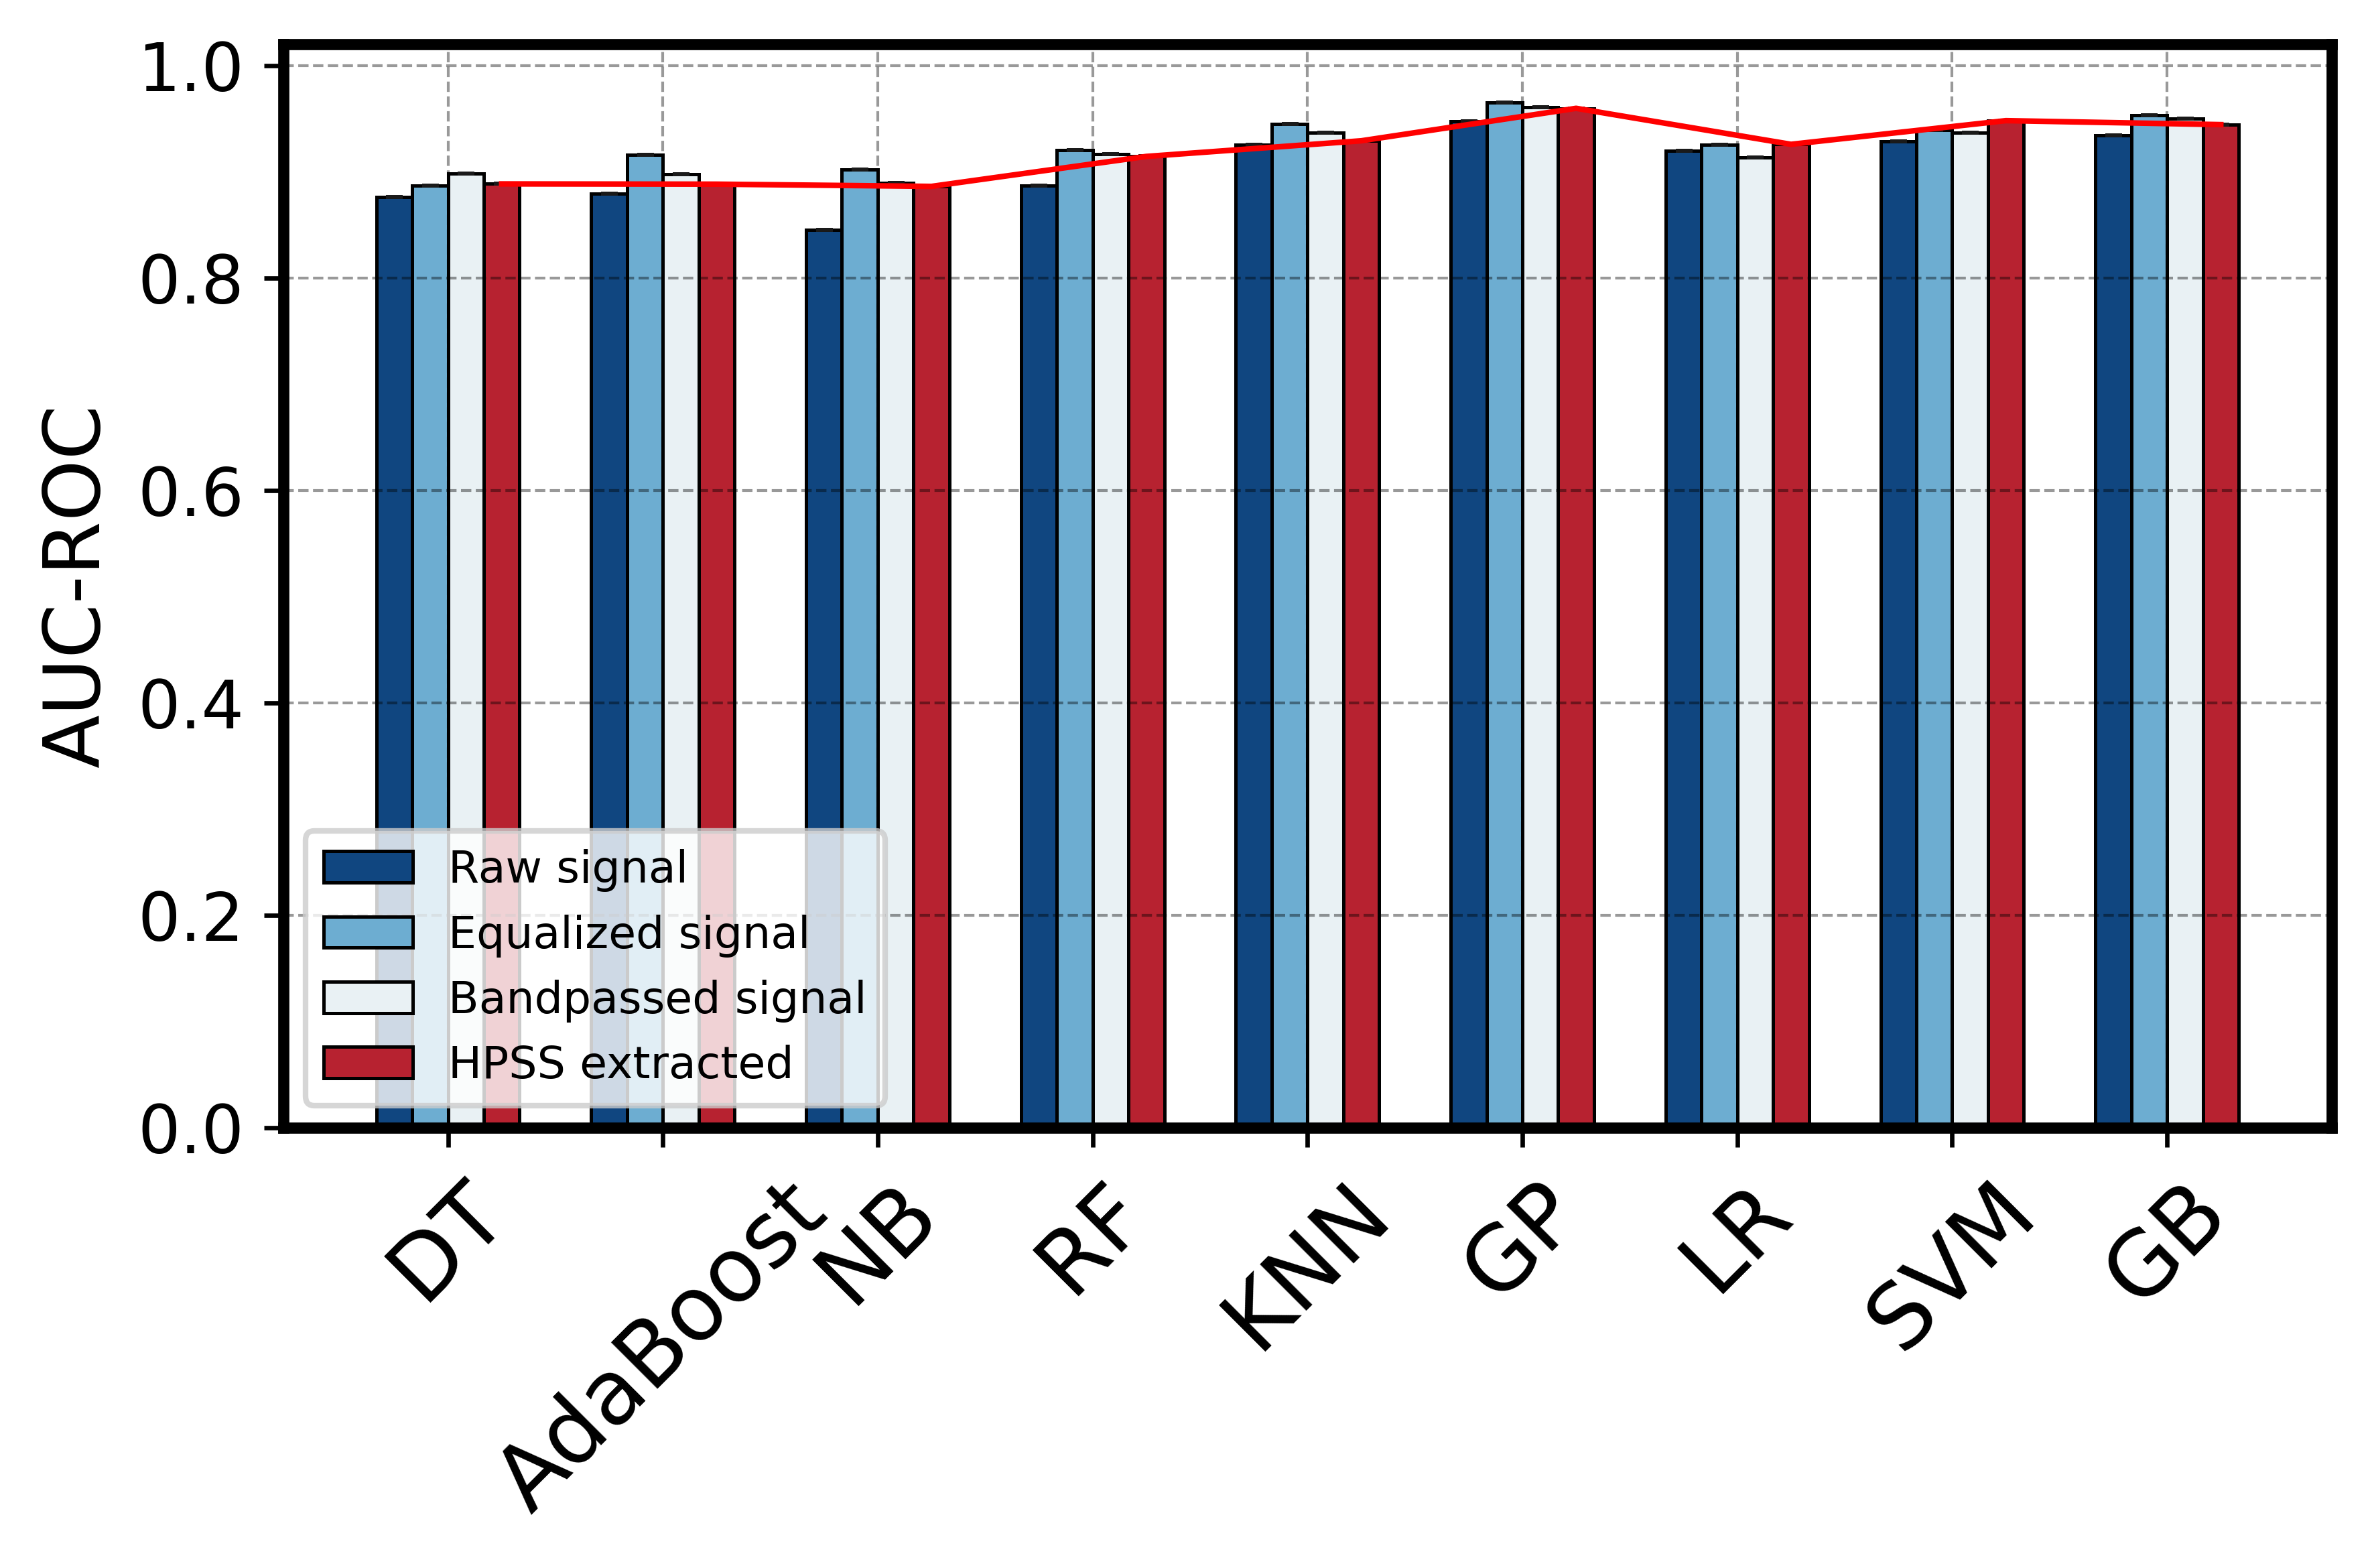

In [79]:
models = ["DT","AdaBoost", "NB", "RF","KNN","GP", "LR","SVM", "GB" ]

x = np.arange(len(models))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize = (6,4), dpi = 600)
widths = 2
ax = gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(widths)

    tick_width = 1.5
# plt.tick_params(direction = 'in', width = tick_width)

# rects1 = ax.bar(3*x - 1.5*width, original_auc_mean, width, yerr = original_auc_std,error_kw = dict(ecolor= '0.3', lw=0.7, capsize=1.5, capthick=0.7), label='Raw signal', color = 'midnightblue', alpha =0.9 )
# rects2 = ax.bar(3*x - 0.5*width, equalized_auc_mean, width, yerr = equalized_auc_std , error_kw = dict(ecolor= '0.3', lw=0.7, capsize=1.5, capthick=0.7),label='Equalized signal',  color = 'red', alpha = 0.9)
# rects3 = ax.bar(3*x + 0.5*width, bandpassed_auc_mean, width, yerr = bandpassed_auc_std , error_kw = dict(ecolor= '0.3', lw=0.7, capsize=1.5, capthick=0.7),label='Bandpass filtered signal',  color = 'steelblue', alpha = 0.9)
# rects4 = ax.bar(3*x + 1.5*width, denoised_auc_mean, width, yerr = denoised_auc_std , error_kw = dict(ecolor= '0.3', lw=0.7, capsize=1.5, capthick=0.7),label='Final denoised signal',  color = 'olive', alpha = 0.9)

rects1 = ax.bar(3*x - 1.5*width, original_auc_mean, width, yerr = original_auc_std,error_kw = dict(ecolor= '0.1', lw=0.7, capsize=1.5, capthick=0.7), 
                 edgecolor ='k', linewidth=0.6, label='Raw signal', alpha =1 , color = '#104680') #, color = 'seagreen'
rects2 = ax.bar(3*x - 0.5*width, equalized_auc_mean, width, yerr = equalized_auc_std , error_kw = dict(ecolor= '0.1', lw=0.7, capsize=1.5, capthick=0.7),
                 edgecolor ='k', linewidth=0.6, label='Equalized signal', alpha = 1, color = '#6DADD1') #wheat
rects3 = ax.bar(3*x + 0.5*width, bandpassed_auc_mean, width, yerr = bandpassed_auc_std , error_kw = dict(ecolor= '0.1', lw=0.7, capsize=1.5, capthick=0.7),
                 edgecolor ='k', linewidth=0.6, label='Bandpassed signal', alpha = 1,  color = '#E9F1F4') #,  color = 'steelblue'
rects4 = ax.bar(3*x + 1.5*width, denoised_auc_mean, width, yerr = denoised_auc_std , error_kw = dict(ecolor= '0.1', lw=0.7, capsize=1.5, capthick=0.7),
                 edgecolor ='k', linewidth=0.6, label='HPSS extracted', alpha = 1,  color = "#B72230") #f03b1a ,  color = 'darkorange'


ax.set_ylabel('AUC-ROC')

ax.plot(3*x + 1.5*width, denoised_auc_mean, "r", linewidth =1)

#ax.set_title('depth regression task, test set accuracy')
ax.set_xticks(3*x)
ax.set_xticklabels(models)
ax.set_ylim([0, 1.02])
ax.legend(loc = 'lower left',  fontsize = '8', framealpha = 0.8)
plt.xticks(fontsize=16,  rotation=45, ha='center')

fig.tight_layout()
# plt.show()
ax.grid(zorder=3, linestyle='--',linewidth=0.5, alpha=0.4, color = "k") #linestyle='--', color='r'

save_fig("AUC_ROC summary")

### Model Prediction and evaluation on test set

In [76]:
### Define function to predict X_test, return y_pred & y_true and print the classification report
def class_report(modelname, X_test, y_test, classes=['Keyhole pores', 'Cracks', 'Defect-free']):
    ### predict the X_test
    # pred = modelname.predict_classes(X_test) # deprecated
    predict_x=modelname.predict(X_test) 
    pred=np.argmax(predict_x,axis=1)
    
    # compile predicted results
    y_true, y_pred = [], []
    # classes = le.classes_
    
    for idx, preds in enumerate(pred):
        y_true.append(classes[np.argmax(y_test[idx])])
        y_pred.append(classes[preds])
    
    print(classification_report(y_true, y_pred,digits=4))
    return y_true, y_pred

### Model (preliminary) Evaluation Summary

To evaluate the effectiveness of the classification model, metrics used to assess are:

1. **$Precision = TP/(FP+TP)$**

**Precision** provides the *positive predictive value, the proportion of samples that belong in category $x$ that are correctly placed in category $x$*. Example, among all predicted defect, how many did I predict correctly? High precision is with low FP (predict to be cracks but actually is not).

2. **$f1 = 2*(Precision*Recall)/(Precision + Recall)$**

**Weighted average for precision and recall**. This score takes both FN and FP into account as $Recall = TP/(FN+TP)$. This is better metric for evaluating an uneven class distribution problem, which is the case in this project. 

3. $Accuracy = (TP+TN)/(All predict)$

Model achieve pretty high **>80%** overall accuracy.

The model able to classify well for defects sounds. However, it did badly on the detecting ***cracks***

- In conclusion, the initial model without Hyper-parameter tuning did pretty well in general. But it does not outperform the traditional ML algorithms. And it did poorly in classifying the cracking regimes.

In [ ]:
yt, yp = SVM_bandpassed

### Category/ label that was wrongly classified by the model

In [ ]:
### View the class with WRONG classificaiton 
pred_result = list(zip(yt, yp))
result_df = pd.DataFrame(pred_result, columns = ['label', 'pred_label'])
result_df[result_df['label'] != result_df['pred_label']]

### Confusion Matrix

In [ ]:
### Function to plot confusion matrix

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8, 8))
    im_ratio = cm.shape[1]/cm.shape[0]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=18, pad=12)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    fmt = '.3f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 fontsize = 16, 
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Ground Truth', fontsize=20, labelpad =12)
    plt.xlabel('Predicted', fontsize=20, labelpad =12)
    plt.xticks(fontsize=16,  rotation=30, ha='right')
    plt.yticks(fontsize=16)
    cbar = plt.colorbar(orientation="vertical", pad=0.1, ticks=[0, 0.5, 1], fraction=0.045*im_ratio)
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_title('Accuracy',fontsize=16, pad = 12)
    plt.tight_layout()

    # plt.show()
    
def plot_confusion_matrix_sns(y_true, y_pred, classes):
    plt.figure(figsize=(10, 7))
    tick_marks = np.arange(len(classes))
    cm = confusion_matrix(y_true, y_pred)
    # convert to percentage and plot the confusion matrix
    cm_pct = cm.astype(float) / cm.sum(axis =1)[:,np.newaxis]
    sns.heatmap(cm_pct, annot=True, fmt='.3%', cmap='Blues', linewidths=2, linecolor='black') #cmap='Blues'
    plt.xticks(tick_marks, classes, horizontalalignment='center', rotation=70, fontsize=12)
    plt.yticks(tick_marks, classes, horizontalalignment="center", rotation=0, fontsize=12)
#     ax.set_xticklabels(
# #     ax.get_xticklabels(),
# #     # rotation=45,
# #     # horizontalalignment='right',
# #     fontsize = 2
# # )
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    

In [ ]:
## Define function to get the confusion matrix and print out the plot as well

def conf_matrix(y_true, y_pred, classes=['Defect-free', 'Cracks','Keyhole pores'] ):
    cm = confusion_matrix(y_true, y_pred)
    
    # convert to percentage and plot the confusion matrix
    cm_pct = cm.astype(float) / cm.sum(axis =1)[:,np.newaxis]
    
    # classes = le.classes_
    print(cm)
    plot_confusion_matrix(cm_pct, classes)

In [ ]:
conf_matrix(yt, yp)
save_fig("confusion_SVM_bandpassed")